# **Import Các Thư Viện**

In [ ]:
# Các thư viện để thao tác, tính toán dữ liệu
import pandas as pd
from datetime import datetime
import numpy as np

# Các thư viện để vẽ biểu đồ
import matplotlib.pyplot as plt
import seaborn as sns

# Công cụ để Chuẩn hóa dữ liệu (Standardization)
from sklearn.preprocessing import StandardScaler

# Thư viện để xây dựng các mô hình Hồi quy Thống kê (OLS,...)
import statsmodels.api as sm



In [ ]:
# Cài đặt để hiển thị số float đẹp hơn (làm tròn 2 chữ số)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# **A- Chuẩn Bị Dữ Liệu (Data Cleaning & Preprocessing)**

### **1) Đọc dữ liệu**

In [ ]:
# Đọc file csv
df = pd.read_csv('https://raw.githubusercontent.com/riodev1310/rio_datasets/refs/heads/main/marketing_data_with_missing_values.csv')

# Xem thử 5 dòng dữ liệu đầu
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1.00,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,NaN,0,0,6/15/14,0,464,...,7,5.00,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2.00,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,NaN,0,10,...,2,7.00,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7.00,1,0,0,0,0,1,0,SP


In [ ]:
# Xem thử 5 dòng dữ liệu cuối cùng
df.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,NaN,99,372,...,11,4.00,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,99,5,...,3,8.00,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,99,185,...,5,8.00,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,99,267,...,10,NaN,0,0,0,0,0,0,0,IND
2239,4070,1969,PhD,Married,"$94,871.00",0,2,9/1/12,99,169,...,4,7.00,0,1,1,0,0,1,0,CA


### **2) Xác định quy mô, cấu trúc vs ý nghĩa của tập dữ liệu**

#### 2.1) Xem có bao nhiêu hàng, bao nhiêu cột?

In [ ]:
print(f"Tập dữ liệu có tất cả: {df.shape[0]} hàng và {df.shape[1]} cột")


Tập dữ liệu có tất cả: 2240 hàng và 28 cột


#### 2.2) Xem tổng quan các tên cột, số lượng giá trị không trống, và kiểu dữ liệu là gì?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2128 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               1997 non-null   object 
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2128 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

#### 2.3) Xác định Ý nghĩa chi tiết của từng cột

Tập dữ liệu có tất cả 28 cột, dưới đây là ý nghĩa của từng cột

##### Nhóm 1: Thông tin Nhân khẩu học
* **ID**: Mã định danh duy nhất của khách hàng.
* **Year\_Birth**: Năm sinh của khách hàng.
* **Country**: Quốc gia của khách hàng.
* **Education**: Trình độ học vấn cao nhất của khách hàng.
* **Marital\_Status**: Tình trạng hôn nhân.
* **Income**: Thu nhập hàng năm của hộ gia đình khách hàng.
* **Kidhome**: Số lượng trẻ nhỏ (dưới tuổi vị thành niên) trong gia đình.
* **Teenhome**: Số lượng thanh thiếu niên trong gia đình.
* **Dt\_Customer**: Ngày khách hàng đăng ký thành viên với công ty.
---

##### Nhóm 2: Hành vi Chi tiêu
*Đây là tổng số tiền đã chi tiêu cho từng danh mục sản phẩm trong 2 năm gần nhất.*
* **MntWines**: Chi tiêu cho rượu vang.
* **MntFruits**: Chi tiêu cho trái cây.
* **MntMeatProducts**: Chi tiêu cho các sản phẩm thịt.
* **MntFishProducts**: Chi tiêu cho các sản phẩm cá.
* **MntSweetProducts**: Chi tiêu cho các sản phẩm ngọt (bánh, kẹo...).
* **MntGoldProds**: Chi tiêu cho các mặt hàng đặc biệt/cao cấp.

---

##### Nhóm 3: Kênh Giao dịch Mua sắm
* **NumDealsPurchases**: Số lần mua hàng có sử dụng giảm giá/khuyến mãi.
* **NumWebPurchases**: Số lần mua hàng qua website công ty.
* **NumCatalogPurchases**: Số lần mua hàng qua catalogue.
* **NumStorePurchases**: Số lần mua hàng trực tiếp tại cửa hàng.
---

##### Nhóm 4: Tương tác và phản hồi của khách hàng:
* **Recency**: Số ngày kể từ lần mua hàng cuối cùng của khách hàng.
* **NumWebVisitsMonth**: Số lượt truy cập website công ty trong tháng gần nhất.
* **Complain**: 1 nếu khách hàng đã phàn nàn trong 2 năm qua, 0 nếu không.
* **AcceptedCmp1**: 1 nếu khách hàng chấp nhận ưu đãi trong chiến dịch marketing lần 1, 0 nếu không.
* **AcceptedCmp2**: 1 nếu khách hàng chấp nhận ưu đãi trong chiến dịch marketing lần 2, 0 nếu không.
* **AcceptedCmp3**: 1 nếu khách hàng chấp nhận ưu đãi trong chiến dịch marketing lần 3, 0 nếu không.
* **AcceptedCmp4**: 1 nếu khách hàng chấp nhận ưu đãi trong chiến dịch marketing lần 4, 0 nếu không.
* **AcceptedCmp5**: 1 nếu khách hàng chấp nhận ưu đãi trong chiến dịch marketing lần 5, 0 nếu không.
* **Response**: 1 nếu khách hàng chấp nhận ưu đãi trong chiến dịch marketing **gần đây nhất**, 0 nếu không (đây là cột mục tiêu quan trọng).

### **3) Đánh Giá Chất Lượng Dữ Liệu**

#### 3.1) Kiểm tra dữ liệu trùng lặp

In [ ]:
# KIỂM TRA XEM CÓ HÀNG DỮ LIỆU NÀO BỊ TRÙNG LẶP KHÔNG
duplicate_count = df.duplicated().sum()

if duplicate_count > 0:
    print(f"Có {duplicate_count} hàng bị trùng lặp.")
else:
    print("Không có dữ liệu trùng lặp.")

Không có dữ liệu trùng lặp.


In [ ]:
# KIỂM TRA XEM ID KHÁCH HÀNG CÓ UNIQUE KHÔNG
duplicate_ID_count = df['ID'].duplicated().sum()

if duplicate_ID_count > 0:
    print(f"Có {duplicate_ID_count} hàng có ID bị trùng lặp.")
else:
    print("Không có hàng có ID trùng lặp.")

Không có hàng có ID trùng lặp.


#### 3.2) Kiểm tra dữ liệu bị thiếu (Missing Values)

In [ ]:
print("Số dữ liệu bị thiếu ở mỗi cột")
df.isnull().sum()

Số dữ liệu bị thiếu ở mỗi cột


,0
ID,0
Year_Birth,0
Education,112
Marital_Status,0
Income,243
Kidhome,0
Teenhome,0
Dt_Customer,112
Recency,0
MntWines,0


### **4) Phân Tích Khám Phá Dữ Liệu Thô**

#### 4.1) Phân tích sơ bộ các cột dữ liệu số (Numerical Features)

In [ ]:
df.describe()

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,...,2240.00,2240.00,2016.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00
mean,5592.16,1968.81,0.44,0.51,49.11,303.94,26.30,166.95,37.53,27.06,...,2.66,5.79,5.32,0.07,0.07,0.07,0.06,0.01,0.15,0.01
std,3246.66,11.98,0.54,0.54,28.96,336.60,39.77,225.72,54.63,41.28,...,2.92,3.25,2.43,0.26,0.26,0.26,0.25,0.11,0.36,0.10
min,0.00,1893.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2828.25,1959.00,0.00,0.00,24.00,23.75,1.00,16.00,3.00,1.00,...,0.00,3.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,5458.50,1970.00,0.00,0.00,49.00,173.50,8.00,67.00,12.00,8.00,...,2.00,5.00,6.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,8427.75,1977.00,1.00,1.00,74.00,504.25,33.00,232.00,50.00,33.00,...,4.00,8.00,7.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,11191.00,1996.00,2.00,2.00,99.00,1493.00,199.00,1725.00,259.00,263.00,...,28.00,13.00,20.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


Nhận xét Sơ bộ từ `describe()`

Dựa vào bảng thống kê mô tả trên, có thể rút ra một vài nhận xét ban đầu quan trọng:

* **Về Nhân khẩu học:**
    * Năm sinh trung bình (`mean` của `Year_Birth`) là khoảng **1968**, cho thấy nhóm khách hàng mục tiêu là những người tương đối **trưởng thành và có tuổi**.

    * Lưu ý 2 cột `Kidhome` và `Teenhome`: Mặc dù là cột số, nhưng chúng chỉ có vài giá trị (0, 1, 2). => Có thể xem chúng như các biến phân loại (categorical) để phân tích (ví dụ: nhóm có con và nhóm không có con).

* **Về Chi tiêu:**
    * Chi tiêu cho rượu vang (`MntWines`) có giá trị trung bình (~304) **nổi bật hơn hẳn** so với tất cả các danh mục sản phẩm khác. Đây có thể là sản phẩm chủ lực.
    * Giá trị trung bình (`mean`) của các cột chi tiêu thường lớn hơn đáng kể so với giá trị trung vị (50%), cho thấy dữ liệu bị **lệch phải**. Điều này gợi ý sự tồn tại của một nhóm nhỏ **khách hàng "VIP"** chi tiêu rất nhiều. => Đây là một đặc điểm quan trọng cần lưu ý khi phân tích và trực quan hóa.

    * Lưu ý cột `Recency` (Lần mua cuối): Dữ liệu trải đều từ 0 đến 99 ngày, cho thấy có sự đa dạng về mức độ tương tác gần đây của khách hàng.

* **Về Hành vi Mua sắm:**
    * Kênh mua sắm tại cửa hàng (`NumStorePurchases`) có số lượng giao dịch trung bình (`mean`) cao nhất so với các kênh khác. Điều này cho thấy đây vẫn là kênh tương tác chính với khách hàng.

* **Lưu ý các Ngoại vi (Outlier):**
    * **Lỗi dữ liệu:** Cột `Year_Birth` có giá trị `min` là 1893, cần phải được loại bỏ.
    * **Đặc điểm kinh doanh:** Các cột chi tiêu (`Mnt...`) và số lần mua (`Num...`) có giá trị `max` rất cao so với mốc 75%, cho thấy sự tồn tại của một nhóm nhỏ khách hàng "VIP". Không xóa các giá trị này, nhưng sẽ lưu ý để phân tích kỹ hơn về phân khúc khách hàng cao cấp sau này.

#### 4.2) Phân tích sơ bộ các cột dữ liệu phân loại (Categorical Features)

Mô tả các cột có kiểu dữ liệu 'object'

In [ ]:
df.describe(include='object')

,Education,Marital_Status,Income,Dt_Customer,Country
count,2128,2240,1997,2128,2240
unique,5,8,1804,662,8
top,Graduation,Married,"$7,500.00",8/31/12,SP
freq,1069,864,11,12,1095


In [ ]:
# Xem các giá trị của cột "Education"
df["Education"].unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', nan, 'Basic'],
      dtype=object)

In [ ]:
# Xem thử 5 giá trị của cột "Income"
df["Income"].unique()[:5]

array(['$84,835.00 ', nan, '$67,267.00 ', '$32,474.00 ', '$21,474.00 '],
      dtype=object)

In [ ]:
# Xem thử 5 giá trị của cột "Dt_Customer"
df["Dt_Customer"].unique()[:5]

array(['6/16/14', '6/15/14', '5/13/14', nan, '4/8/14'], dtype=object)

In [ ]:
# Xem các giá trị của cột "Marital_Status"
df["Marital_Status"].unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

In [ ]:
# Xem các giá trị của cột "Country"
df["Country"].unique()

array(['SP', 'CA', 'US', 'AUS', 'GER', 'IND', 'SA', 'ME'], dtype=object)

Nhận xét Sơ bộ:

* **Cột `Education`:**
    * Cột này có 5 trình độ học vấn khác nhau.
    * Trình độ phổ biến nhất (top) là "Graduation" với 1069 lần xuất hiện, chiếm gần
    * 50% tổng số khách hàng. Điều này cho thấy phần lớn khách hàng của công ty là những người đã tốt nghiệp đại học.
    * Cột này có một vài giá trị thiếu (count là 2128 so với 2240)
    
* **Cột `Marital_Status`:**
    * Cột này có tới 8 giá trị duy nhất (unique), một con số cao bất thường đối với ý nghĩa của cột này.
    * Giá trị phổ biến nhất là "Married" (kết hôn) với 864 khách hàng.
    * Tồn tại của các giá trị không nhất quán hoặc cần được gom nhóm (như "Alone", "Absurd", "YOLO").
    * Bắt buộc phải thực hiện bước chuẩn hóa dữ liệu cho cột này

* **Cột `Income` (Khi còn ở dạng chữ)**
    * Mặc dù về bản chất là một cột số, `Income` hiện đang có kiểu dữ liệu là `object`.
    * Sự hiện diện của các ký tự đặc biệt như `$` , `,`  và có thể cả các khoảng trắng thừa là lý do chính khiến cột này không được nhận dạng là số.
    * Cần ưu tiên giải quyết chuyển đổi cột này về dạng số sạch sẽ.
    
* **Cột `Dt_Customer`:**
    * Có 662 ngày đăng ký thành viên khác nhau, cho thấy khách hàng gia nhập công ty vào nhiều thời điểm. Ngày có nhiều người đăng ký nhất (top) là "31/08/2012" với 12 người.
    * Cần chuyển đổi cột này sang kiểu datetime để có thể tính toán "thâm niên" của khách hàng.
    * Cột này cũng có giá trị thiếu (count là 2128 so với 2240), cần xử lý.

* **Cột `Country`:**
    * Dữ liệu đến từ 8 quốc gia/khu vực khác nhau. Tuy nhiên, quốc gia "SP" (viết tắt của Spain - Tây Ban Nha) chiếm một tỷ lệ áp đảo với 1095 khách hàng, chiếm gần 49% toàn bộ tập dữ liệu
    * Đây là một insight kinh doanh rất quan trọng: Thị trường của công ty đang tập trung rất mạnh ở Tây Ban Nha.
    * Cột này cũng có giá trị thiếu (count là 2128 so với 2240), cần xử lý.

### **5) Làm sạch và Làm giàu Dữ liệu**

#### **5.1) Xử lý Định dạng và Chuẩn hóa Dữ liệu**

##### LÀM SẠCH CỘT `Income`: bằng cách Loại bỏ "$", ",",  khoảng trắng thừa và Chuyển đổi

In [ ]:
# Ép kiểu cột Income từ object thành string
df['Income'] = df['Income'].astype("string")

# Loại bỏ '$', ',', khoảng trắng thừa
df['Income'] = df['Income'].str.replace('$', '').str.replace(',', '').str.strip()

# Chuyển đổi sang kiểu số, các giá trị không hợp lệ sẽ thành Null
df['Income'] = pd.to_numeric(df['Income'], errors='coerce')

# Kiểm tra kiểu dữ liệu cuối cùng của cột 'Income'
df['Income'].dtype

Float64Dtype()

In [ ]:
# Kiểm tra số lượng giá trị Null (NaN) mới được tạo ra ở cột Income
df['Income'].isna().sum()

np.int64(243)

=> Cột `Income` đã được chuyển đổi thành kiểu số (float) với giá trị hợp lý.



---



##### LÀM SẠCH CỘT `Marital_Status` bằng cách tái phân loại

In [ ]:
# Tái phân loại cột 'Marital_Status' để phân tích chân dung khách hàng.
# Mục tiêu là giảm số lượng nhóm (từ 8 xuống 3).

df['Marital_Status'] = df['Marital_Status'].map({
    # Gom nhóm 'Có Đối Tác' (Partnered): Các hộ gia đình/cặp đôi, đại diện cho việc mua sắm số lượng lớn.
    'Married': 'Partnered',
    'Together': 'Partnered',

    'Single': 'Single',
    # Gom nhóm 'Độc Thân' (Single): Bao gồm tất cả các trạng thái sống một mình.
    # Tình trạng 'Divorced' và 'Widow' được gộp vào đây do mục tiêu phân tích là 'sống một mình/độc lập', không phải 'đã từng kết hôn'.
    # Nhóm này tập trung vào hành vi tiêu dùng cá nhân, khẩu phần nhỏ, hoặc có thể là người độc lập về kinh tế.
    'Divorced': 'Single',
    'Widow': 'Single',
    'Alone': 'Single',

    # Gom nhóm 'Khác/Ngoại Lai' (Other): Các giá trị bất thường hoặc lỗi nhập liệu không phù hợp.
    'YOLO': 'Other',
    'Absurd': 'Other'
})

# Xem lại phân phối trong cột Marital_Status
df['Marital_Status'].value_counts(normalize=True)

,proportion
Marital_Status,
Partnered,0.64
Single,0.35
Other,0.00


=> Cột `Marital_Status` đã được gom nhóm thành 3 giá trị duy nhất (Partnered, Single, Other).



---



##### CHUYỂN ĐỔI CỘT `Dt_Customer` sang kiểu datetime

In [ ]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='mixed')
# format='mixed': giải quyết trường hợp ngày tháng nhập nhiều kiểu khác nhau. Vd: vừa có kiểu "6/16/14, cũng vừa có kiểu "2012-09-01"

# Kiểm tra lại kiểu dữ liệu của cột để xác nhận chuyển đổi thành công
print(df['Dt_Customer'].dtype)

datetime64[ns]


=> Cột `Dt_Customer` đã được chuyển đổi sang kiểu datetime



---



#### **5.2) Xử Lý Các Cột Có Giá Trị Bị Thiếu (NULL)**

 Xem lại tình trạng bị thiếu dữ liệu ở các cột

In [ ]:
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,112
Marital_Status,0
Income,243
Kidhome,0
Teenhome,0
Dt_Customer,112
Recency,0
MntWines,0


Xem lại kiểu dữ liệu các cột thiếu

In [ ]:
df[['Education', 'Income', 'Dt_Customer', 'NumWebVisitsMonth']].dtypes

,0
Education,object
Income,Float64
Dt_Customer,datetime64[ns]
NumWebVisitsMonth,float64


Xem mô tả thống kê các cột số để nhìn tổng quan trung bình, trung vị, độ lệch chuẩn, ngoại vi trên các cột số => có cơ sở để xử lý giá trị null

In [ ]:
df[['ID','Income','Dt_Customer','NumWebVisitsMonth']].describe()

,ID,Income,Dt_Customer,NumWebVisitsMonth
count,2240.00,1997.00,2128,2016.00
mean,5592.16,51918.71,2013-07-09 12:02:01.804511232,5.32
min,0.00,1730.00,2012-07-30 00:00:00,0.00
25%,2828.25,35246.00,2013-01-16 00:00:00,3.00
50%,5458.50,51369.00,2013-07-06 12:00:00,6.00
75%,8427.75,68316.00,2013-12-30 00:00:00,7.00
max,11191.00,162397.00,2014-06-29 00:00:00,20.00
std,3246.66,21590.46,NaN,2.43


###############################################################

XỬ LÝ GIÁ TRỊ NULL Ở CỘT `Education`

---

In [ ]:
# Xem lại phân phối trong cột Education
df['Education'].value_counts(normalize=True)

,proportion
Education,
Graduation,0.50
PhD,0.22
Master,0.17
2n Cycle,0.09
Basic,0.02


Cột Education: Tỷ lệ thiếu 5% (thiếu 112 hàng so với tổng 2240 hàng).

Đây là dữ liệu dạng phân loại (categorical).

Có các giá trị như 'Graduation', 'PhD', '2n Cycle', 'Master', 'Basic', và null.

-> Thiếu 112 hàng là một con số lớn -> không thể xóa hàng.

-> Hướng xử lý: fill null bằng giá trị phổ biến nhất ("Graduation")

In [ ]:
mode_Education = df['Education'].mode()[0]
df['Education'] = df['Education'].fillna(mode_Education)

###############################################################


XỬ LÝ GIÁ TRỊ NULL Ở CỘT  `Income`

---

Cột Income: Tỷ lệ thiếu ~10.85%. (thiếu 243 hàng so với tổng 2240 hàng)
Thống kê: mean ~51,918.71, median ~51,369.0, std ~21,590.46, min 1,730.0, max ~162,397.0.

-> Trung bình (51,918.71) và Trung vị (51,369.0) rất gần nhau.
Phân tích ngoại vi (outlier): Giá trị lớn nhất (162,397) cao hơn đáng kể so với 75% dữ liệu (68,316).

-> Điều này cho thấy có khả năng tồn tại các giá trị ngoại vi rõ rệt ở phía thu nhập cao.

-> Hướng xử lý:  fill null bằng Trung vị (median) để giảm ảnh hưởng của các Ngoại vi.

In [ ]:
median_income = df['Income'].median()
df['Income'] = df['Income'].fillna(median_income)

###############################################################

XỬ LÝ GIÁ TRỊ NULL Ở CỘT `Dt_Customer`

---

Cột Dt_Customer: Tỷ lệ thiếu 5% (thiếu 112 hàng so với tổng 2240 hàng).

Đây là dữ liệu ngày tháng.

-> Thiếu 112 hàng là một con số lớn -> không thể xóa hàng.

-> Hướng xử lý:  fill null bằng ngày có nhiều khách hàng đăng ký nhất là một cách an toàn

In [ ]:
mode_Dt_Customer = df['Dt_Customer'].mode()[0]
df['Dt_Customer'] = df['Dt_Customer'].fillna(mode_Dt_Customer)

###############################################################

XỬ LÝ GIÁ TRỊ NULL Ở CỘT `NumWebVisitsMonth`

---

Cột NumWebVisitsMonth: Tỷ lệ thiếu 10% (thiếu 224 hàng so với tổng 2240 hàng).

Đây là dữ liệu là dạng biến đếm, nhận các giá trị nguyên, không âm (0, 1, 2, 3,... lần truy cập)

-> Thiếu 224 hàng là một con số lớn -> không thể xóa hàng.

Cân nhắc giữa điền giá trị Null bằng median và mode (tốt hơn mean vì chúng sẽ trả về giá trị nguyên).

-> Hướng xử lý: Chúng ta chọn  fill null bằng mode vì giả định rằng khách hàng đó có hành vi giống với số đông nhất

In [ ]:
mode_NumWebVisitsMonth = df['NumWebVisitsMonth'].mode()[0]
df['NumWebVisitsMonth'] = df['NumWebVisitsMonth'].fillna(mode_NumWebVisitsMonth)

###############################################################

#### **5.3) Xử Lý Giá Trị Ngoại Vi (Outliers)**

Xử lý outlier ở cột Year_Birth (loại bỏ những người sinh năm < 1920)

In [ ]:
initial_rows = len(df)
df = df[df['Year_Birth'] > 1920]
print(f"Đã loại bỏ {initial_rows - len(df)} hàng có 'Year_Birth' không hợp lệ.")

Đã loại bỏ 3 hàng có 'Year_Birth' không hợp lệ.


#### **5.4) Làm Giàu Dữ liệu Bằng Cách Tạo Đặc Trưng (Feature Engineering)**

Tạo cột `Age` (Tuổi)

In [ ]:
# Lấy năm hiện tại
current_year = datetime.now().year

# Tạo cột Age bằng cách lấy năm hiện tại trừ đi năm sinh của khách hàng
df['Age'] = current_year - df['Year_Birth']

Tạo cột `Age_Group` (Nhóm Tuổi)

In [ ]:
# Tạo các nhóm tuổi để phân tích dễ dàng hơn
age_bins = [0, 30, 40, 50, 60, 70, 120] # Giới hạn trên cùng là 120 cho hợp lý
age_labels = ['Dưới 30', '30-39', '40-49', '50-59', '60-69', 'Trên 70']

# Tạo cột mới 'Age_Group' bằng cách dùng pd.cut để phân nhóm
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

 Tạo cột `Total_Children` (Tổng số con)

In [ ]:
# Tạo cột Total_Children bằng lấy tính tổng số lượng trẻ em nhỏ ('Kidhome') và trẻ vị thành niên ('Teenhome')
df['Total_Children'] = df['Kidhome'] + df['Teenhome']

Tạo cột `Income_Group` (Nhóm Thu Nhập)

In [ ]:
# Tạo các nhóm thu nhập để phân tích dễ dàng hơn
# Sử dụng np.inf (vô cực) để đảm bảo tất cả giá trị đều được bao gồm
income_bins = [0, 30000, 50000, 70000, 90000, np.inf]
income_labels = ['Dưới 30k', '30k-50k', '50k-70k', '70k-90k', 'Trên 90k']

# Tạo cột mới 'Income_Group' bằng cách dùng pd.cut để phân nhóm
df['Income_Group'] = pd.cut(df['Income'], bins=income_bins, labels=income_labels, right=False)

Tạo cột `Total_Spending` (Tổng chi tiêu)

In [ ]:
 # Lọc và lưu tên các cột có chứa 'Mnt' (Chi tiêu) vào danh sách.
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Tạo cột mới 'Total_Spending'bằng cách tính tổng theo chiều ngang (axis=1) của các cột Chi tiêu
df['Total_Spending'] = df[spending_cols].sum(axis=1)

Tạo cột `Total_NumberOfPurchases` (Tổng Tần suất mua sắm trên tât cả các kênh (Store, Web, Catalog, Deals))

In [ ]:
# Tạo cột 'Total_NumberOfPurchases' để đo lường Tổng Tần suất mua sắm của Khách hàng trên Tât cả các kênh (Store, Web, Catalog, Deals)
purchase_cols = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
df['Total_NumberOfPurchases'] = df[purchase_cols].sum(axis=1)

Tạo cột `Customer_Tenure` (Thâm niên khách hàng)

In [ ]:
# 1. XÁC ĐỊNH ĐIỂM CHUẨN HÓA (STANDARDIZATION POINT)
# Mục đích: Thiết lập một mốc thời gian NHẤT QUÁN và CÔNG BẰNG cho TẤT CẢ các khách hàng.
# Logic: Lấy ngày đăng ký mới nhất (max()) trong tập dữ liệu 'Dt_Customer'.
# => dù code được chạy vào ngày nào cũng giúp phân tích lịch sử ổn định.
latest_date = df['Dt_Customer'].max()

# 2. TẠO CỘT "Customer_Tenure"
# Customer_Tenure: số ngày mỗi khách hàng đã gắn bó TÍNH ĐẾN mốc chuẩn hóa (latest_date).
# Lưu ý: Khách hàng mới nhất sẽ có Tenure = 0, phản ánh đúng tình trạng tại mốc dữ liệu cuối cùng.
df['Customer_Tenure'] = (latest_date - df['Dt_Customer']).dt.days


Tạo cột `Tenure_Group` (Nhóm Thâm niên Khách hàng) từ `Customer_Tenure`

In [ ]:
# Định nghĩa các khoảng thời gian (tính bằng ngày) và nhãn tương ứng
tenure_bins = [0, 365, 730, np.inf] # Dưới 1 năm, 1-2 năm, Trên 2 năm
tenure_labels = ['Dưới 1 năm (Mới)', 'Từ 1-2 năm (Thân thiết)', 'Trên 2 năm (Trung thành)']

# Tạo cột mới 'Tenure_Group' bằng cách phân nhóm cột 'Customer_Tenure'
df['Tenure_Group'] = pd.cut(df['Customer_Tenure'], bins=tenure_bins, labels=tenure_labels, right=False)

### **6) Ép Kiểu Dữ Liệu Cho Các Cột Kiểu "Object" Còn Lại**

Xác định các cột nào đang còn kiểu "object"

In [ ]:
df.select_dtypes(include='object').columns.tolist()

['Education', 'Marital_Status', 'Country']

Tiến hành ép kiểu trên 3 cột 'Education', 'Marital_Status', 'Country'

In [ ]:
for col in ['Education', 'Marital_Status', 'Country']:
    df[col] = df[col].astype('category')
    # Tối ưu hóa: Chuyển sang 'category' thay vì 'string', vì 'category' đây là kiểu dữ liệu hiệu quả nhất cho các cột có ít giá trị duy nhất lặp lại, giúp tiết kiệm bộ nhớ (RAM) và tăng tốc độ xử lý.
    print(f"Đã chuyển đổi cột '{col}' sang kiểu 'category'.")

Đã chuyển đổi cột 'Education' sang kiểu 'category'.
Đã chuyển đổi cột 'Marital_Status' sang kiểu 'category'.
Đã chuyển đổi cột 'Country' sang kiểu 'category'.


### **7) Kiểm tra và Làm sạch Lỗi Logic (Data Sanity Check)**

In [ ]:
# --- KIỂM TRA LỖI LOGIC DỮ LIỆU ---
# Điều kiện 1: Không chi tiêu nhưng có lượt mua hàng
logic_error_1 = df[(df['Total_Spending'] == 0) & (df['Total_NumberOfPurchases'] > 0)]

# Điều kiện 2: Có chi tiêu nhưng không có lượt mua hàng
logic_error_2 = df[(df['Total_Spending'] > 0) & (df['Total_NumberOfPurchases'] == 0)]

# Kết hợp cả hai điều kiện
illogical_data = pd.concat([logic_error_1, logic_error_2])

if illogical_data.empty:
    print("Tuyệt vời! Dữ liệu không có lỗi logic giữa chi tiêu và số lần mua hàng.")
else:
    print(f"Cảnh báo! Phát hiện {len(illogical_data)} dòng dữ liệu có lỗi logic:")
    display(illogical_data)


Cảnh báo! Phát hiện 4 dòng dữ liệu có lỗi logic:


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Country,Age,Age_Group,Total_Children,Income_Group,Total_Spending,Total_NumberOfPurchases,Customer_Tenure,Tenure_Group
456,3955,1965,Graduation,Single,4861.00,0,0,2014-06-22,20,2,...,0,SA,60,60-69,0,Dưới 30k,6,0,7,Dưới 1 năm (Mới)
1291,11110,1973,Graduation,Single,3502.00,1,0,2013-04-13,56,2,...,0,IND,52,50-59,1,Dưới 30k,5,0,442,Từ 1-2 năm (Thân thiết)
1826,5555,1975,Graduation,Single,153924.00,0,0,2014-02-07,81,1,...,0,SP,50,50-59,0,Trên 90k,6,0,142,Dưới 1 năm (Mới)
1925,11181,1949,PhD,Partnered,156924.00,0,0,2013-08-29,85,2,...,0,CA,76,Trên 70,0,Trên 90k,8,0,304,Dưới 1 năm (Mới)


In [ ]:
# Loại bỏ các dòng dữ liệu bị lỗi logic
if not illogical_data.empty:
    df.drop(illogical_data.index, inplace=True)
    print(f"\nĐã loại bỏ {len(illogical_data)} dòng bị lỗi. Kích thước df hiện tại: {df.shape}")


Đã loại bỏ 4 dòng bị lỗi. Kích thước df hiện tại: (2233, 36)


### **8) Kiểm tra lại Dữ liệu sau khi đã Hoàn tất Tiền Xử Lý**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2233 entries, 0 to 2239
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       2233 non-null   int64         
 1   Year_Birth               2233 non-null   int64         
 2   Education                2233 non-null   category      
 3   Marital_Status           2233 non-null   category      
 4   Income                   2233 non-null   Float64       
 5   Kidhome                  2233 non-null   int64         
 6   Teenhome                 2233 non-null   int64         
 7   Dt_Customer              2233 non-null   datetime64[ns]
 8   Recency                  2233 non-null   int64         
 9   MntWines                 2233 non-null   int64         
 10  MntFruits                2233 non-null   int64         
 11  MntMeatProducts          2233 non-null   int64         
 12  MntFishProducts          2233 non-null 

In [ ]:
# Xem 5 dòng đầu tiên của dữ liệu chuẩn
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Country,Age,Age_Group,Total_Children,Income_Group,Total_Spending,Total_NumberOfPurchases,Customer_Tenure,Tenure_Group
0,1826,1970,Graduation,Single,84835.00,0,0,2014-06-16,0,189,...,0,SP,55,50-59,0,70k-90k,1190,15,13,Dưới 1 năm (Mới)
1,1,1961,Graduation,Single,51369.00,0,0,2014-06-15,0,464,...,0,CA,64,60-69,0,50k-70k,577,18,14,Dưới 1 năm (Mới)
2,10476,1958,Graduation,Partnered,67267.00,0,1,2014-05-13,0,134,...,0,US,67,60-69,1,50k-70k,251,11,47,Dưới 1 năm (Mới)
3,1386,1967,Graduation,Partnered,32474.00,1,1,2012-08-31,0,10,...,0,AUS,58,50-59,2,30k-50k,11,4,667,Từ 1-2 năm (Thân thiết)
4,5371,1989,Graduation,Single,21474.00,1,0,2014-04-08,0,6,...,0,SP,36,30-39,1,Dưới 30k,91,8,82,Dưới 1 năm (Mới)


---

## 🎯 TỔNG KẾT PHẦN A: Dữ liệu đã được Tiền xử lý thành công, sẵn sàng cho EDA
   * Tất cả các cột đều có cùng `count` (2237), cho thấy **không còn giá trị thiếu**.
   * Tất cả các cột đều đã có kiểu dữ liệu hợp lý
   * Đã có thêm các cột mới được làm giàu:`Age`; `Age_Group`; `Total_Children`; `Income_Group`; `Total_Spending`; `Total_NumberOfPurchases`; `Customer_Tenure`; `Tenure_Group`

  => sẵn sàng cho bước B (Phân tích Mô tả Sơ Bộ)



---



###############################################################################

## **B) PHÂN TÍCH MÔ TẢ SƠ BỘ (BASIC DESCRIPTIVE ANALYSIS)**

### **1) THỐNG KÊ SỐ LIỆU**

Để nhanh chóng nắm bắt các đặc điểm chính của bộ dữ liệu, chúng ta sẽ xem xét các chỉ số thống kê mô tả  (trung bình, trung vị, độ lệch chuẩn, min, max) theo từng khía cạnh kinh doanh quan trọng.

--- ***NHÓM 1: NHÂN KHẨU HỌC CỦA KHÁCH HÀNG***---

Trả lời câu hỏi: "Khách hàng của chúng ta là ai?"

In [ ]:
demographic_cols = ['Age', 'Income', 'Total_Children', 'Customer_Tenure']
demographic_stats = df[demographic_cols].describe()

print("--- 1. Thống kê Nhân khẩu học của Khách hàng ---")
demographic_stats

--- 1. Thống kê Nhân khẩu học của Khách hàng ---


,Age,Income,Total_Children,Customer_Tenure
count,2233.00,2233.00,2233.00,2233.00
mean,56.09,51797.93,0.95,370.62
std,11.70,20115.94,0.75,208.47
min,29.00,1730.00,0.00,0.00
25%,48.00,37085.00,0.00,191.00
50%,55.00,51369.00,1.00,375.00
75%,66.00,66294.00,1.00,554.00
max,85.00,162397.00,3.00,699.00


 --- ***NHÓM 2: HÀNH VI CHI TIÊU*** ---

Trả lời câu hỏi: "Họ chi tiền vào những gì và bao nhiêu?"

In [ ]:
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                 'MntSweetProducts', 'MntGoldProds', 'Total_Spending']
spending_stats = df[spending_cols].describe()

print("\n--- 2. Thống kê Hành vi Chi tiêu ---")
spending_stats


--- 2. Thống kê Hành vi Chi tiêu ---


,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Spending
count,2233.00,2233.00,2233.00,2233.00,2233.00,2233.00,2233.00
mean,304.54,26.32,167.21,37.59,27.12,44.05,606.82
std,336.63,39.74,225.75,54.67,41.32,52.07,601.84
min,0.00,0.00,0.00,0.00,0.00,0.00,8.00
25%,24.00,2.00,16.00,3.00,1.00,9.00,69.00
50%,175.00,8.00,68.00,12.00,8.00,24.00,397.00
75%,505.00,33.00,232.00,50.00,33.00,56.00,1047.00
max,1493.00,199.00,1725.00,259.00,263.00,362.00,2525.00


--- ***NHÓM 3: KÊNH GIAO DỊCH MUA SẮM***  ---

Trả lời câu hỏi: "Họ mua sắm qua kênh nào và thường xuyên ra sao?"

In [ ]:
purchase_cols = ['NumStorePurchases','NumWebPurchases', 'NumCatalogPurchases',
                 'NumDealsPurchases', 'Total_NumberOfPurchases']
purchase_stats = df[purchase_cols].describe()

print("\n--- 3. Thống kê Hành vi Mua sắm ---")
purchase_stats


--- 3. Thống kê Hành vi Mua sắm ---


,NumStorePurchases,NumWebPurchases,NumCatalogPurchases,NumDealsPurchases,Total_NumberOfPurchases
count,2233.00,2233.00,2233.00,2233.00,2233.00
mean,5.80,4.09,2.67,2.33,14.90
std,3.24,2.78,2.92,1.93,7.66
min,0.00,0.00,0.00,0.00,1.00
25%,3.00,2.00,0.00,1.00,8.00
50%,5.00,4.00,2.00,2.00,15.00
75%,8.00,6.00,4.00,3.00,21.00
max,13.00,27.00,28.00,15.00,44.00


--- ***NHÓM 4: TƯƠNG TÁC VÀ PHẢN HỒI CỦA KHÁCH HÀNG*** ---

Trả lời câu hỏi: "Họ tương tác thường xuyên ra sao và phản ứng thế nào với các chiến dịch của thương hiệu?"



In [ ]:
interaction_cols = ['Recency', 'NumWebVisitsMonth']
interaction_stats = df[interaction_cols].describe()

print("\n--- 4. Thống kê Tương tác và Phản hồi của Khách hàng ---")
interaction_stats


--- 4. Thống kê Tương tác và Phản hồi của Khách hàng ---


,Recency,NumWebVisitsMonth
count,2233.00,2233.00
mean,49.08,5.49
std,28.96,2.35
min,0.00,0.00
25%,24.00,4.00
50%,49.00,6.00
75%,74.00,7.00
max,99.00,20.00




---



### **2) TRỰC QUAN HOÁ CƠ BẢN (BASIC DATA VISUALIZATION)**

Để làm rõ hơn phân tích mô tả, chúng ta sẽ thực hiện các trực quan hóa cơ bản cho các đặc trưng chính dưới đây:
- Các Đặc trưng trong NHÓM 1- NHÂN KHẨU HỌC CỦA KHÁCH HÀNG: `Age_group`, `Country`, `Education`; `Marital_Status`; `Total_Children`; `Income_group`, `Tenure_Group`

- Các đặc trưng trong NHÓM 2- HÀNH VI CHI TIÊU: `Total_Spending`; các danh mục chi tiêu (`MntWines`, `MntFruits`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, `MntGoldProds`);

- Các đặc trưng trong NHÓM 3- KÊNH GIAO DỊCH MUA SẮM: 'Total_NumberOfPurchases', các kênh chi tiêu (`NumStorePurchases`, `NumWebPurchases`, `NumCatalogPurchases`, `NumDealsPurchases`)

-  Các đặc trưng trong NHÓM 4- TƯƠNG TÁC VÀ PHẢN HỒI CỦA KHÁCH HÀNG: `Recency`; `NumWebVisitsMonth`; `Complain`; `AcceptedCmp1-5`; `Response`;

---

### **2.1) Biểu đồ các đặc trưng trong NHÓM 1- NHÂN KHẨU HỌC CỦA KHÁCH HÀNG:**

#### Biểu đồ cột cho `Age_Group` (Nhóm tuổi) để hiển thị Số lượng Khách hàng theo Từng Phân khúc Tuổi

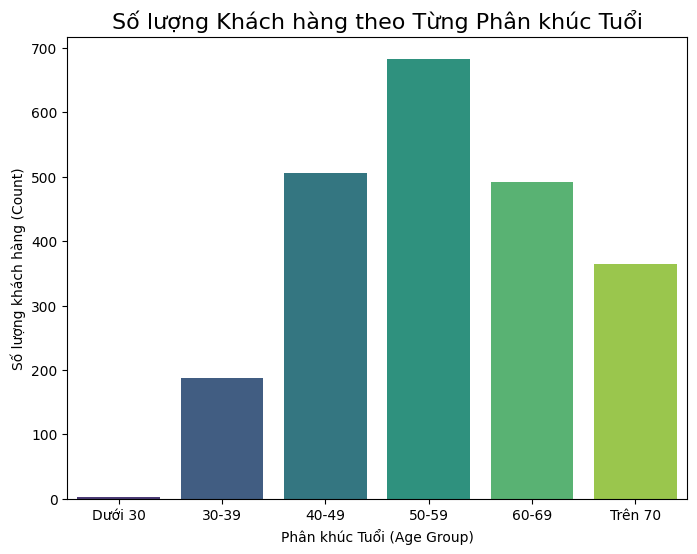

In [ ]:
# Tổng hợp dữ liệu: đếm số lượng khách hàng theo nhóm tuổi
customers_by_age_group = df['Age_Group'].value_counts()

# Tạo biểu đồ cột cho Age_Group
plt.figure(figsize=(8, 6))
sns.barplot(x=customers_by_age_group.index,y=customers_by_age_group.values, palette='viridis', hue=customers_by_age_group.index)
plt.title('Số lượng Khách hàng theo Từng Phân khúc Tuổi', fontsize=16)
plt.xlabel('Phân khúc Tuổi (Age Group)')
plt.ylabel('Số lượng khách hàng (Count)')
plt.show()

=> Nhận xét từ `Age_Group`:

  * Phân khúc 50-59 tuổi là nhóm khách hàng đông đảo nhất, khẳng định vai trò cốt lõi của họ.

  * Các nhóm 40-49 tuổi và 60-69 tuổi là những phân khúc quan trọng tiếp theo.
  * Lượng khách hàng trẻ (dưới 30 tuổi) ít hơn đáng kể.

  Cho thấy công ty đang thu hút mạnh mẽ nhóm khách hàng trung niên và lớn tuổi, có thể do sản phẩm hoặc không gian mua sắm phù hợp với lứa tuổi này.



---



#### Biểu đồ cột cho `Country` (Quốc gia) để trực quan hóa Phân khúc khách hàng theo Country (Quốc gia)

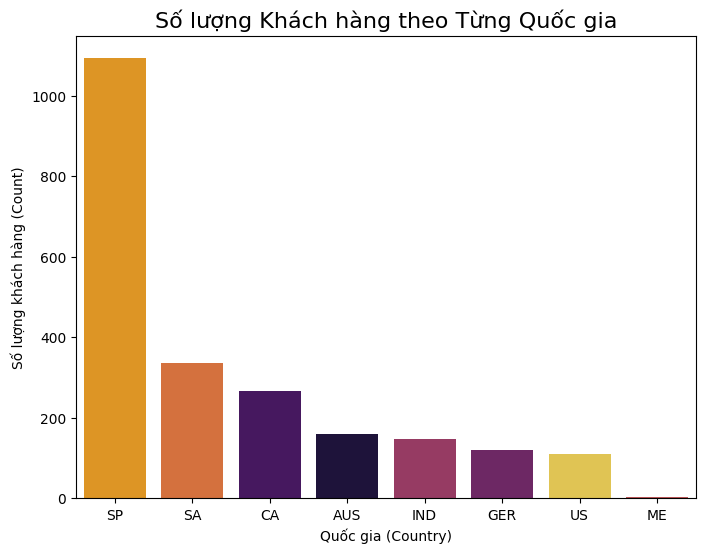

In [ ]:
# Tổng hợp dữ liệu: đếm số lượng khách hàng theo Country
customers_by_country = df['Country'].value_counts().sort_values(ascending=False)

# Tạo biểu đồ cột cho Country
plt.figure(figsize=(8, 6))
sns.barplot(x=customers_by_country.index, y=customers_by_country.values, order=customers_by_country.index, palette='inferno', hue=customers_by_country.index)
plt.title('Số lượng Khách hàng theo Từng Quốc gia', fontsize=16)
plt.xlabel('Quốc gia (Country)')
plt.ylabel('Số lượng khách hàng (Count)')
plt.show()

=> Nhận xét từ `Country`: Biểu đồ cho thấy sự áp đảo vượt trội của thị trường SP (Tây Ban Nha), với số lượng khách hàng cao hơn hẳn so với tất cả các quốc gia khác cộng lại.

  * Thị trường cốt lõi: SP (Tây Ban Nha) là thị trường trọng điểm và quan trọng nhất, chiếm phần lớn lượng khách hàng của công ty.

  * Thị trường cấp hai: Các thị trường đáng chú ý tiếp theo là SA (Ả Rập Xê Út) và CA (Canada), nhưng quy mô vẫn nhỏ hơn rất nhiều.

  * Các thị trường khác: Phần còn lại của các quốc gia có số lượng khách hàng không đáng kể

  Cho thấy hoạt động kinh doanh hiện tại của công ty đang phụ thuộc rất lớn vào một thị trường duy nhất là SP. Điều này cho thấy các chiến dịch marketing đang tập trung chủ yếu vào thị trường này, hoặc cũng có thể công ty đang đặt tại quốc gia SP.



---



 #### Biểu đồ tròn cho `Education` (Học vấn) để hiển thị tỷ lệ Phân bố Khách hàng theo các Cấp độ Học vấn.

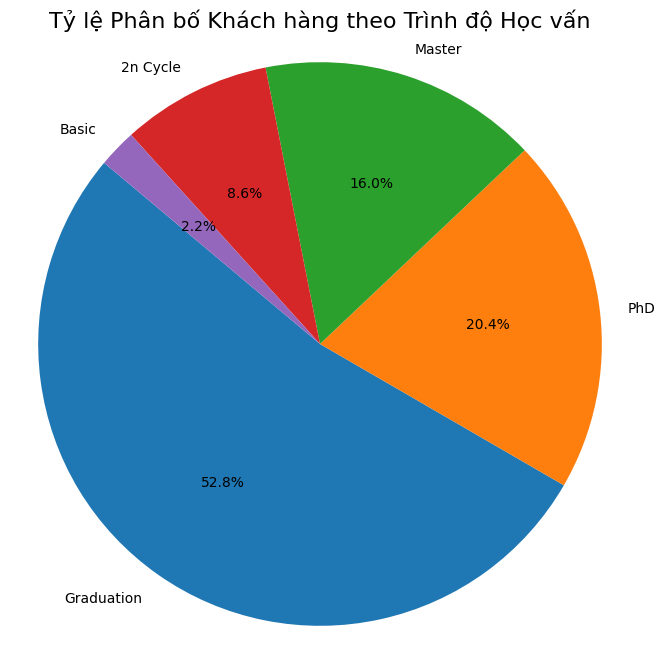

In [ ]:
# Tổng hợp dữ liệu: Đếm số lượng khách hàng theo Trình độ Học vấn
customers_by_Education = df['Education'].value_counts()

# Vẽ biểu đồ tròn cho Trình độ Học vấn (Education)
plt.figure(figsize=(8, 8))
plt.pie(customers_by_Education.values, labels=customers_by_Education.index, autopct='%1.1f%%', startangle=140)
plt.title('Tỷ lệ Phân bố Khách hàng theo Trình độ Học vấn', fontsize=16)
plt.axis('equal')
plt.show()


=> Nhận xét từ `Education`: Tệp khách hàng có trình độ học vấn khá cao. Nhóm đông nhất là những người đã tốt nghiệp đại học ("Graduation"). Số lượng khách hàng có bằng Thạc sĩ ("Master") và Tiến sĩ ("PhD") cũng chiếm tỷ trọng đáng kể.



---



#### Biểu đồ tròn cho `Marital_Status` (Tình trạng hôn nhân) để hiển thị Tỷ lệ phân bố Khách hàng theo Tình trạng hôn nhân.

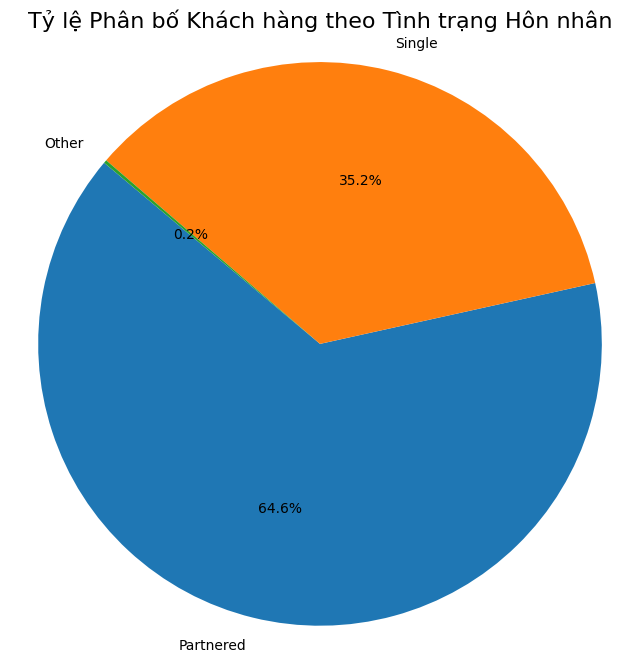

In [ ]:
# Tổng hợp dữ liệu: Đếm số lượng khách hàng theo Tìnht trạng hôn nhân
customers_by_maried = df['Marital_Status'].value_counts()

# Biểu đồ tròn cho 'Marital_Status' (Tình trạng Hôn nhân)
plt.figure(figsize=(8, 8))
plt.pie(customers_by_maried.values, labels=customers_by_maried.index, autopct='%1.1f%%', startangle=140)
plt.title('Tỷ lệ Phân bố Khách hàng theo Tình trạng Hôn nhân', fontsize=16)
plt.axis('equal')
plt.show()

=> Nhận xét từ `Marital status`: Phần lớn khách hàng đã có gia đình hoặc đang trong một mối quan hệ ("Partnered"), với số lượng gần gấp đôi so với nhóm khách hàng độc thân ("Single").

Cho thấy, khách hàng mục tiêu là những người mua sắm cho gia đình, với nhu cầu về các mặt hàng gia dụng, thực phẩm cho nhiều người.



---



#### Biểu đồ cột cho `Total_Children` (Số lượng con cái) để hiển thị sự phân bố Số lượng khách hàng theo Số lượng con cái.

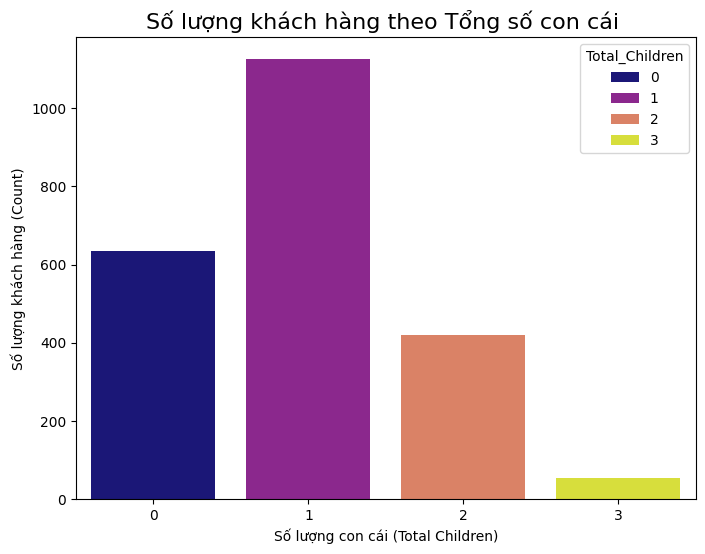

In [ ]:
# Tổng hợp dữ liệu: Đếm số lượng khách hàng theo Số lượng con cái
customers_by_childrens = df['Total_Children'].value_counts()

# Tại biểu đồ cột thể hiện phân bố Số lượng Con cái
plt.figure(figsize=(8, 6))
sns.barplot(x=customers_by_childrens.index, y=customers_by_childrens.values, palette='plasma', hue=customers_by_childrens.index)
plt.title('Số lượng khách hàng theo Tổng số con cái ', fontsize=16)
plt.xlabel('Số lượng con cái (Total Children)')
plt.ylabel('Số lượng khách hàng (Count)')
plt.show()

=> Nhận xét từ `Total_Children`: Cấu trúc gia đình của khách hàng khá nhỏ. Phổ biến nhất là các gia đình có 1 con, chiếm số lượng đông đảo nhất. Nhóm không có con cũng chiếm một phần đáng kể.



---



#### Biểu đồ cột cho `Income_Group` (Nhóm tuổi) để hiển thị Số lượng Khách hàng theo Từng Phân khúc Thu nhập

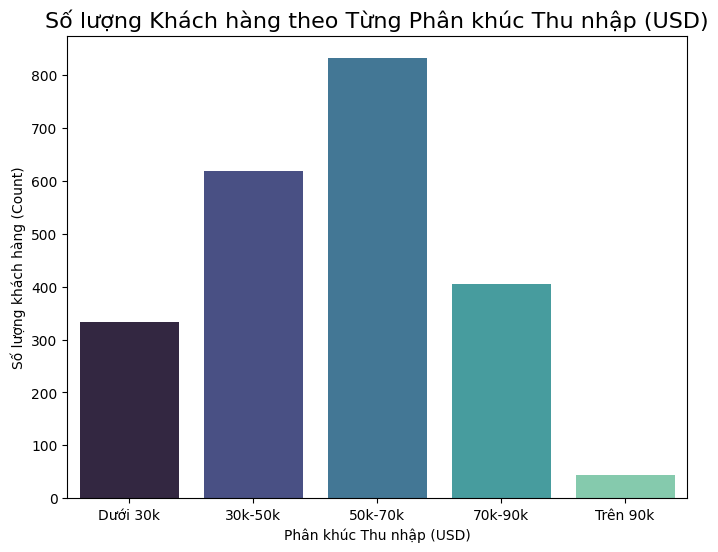

In [ ]:
# Tổng hợp dữ liệu: đếm số lượng khách hàng theo nhóm Thu nhập
customers_by_income_group = df['Income_Group'].value_counts()

# Tạo biểu đồ cột cho Income_Group
plt.figure(figsize=(8, 6))
sns.barplot(x=customers_by_income_group.index, y=customers_by_income_group.values, palette='mako', hue=customers_by_income_group.index)
plt.title('Số lượng Khách hàng theo Từng Phân khúc Thu nhập (USD)', fontsize=16)
plt.xlabel('Phân khúc Thu nhập (USD)')
plt.ylabel('Số lượng khách hàng (Count)')
plt.show()

=> Nhận xét từ `Income_Group`: Phân tích cho thấy cơ sở khách hàng của công ty tập trung rõ rệt vào các phân khúc thu nhập tầm trung.
  * Khách hàng cốt lõi:Nhóm $50,000 - 70,000$ USD là phân khúc đông đảo nhất, với hơn 800 khách hàng, khẳng định đây là nhóm khách hàng mục tiêu và cốt lõi của công ty.
  * Nhóm quan trọng thứ hai: Nhóm $30,000 - 50,000$ USD cũng chiếm số lượng đáng kể, củng cố sự ưu thế của tệp khách hàng có thu nhập trung bình.
  * Hạn chế ở Phân khúc Cao cấp: Ngược lại, nhóm khách hàng có thu nhập rất cao (Trên $90,000$ USD) chỉ chiếm một tỷ lệ rất nhỏ trong cơ cấu khách hàng.

Kết luận: Điều này cho thấy sản phẩm và chiến lược giá của công ty đang rất thành công trong việc thu hút đại đa số khách hàng có mức thu nhập từ 30,000 USD đến 70,000 USD.



---



### Biểu đồ cột cho `Tenure_Group` để phản ánh Phân bố Thâm niên Khách hàng

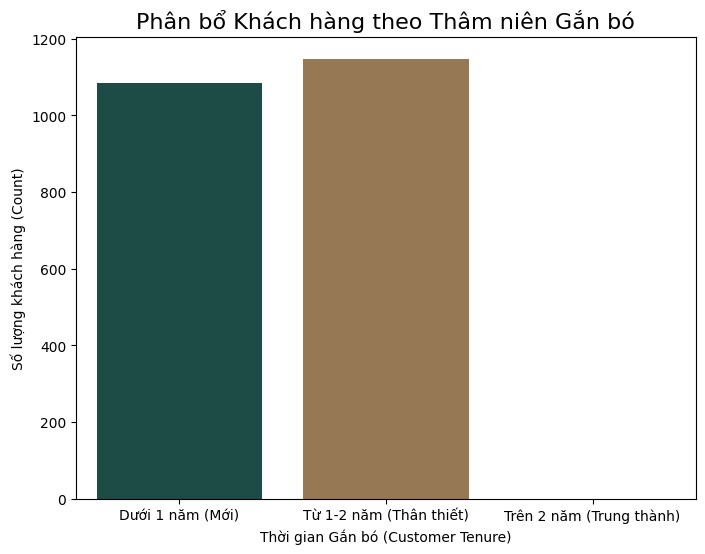

In [ ]:
# Tổng hợp dữ liệu: đếm số lượng khách hàng theo từng nhóm Thâm niên
customers_by_tenure = df['Tenure_Group'].value_counts()

# Tạo biểu đồ cột
plt.figure(figsize=(8, 6))
sns.barplot(
    x=customers_by_tenure.index,
    y=customers_by_tenure.values,
    hue=customers_by_tenure.index,
    palette='cubehelix'
)
plt.title('Phân bổ Khách hàng theo Thâm niên Gắn bó', fontsize=16)
plt.xlabel('Thời gian Gắn bó (Customer Tenure)')
plt.ylabel('Số lượng khách hàng (Count)')
plt.show()

=> Nhận xét từ `Tenure_Group`: Biểu đồ cho thấy một sự phân bổ khách hàng lành mạnh và cân bằng trong khoảng thời gian hoạt động gần 2 năm của dữ liệu.

  * Sự cân bằng giữa Thu hút và Giữ chân: Công ty có một số lượng gần như ngang bằng giữa khách hàng mới hơn (Dưới 1 năm) và khách hàng đã gắn bó lâu hơn (Từ 1-2 năm).

  * Tăng trưởng ổn định: Điều này cho thấy công ty không chỉ làm tốt việc thu hút khách hàng mới mà còn giữ chân thành công họ để trở thành khách hàng thân thiết trong năm tiếp theo.

  Lưu ý: Cột "Trên 2 năm (Trung thành)" bị trống không có nghĩa là khách hàng đã rời bỏ. Lý do là vì toàn bộ lịch sử của bộ dữ liệu này chỉ kéo dài trong khoảng 2 năm, do đó chưa thể có khách hàng nào đạt đến mốc thâm niên này.



---



### **2.2) Biểu đồ về các Đặc trưng trong NHÓM 2- HÀNH VI CHI TIÊU**

#### Biểu đồ histogram và boxplot cho `Total_Spending` (Tổng chi tiêu) để hiển thị sự phân bố Tổng Chi tiêu của Khách hàng

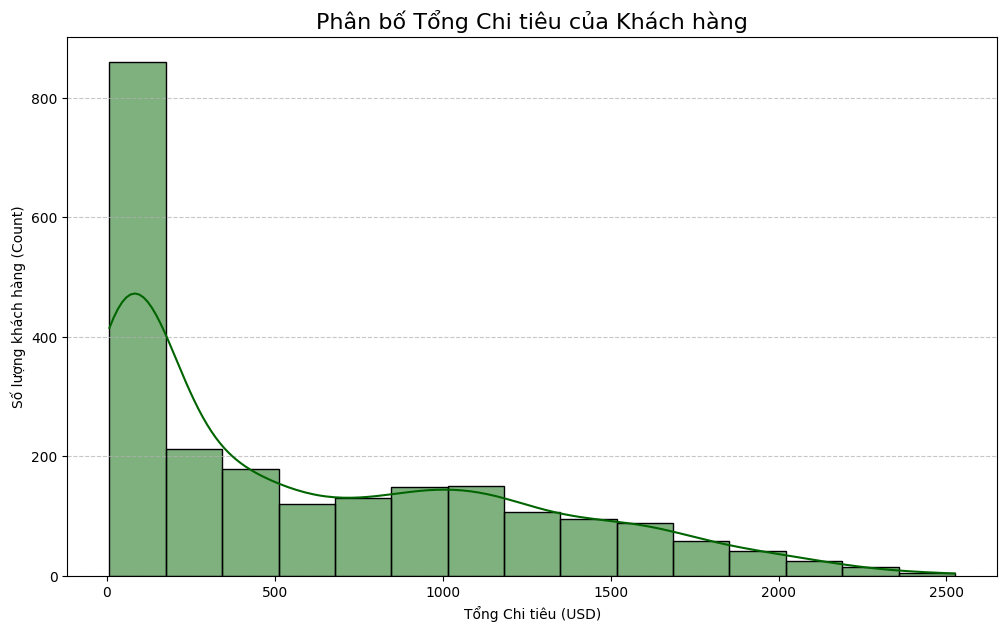

In [ ]:
# Biểu đồ Histogram cho Tổng Chi tiêu
plt.figure(figsize=(12, 7))
sns.histplot(data=df, x='Total_Spending', kde=True, bins=15, color='darkgreen')
plt.title('Phân bố Tổng Chi tiêu của Khách hàng', fontsize=16)
plt.xlabel('Tổng Chi tiêu (USD)')
plt.ylabel('Số lượng khách hàng (Count)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

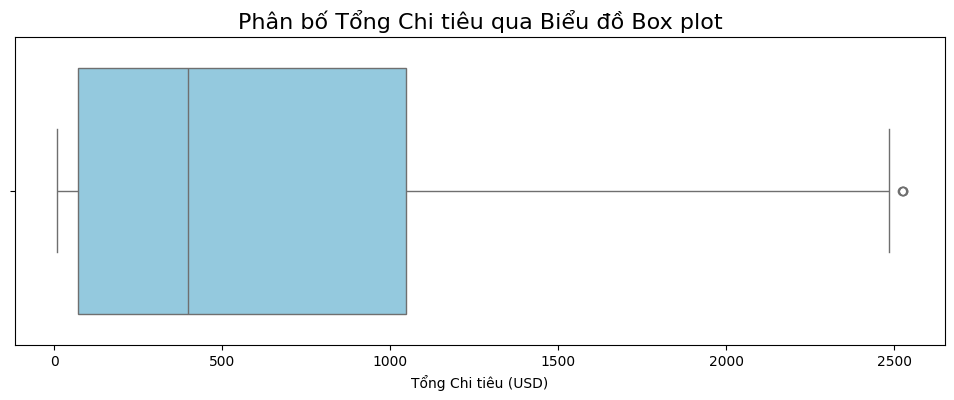

In [ ]:
# Biểu đồ Boxplot cho 'Total_Spending' (Tổng Chi tiêu)
plt.figure(figsize=(12, 4))
sns.boxplot(data=df, x='Total_Spending', color='skyblue')
plt.title('Phân bố Tổng Chi tiêu qua Biểu đồ Box plot', fontsize=16)
plt.xlabel('Tổng Chi tiêu (USD)')
plt.show()

=> Nhận xét từ `Total_Spending`:
  *  Cả hai biểu đồ đều làm rõ sự phân bố Tổng Chi tiêu của khách hàng bị lệch mạnh về phía chi tiêu thấp. Cụ thể, biểu đồ Histogram chỉ ra rằng phần lớn khách hàng (hơn 800 người) tập trung ở mức chi tiêu ban đầu rất thấp (dưới 250USD), trong khi số lượng khách hàng giảm dần khi chi tiêu tăng. Biểu đồ Box Plot củng cố điều này với đường trung vị nằm ở mức thấp (khoảng 400USD), xác nhận 50% khách hàng chi tiêu dưới ngưỡng đó.

  * Xác định "Khách hàng VIP": Cả hai biểu đồ đều cho thấy sự tồn tại của một nhóm khách hàng giá trị cao. "Đuôi dài" của Histogram và đặc biệt là điểm tròn outlier trong Box plot đã chỉ ra rõ ràng sự tồn tại của một nhóm nhỏ khách hàng có mức chi tiêu vượt trội (trên 2,300 USD).

Như vậy công ty có hai nhóm khách hàng chính: một nhóm rất lớn các khách hàng chi tiêu vừa phải, và một nhóm nhỏ nhưng cực kỳ quan trọng là các "khách hàng VIP". Việc nhận diện và có chiến lược chăm sóc riêng cho nhóm VIP này là vô cùng cần thiết.



---



#### Biểu đồ cột thể hiện Mức Chi tiêu của Khách hàng theo các Danh mục Sản phẩm (`MntWines`, `Mnt...` )

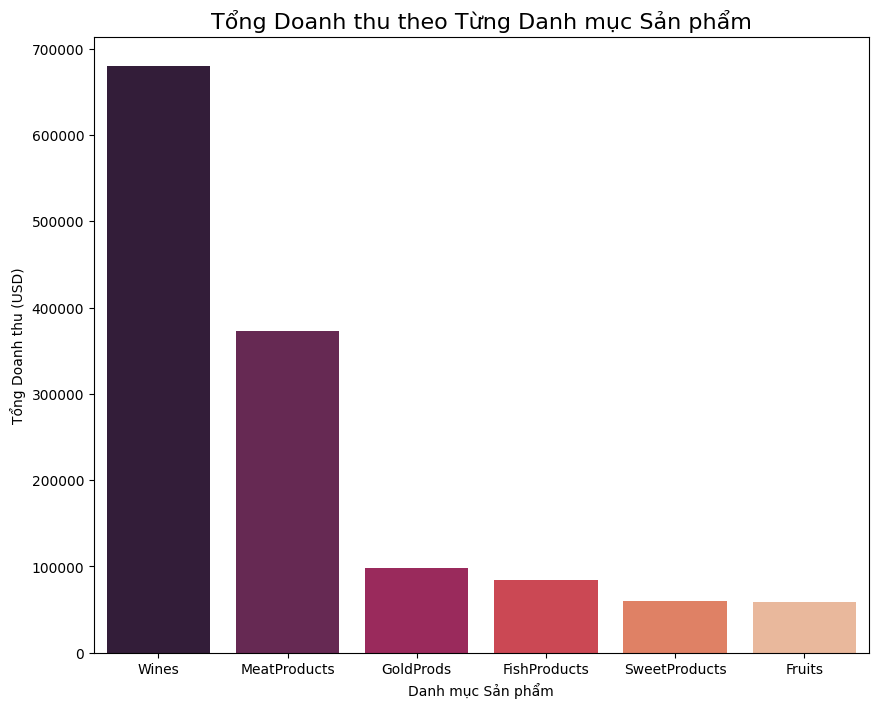

In [ ]:
# --- Tổng hợp dữ liệu: Tính toán tổng chi tiêu cho mỗi danh mục ---
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
total_spending_by_category = df[spending_cols].sum().sort_values(ascending=False)

# Đổi tên cột cho đẹp hơn (bỏ "Mnt")
total_spending_by_category.index = [col.replace('Mnt', '') for col in total_spending_by_category.index]

# --- Trực quan hóa bằng biểu đồ cột ---
plt.figure(figsize=(10, 8))
sns.barplot(
    x=total_spending_by_category.index,
    y=total_spending_by_category.values,
    hue=total_spending_by_category.index,
    palette='rocket'
)

plt.title('Tổng Doanh thu theo Từng Danh mục Sản phẩm', fontsize=16)
plt.xlabel('Danh mục Sản phẩm')
plt.ylabel('Tổng Doanh thu (USD)')
plt.show()

=> Nhận xét:
  * Sản phẩm chủ lực: Rượu vang (Wines) và Thịt (MeatProducts) là dòng sản phẩm chính của công ty, mang lại doanh thu cao vượt trội so với các danh mục còn lại.

  * Sản phẩm phụ: Ngược lại, các sản phẩm như Trái cây (Fruits) và Đồ ngọt (SweetProducts) chỉ đóng góp một phần doanh thu rất nhỏ.

  * Sản phẩm cao cấp là danh mục chi tiêu đứng thứ ba trong biểu đồ, cho thấy mức độ sẵn lòng chi tiêu cho các sản phẩm đắt tiền hơn cao hơn so với chi tiêu cho các mặt hàng thông thường (như Cá, Trái cây, Đồ ngọt).

Như vậy, Mọi chiến lược marketing, quản lý hàng tồn kho, và chương trình khuyến mãi nên tập trung và ưu tiên cho hai danh mục cốt lõi là Rượu vang và Thịt để tối đa hóa lợi nhuận.



---



### **2.3) Biểu đồ về các đặc trưng trong NHÓM 3- KÊNH GIAO DỊCH MUA SẮM**

#### Biểu đồ histogram cho `Total_NumberOfPurchases` để thể hiện Phân phối tần suất mua hàng của khách hàng

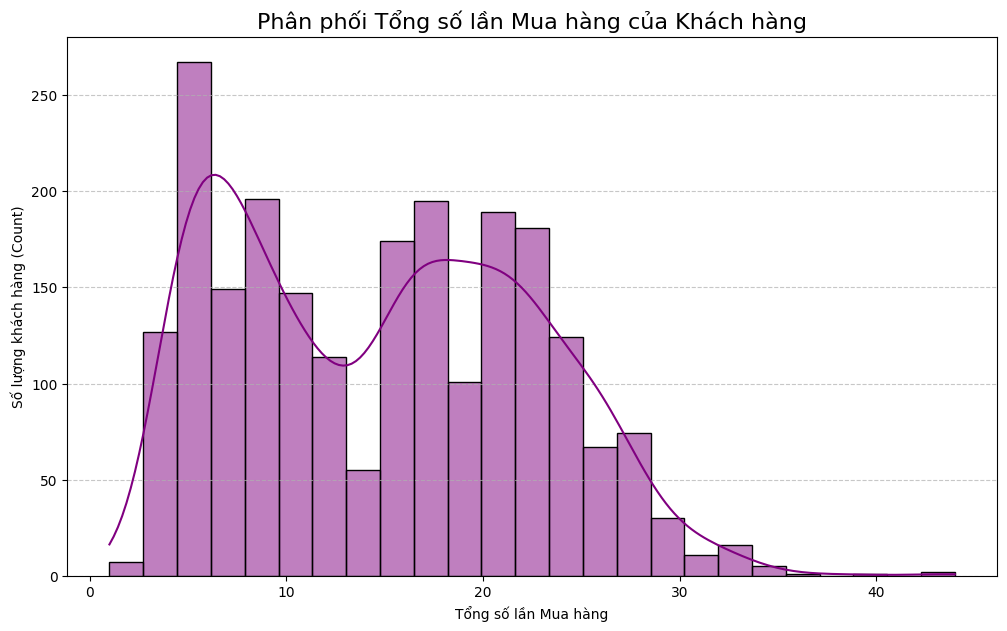

In [ ]:
# Biểu đồ Histogram cho Tổng số lần Mua hàng
plt.figure(figsize=(12, 7))
sns.histplot(data=df, x='Total_NumberOfPurchases', kde=True, bins=25, color='purple')

plt.title('Phân phối Tổng số lần Mua hàng của Khách hàng', fontsize=16)
plt.xlabel('Tổng số lần Mua hàng')
plt.ylabel('Số lượng khách hàng (Count)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

=> Nhận xét từ `Total_NumberOfPurchases`: Biểu đồ này cho thấy tệp khách hàng của công ty có hai nhóm hành vi mua sắm chính, thể hiện qua phân phối có hai đỉnh.
  * Nhóm 1 - Khách hàng không thường xuyên: Đây là nhóm khách hàng lớn nhất, tập trung ở đỉnh đầu tiên với tần suất mua hàng tương đối thấp (khoảng 5-8 lần).
  * Nhóm 2 - Khách hàng đều đặn: Một nhóm quan trọng khác tập trung ở đỉnh thứ hai, với tần suất mua hàng cao và đều đặn hơn nhiều (khoảng 20-22 lần).

Như vậy, thay vì có một kiểu khách hàng điển hình, công ty đang phục vụ hai phân khúc rất khác nhau: một nền tảng lớn các khách hàng mua sắm ít và một nhóm cốt lõi các khách hàng mua sắm rất thường xuyên. Các chiến lược kinh doanh nên được điều chỉnh để phù hợp với từng nhóm này, ví dụ: khuyến khích nhóm "Mua sắm ít" mua nhiều hơn và tri ân nhóm "Mua thường xuyên" để giữ chân họ.



---



### Biểu đồ cột Phân tích tần suất giao dịch trên các Kênh Mua sắm (`NumStorePurchases`, `Num...`)

Mục tiêu: để xác định kênh mua sắm nào (Cửa hàng, Web, Catalog, Ưu đãi) là hiệu quả nhất và được khách hàng ưa chuộng nhất, dựa trên tổng số lượng giao dịch.

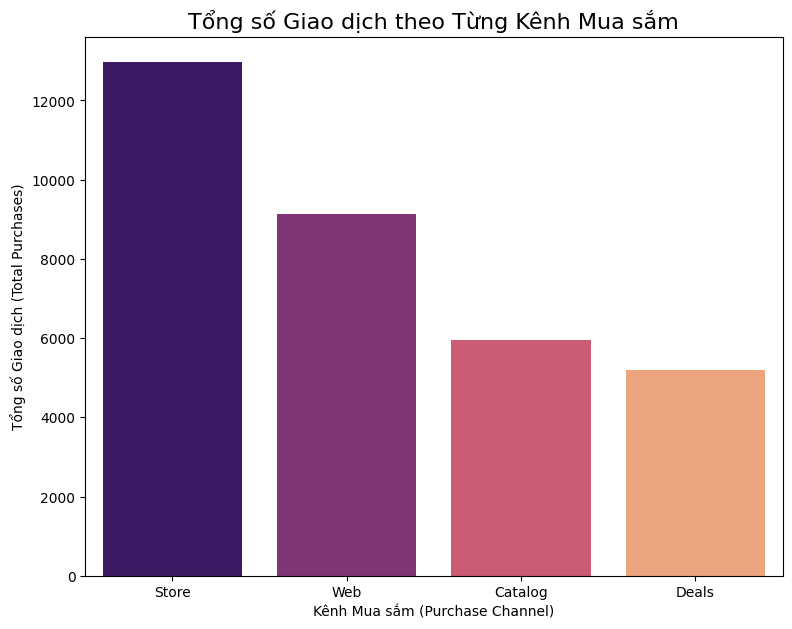

In [ ]:
# --- Tổng hợp dữ liệu: Tính toán tổng số lượt mua hàng cho mỗi kênh ---
purchase_channels = ['NumStorePurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumDealsPurchases']
total_purchases_by_channel = df[purchase_channels].sum().sort_values(ascending=False)

# Đổi tên cột cho đẹp hơn (bỏ "Num" và "Purchases")
total_purchases_by_channel.index = ['Store', 'Web', 'Catalog', 'Deals']

# --- Trực quan hóa bằng biểu đồ cột ---
plt.figure(figsize=(9, 7))
sns.barplot(
    x=total_purchases_by_channel.index,
    y=total_purchases_by_channel.values,
    hue=total_purchases_by_channel.index,
    palette='magma'
)

plt.title('Tổng số Giao dịch theo Từng Kênh Mua sắm', fontsize=16)
plt.xlabel('Kênh Mua sắm (Purchase Channel)')
plt.ylabel('Tổng số Giao dịch (Total Purchases)')
plt.show()

=> Nhận xét:
  * Kênh chủ lực: Biểu đồ cho thấy Mua sắm tại cửa hàng (Store) là kênh mua sắm quan trọng và phổ biến nhất, chiếm số lượng giao dịch cao vượt trội. Đây chính là "xương sống" của hoạt động bán hàng.

  * Kênh quan trọng thứ hai: Mua sắm qua Web cũng là một kênh rất hiệu quả, cho thấy tầm quan trọng của kênh bán hàng trực tuyến.

  * Kênh phụ: Ngược lại, Mua qua Catalog và Mua theo Ưu đãi (Deals) có số lượng giao dịch thấp hơn đáng kể, cho thấy đây có thể là các kênh phụ hoặc chỉ hiệu quả với một nhóm khách hàng nhất định.

Như vậy, trải nghiệm tại cửa hàng là yếu tố cốt lõi thu hút khách hàng. Công ty nên tiếp tục đầu tư vào kênh này, đồng thời đẩy mạnh phát triển kênh Web để bắt kịp xu hướng mua sắm hiện đại.



---



### **2.4) Biểu đồ về các đặc trưng trong NHÓM 4- TƯƠNG TÁC VÀ PHẢN HỒI CỦA KHÁCH HÀNG**

#### Biểu đồ histogram cho `Recency` (Lần mua gần nhất)

Mục tiêu: Hiểu được khách hàng đã mua sắm gần đây như thế nào. Một lượng lớn khách hàng có Recency thấp là dấu hiệu tốt (khách hàng năng động), trong khi Recency cao cho thấy nguy cơ khách hàng đang rời bỏ.

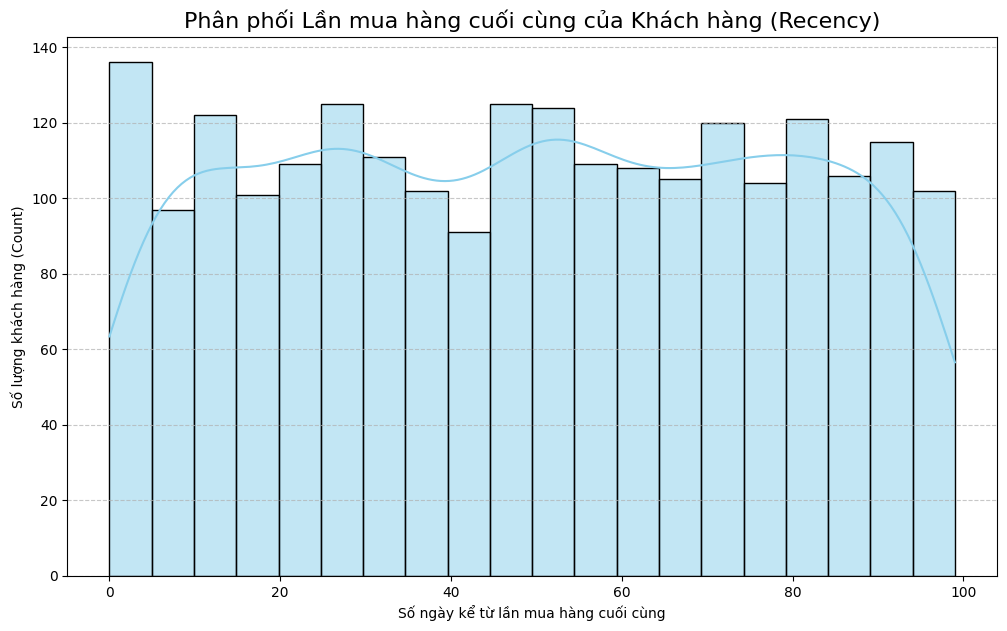

In [ ]:
# Biểu đồ Histogram cho Recency
plt.figure(figsize=(12, 7))
sns.histplot(data=df, x='Recency', kde=True, bins=20, color='skyblue')

plt.title('Phân phối Lần mua hàng cuối cùng của Khách hàng (Recency)', fontsize=16)
plt.xlabel('Số ngày kể từ lần mua hàng cuối cùng')
plt.ylabel('Số lượng khách hàng (Count)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

=> Nhận xét từ `Recency`: Biểu đồ cho thấy sự phân bổ khá đồng đều, một dấu hiệu tích cực về mức độ tái mua sắm tệp khách hàng.

  * Hành vi ổn định: Điều này có nghĩa là số lượng khách hàng mua sắm gần đây (Recency thấp) và những người mua sắm đã lâu (Recency cao) là tương đương nhau. Không có một đỉnh hay "thung lũng" nào bất thường.

  * Phân phối đều, và khoảng 50% khách hàng có Recency < 50 ngày: cho thấy một dòng chảy mua sắm ổn định và liên tục theo thời gian, thay vì bị phụ thuộc quá nhiều vào các sự kiện hay mùa vụ nhất định.
  
Như vậy, công ty có một tệp khách hàng năng động và ổn định. Việc không có một lượng lớn khách hàng tập trung ở mức Recency cao cho thấy công ty đang làm tốt việc giữ cho khách hàng quay trở lại đều đặn.





---



### Biểu đồ cột cho `NumWebVisitsMonth` phản ánh Phân bố Số lượt Truy cập Web mỗi tháng của khách

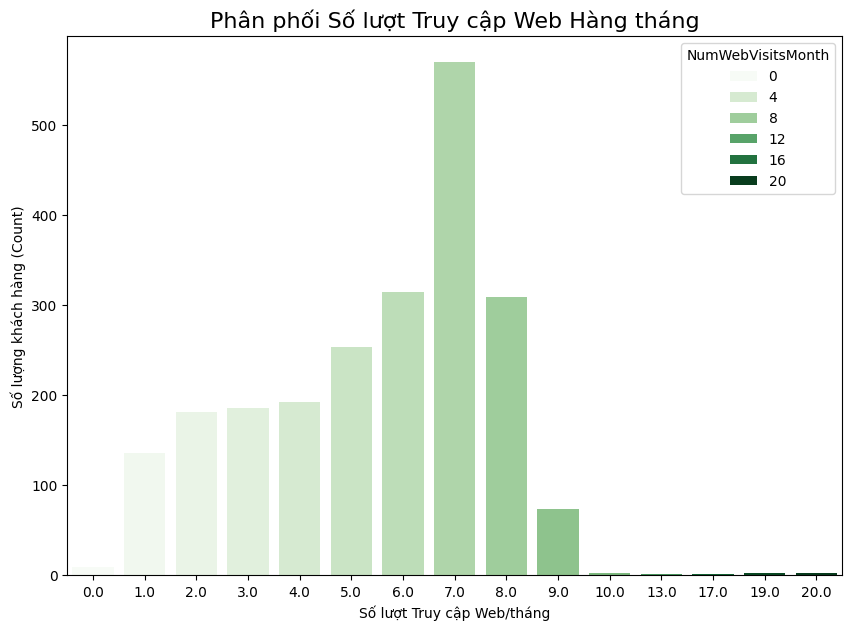

In [ ]:
# Tổng hợp dữ liệu: đếm số lượng khách hàng theo Số lượt Truy cập Web Hàng tháng
customers_by_num_web_visits = df['NumWebVisitsMonth'].value_counts()

# Biểu đồ Cột cho Số lượt Truy cập Web Hàng tháng
plt.figure(figsize=(10, 7))
sns.barplot(
    x = customers_by_num_web_visits.index,
    y= customers_by_num_web_visits.values,
    hue= customers_by_num_web_visits.index,
    palette='Greens'
)

plt.title('Phân phối Số lượt Truy cập Web Hàng tháng', fontsize=16)
plt.xlabel('Số lượt Truy cập Web/tháng')
plt.ylabel('Số lượng khách hàng (Count)')
plt.show()

=> Nhận xét từ `NumWebVisitsMonth`:
  * Hành vi phổ biến: Biểu đồ cho thấy một số lượng rất lớn khách hàng truy cập website với tần suất cao, cụ thể là 7 lần/tháng. Đây là mức truy cập phổ biến nhất.

  * Mức độ tương tác cao: Các mức truy cập cao khác như 6 và 8 lần/tháng cũng có số lượng khách hàng đáng kể.

  * Ngược lại, số lượng khách hàng truy cập ít (0-2 lần/tháng) là tương đối thấp.

Như vậy, tệp khách hàng của công ty có mức độ tương tác trực tuyến cao. Việc website thu hút một lượng lớn khách hàng quay lại 5-8 lần mỗi tháng cho thấy đây là một kênh truyền thông hiệu quả.




---



#### Biểu đồ tròn cho `Complain` (Phàn nàn) để hiển thị tỷ lệ khách hàng có phàn nàn.

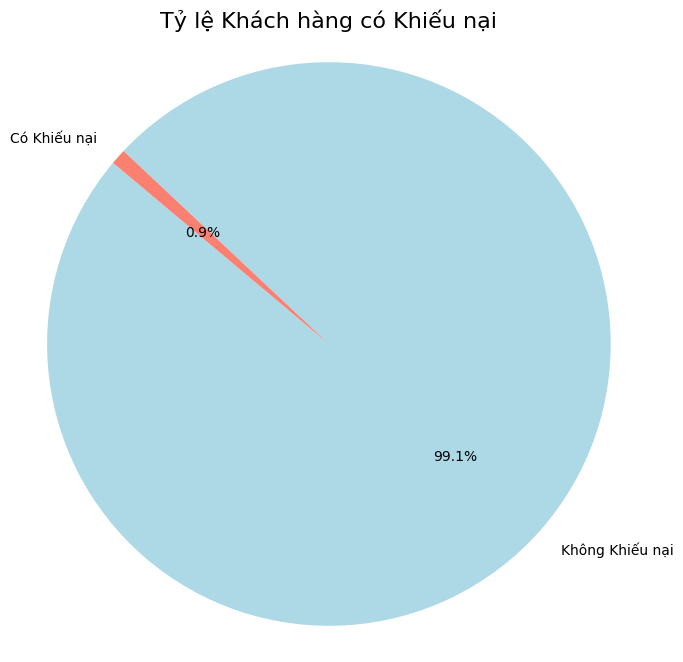

In [ ]:
# Tổng hợp dữ liệu: đếm số lượng Complain của khách hàng
complain_counts = df['Complain'].value_counts()
complain_labels = ['Không Khiếu nại', 'Có Khiếu nại']

# Biểu đồ tròn cho Phàn nàn (Complain)
plt.figure(figsize=(8, 8))
plt.pie(
    complain_counts,
    labels=complain_labels,
    autopct='%1.1f%%',  # Hiển thị tỷ lệ %
    startangle=140,      # Xoay biểu đồ cho đẹp mắt
    colors=['lightblue', 'salmon'] # Chọn màu sắc nhẹ nhàng
)

plt.title('Tỷ lệ Khách hàng có Khiếu nại', fontsize=16)
plt.axis('equal')
plt.show()

=> Nhận xét từ `Complain`: mức độ hài lòng của khách hàng đang rất cao, với tỷ lệ phàn nàn gần như không đáng kể.



---



### Biểu đồ cột hiển thị Tỷ lệ Chấp nhận Chiến dịch marketing từ `AcceptedCmp1` đến `AcceptedCmp5`, cho đến `Respone` (Chiến dịch gần nhất)

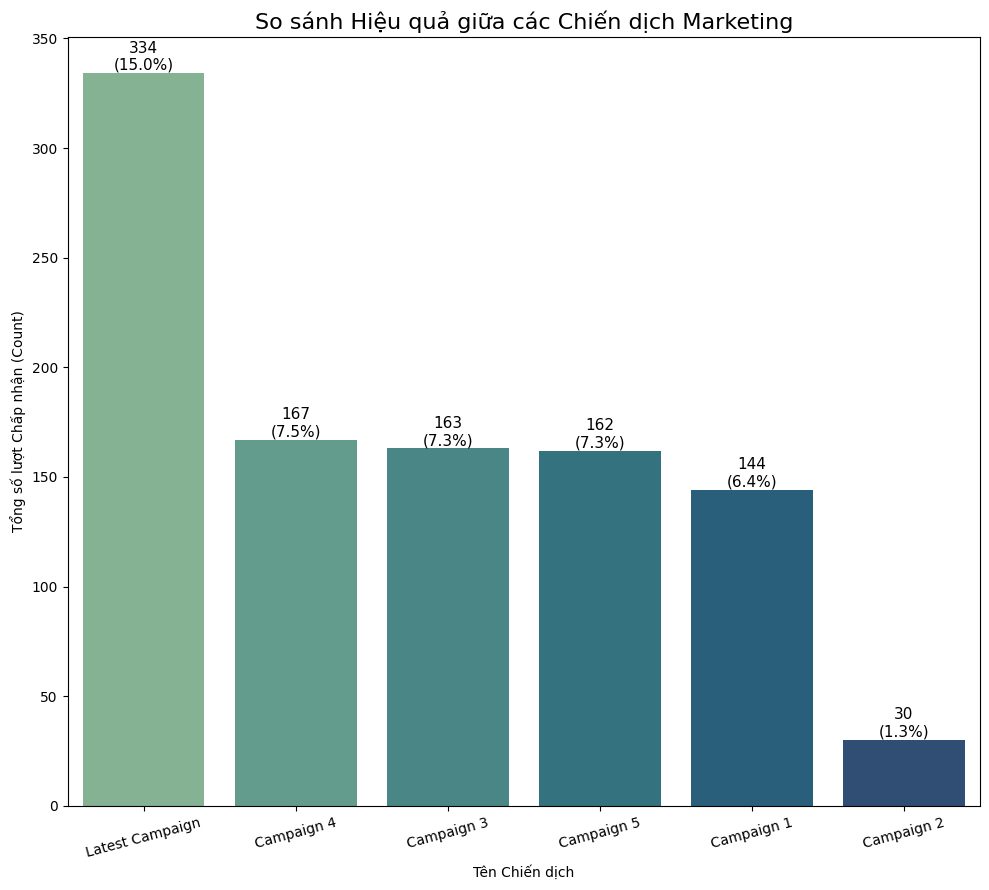

In [ ]:
# Tổng hợp dữ liệu: Tính toán tổng số lượt chấp nhận cho mỗi chiến dịch
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
campaign_success = df[campaign_cols].sum().sort_values(ascending=False)

# Đổi tên cho đẹp hơn
# Tạo một từ điển để map tên cũ sang tên mới, dễ hiểu hơn
rename_map = {
    'AcceptedCmp1': 'Campaign 1',
    'AcceptedCmp2': 'Campaign 2',
    'AcceptedCmp3': 'Campaign 3',
    'AcceptedCmp4': 'Campaign 4',
    'AcceptedCmp5': 'Campaign 5',
    'Response': 'Latest Campaign' # (Chiến dịch Gần nhất)
}
campaign_success = campaign_success.rename(index=rename_map)

# Trrực quan hóa bằng biểu đồ cột
plt.figure(figsize=(10, 9))
ax = sns.barplot(
    x=campaign_success.index,
    y=campaign_success.values,
    hue = campaign_success.index,
    palette='crest'
)

# Thêm nhãn kép (Số lượng & Tỷ lệ %) cho rõ ràng
total_customers = len(df) # Lấy tổng số khách hàng để tính %

for p in ax.patches:
    height = p.get_height()
    percentage = 100 * height / total_customers
    # Tạo nhãn có cả 2 dòng: số lượng và %
    label = f'{int(height)}\n({percentage:.1f}%)'

    ax.annotate(label,
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 12),
                textcoords='offset points',
                fontsize=11)

plt.title('So sánh Hiệu quả giữa các Chiến dịch Marketing', fontsize=16)
plt.xlabel('Tên Chiến dịch')
plt.ylabel('Tổng số lượt Chấp nhận (Count)')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

=> Nhận xét từ `AcceptedCmp1` đến `AcceptedCmp5`, cho đến `Response` :
  * Chiến dịch Gần nhất (Response - Latest Campaign): Có hiệu quả vượt trội hơn hẳn các chiến dịch trong quá khứ. Số lượt chấp nhận của chiến dịch gần nhất cao gần gấp đôi so với chiến dịch thành công thứ hai (Campaign 4), cho thấy một sự cải tiến rất lớn trong chiến lược marketing.

  * Các chiến dịch quá khứ: Các chiến dịch trước đó có hiệu quả khá tương đồng nhau, nhưng không có chiến dịch nào tạo ra được sự đột phá tương tự. Campaign 2 là chiến dịch kém hiệu quả nhất.

Như vậy, công ty đã tìm ra một công thức marketing hiệu quả với chiến dịch gần nhất. Việc phân tích sâu hơn để tìm hiểu "điều gì đã làm nên sự khác biệt" cho chiến dịch này là cực kỳ quan trọng để có thể tái tạo thành công trong tương lai.



---



## 🎯 **TỔNG KẾT PHẦN B**: Qua quá trình thống kê và trực quan hóa cơ bản, chúng ta đã vẽ nên một bức tranh rõ ràng về các đặc điểm nổi bật của tệp khách hàng và hoạt động kinh doanh của công ty.

  * **Chân dung của chủ đạo của khách hàng:**
    * Nhân khẩu học: Khách hàng đa số những người trưởng thành (đông nhất là nhóm 50-59 tuổi), có trình độ học vấn cao (phần lớn từ Graduation trở lên), và mức thu nhập từ trung bình đến khá (tập trung ở khoảng 30k - 70k USD/năm). Về mặt địa lý, công ty đang đang có nguồn kháhc hàng chủ yếu đến từ thị trường SP (Tây Ban Nha).

    * Hành vi Mua sắm & Chi tiêu: Khách hàng đa số ưa thích Mua tại cửa hàng (Store) nhất và cũng rất tích cực tương tác trên Web. Rượu vang (Wines) và Thịt (MeatProducts) là hai danh mục được chi tiêu nhiều nhất.

  * **Những Tiền đề cho Phân tích Chuyên sâu ở phần C:**
    * Nền tảng Kinh doanh Vững chắc: Công ty đang sở hữu một tệp khách hàng có mức độ hài lòng cao, dòng chảy mua sắm ổn định, và cho thấy khả năng giữ chân khách hàng tốt trong giai đoạn đầu.
    * Mô hình Đa kênh Hiệu quả: Cả kênh offline (Store) và online (Web) đều đang hoạt động tốt.
    * Hiệu quả trong Marketing: Chiến dịch gần nhất đã đạt được thành công vượt trội, cần tìm phân tích sâu tìm nguyên nhân để tiếp tục phát huy.




---



###############################################################################

# **C) PHÂN TÍCH KHÁM PHÁ CHUYÊN SÂU (EXPLORATORY & RELATIONSHIP ANALYSIS)**



### **Mục tiêu**: Phần EDA này sẽ trả lời các câu hỏi kinh doanh cốt lõi, tập trung vào việc khám phá mối quan hệ gữa cách biến, so sánh phân khúc, và lý giải nguyên nhân để đưa ra các khuyến nghị kinh doanh.

### **C.1. PHÂN TÍCH TƯƠNG QUAN TỔNG THỂ (OVERRALL CORRELATION ANALYSIST)**

Mục tiêu: Bắt đầu Phần C, chúng ta sẽ nhìn vào "bức tranh lớn" để xem các biến số có mối quan hệ tuyến tính với nhau như thế nào.

Phương pháp: Tính toán ma trận tương quan và sử dụng Biểu đồ nhiệt (Heatmap) để trực quan hóa mối liên hệ giữa các biến số.

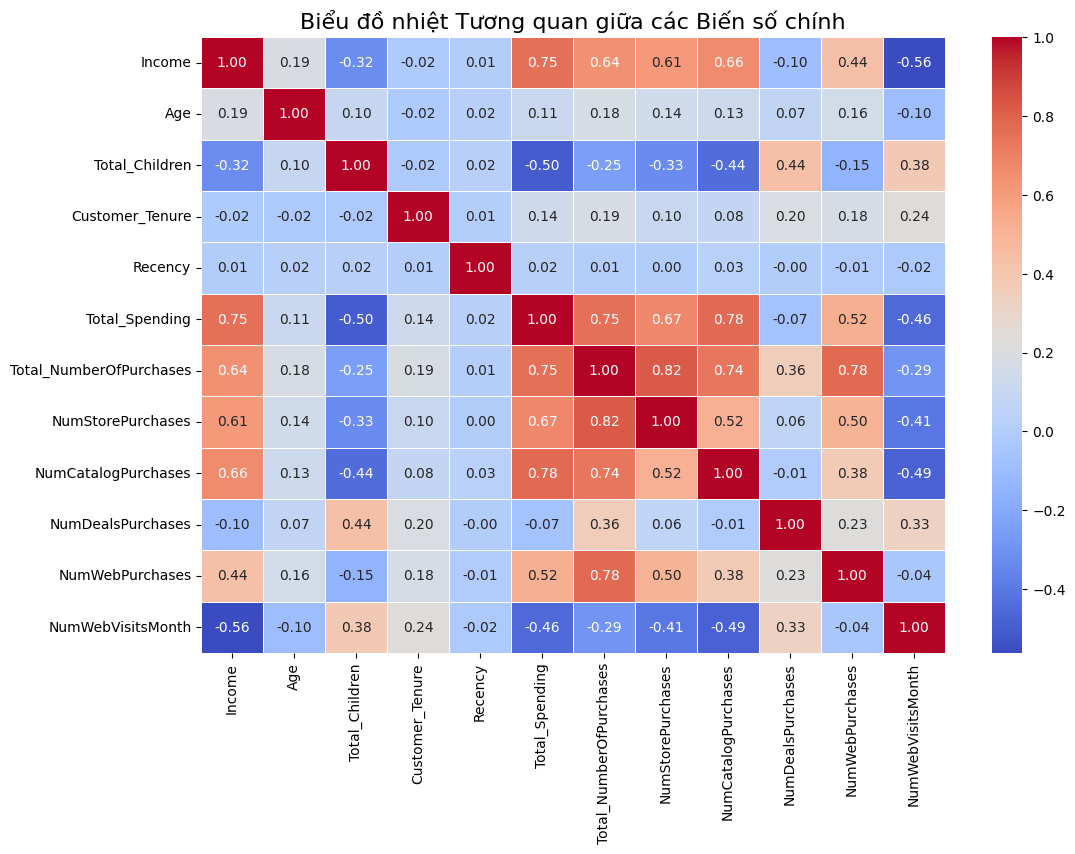

In [ ]:
# --- Bước 1: Lựa chọn các biến số quan trọng (có ý nghĩa kinh doanh) để phân tích tương quan ---
correlation_cols = [
    'Income', 'Age', 'Total_Children', 'Customer_Tenure',
    'Recency', 'Total_Spending', 'Total_NumberOfPurchases',
    'NumStorePurchases', 'NumCatalogPurchases', 'NumDealsPurchases',
    'NumWebPurchases', 'NumWebVisitsMonth',
]

# Tạo một DataFrame mới chỉ chứa các cột này
df_corr = df[correlation_cols]

# --- Bước 2: Tính toán ma trận tương quan ---
correlation_matrix = df_corr.corr()

# --- Bước 3: Trực quan hóa ma trận bằng Biểu đồ Heatmap ---
plt.figure(figsize=(12, 8))
sns.heatmap(
    data=correlation_matrix,
    annot=True,          # Hiển thị các con số (hệ số tương quan) lên trên ô
    cmap='coolwarm',     # Sử dụng bảng màu "nóng-lạnh" để dễ phân biệt tương quan thuận/nghịch
    fmt='.2f',           # Định dạng số hiển thị là số thập phân có 2 chữ số
    linewidths=.5        # Thêm đường kẻ mảnh giữa các ô cho rõ ràng
)

plt.title('Biểu đồ nhiệt Tương quan giữa các Biến số chính', fontsize=16)
plt.show()

### => Phân tích Toàn diện Biểu đồ nhiệt Tương quan

Biểu đồ chi tiết này cung cấp những insight cực kỳ giá trị. Chúng ta có thể nhóm các phát hiện chính như sau:

#### 📈 1. Động lực Chính: Thu nhập & Tần suất

* **`Income` vs. `Total_Spending` (+0.75):** Đây là mối tương quan **mạnh nhất**. Nó khẳng định: **Thu nhập càng cao, tổng chi tiêu càng lớn.**

* **`Total_Spending` vs. `Total_NumberOfPurchases` (+0.75):** Khách hàng **chi tiêu nhiều** cũng chính là những người **mua sắm thường xuyên nhất.**

* **`Income` vs. `Total_NumberOfPurchases` (+0.64):** Khách hàng có **thu nhập cao hơn** không chỉ chi tiêu nhiều hơn mà còn **mua sắm với tần suất cao hơn.**


#### 🏪 2. Phân tích Kênh Bán hàng (Kênh nào giá trị nhất?)

* **Kênh "Cao cấp" (`Catalog`):** **`NumCatalogPurchases`** có tương quan **mạnh nhất** với **`Total_Spending` (+0.78)** và với **`Income` (+0.66)**. Điều này *không* có nghĩa đây là kênh phổ biến nhất, mà cho thấy đây là kênh được **ưa chuộng nhất bởi nhóm khách hàng giàu có và chi tiêu nhiều nhất (nhóm "VIP")**.

* **Kênh "Xương sống" (`Store`):** **`NumStorePurchases`** có tương quan **rất mạnh** với **`Total_Spending` (+0.67)** và **`Income` (+0.61)**. (Kết hợp với phân tích ở Phần B, chúng ta biết đây là kênh **phổ biến nhất**), và biểu đồ này khẳng định nó cũng là một kênh chủ lực, thu hút được cả nhóm thu nhập cao và mang lại doanh thu lớn.

* **Kênh "Quan trọng" (`Web`):** **`NumWebPurchases`** cũng có tương quan **mạnh** với **`Total_Spending` (+0.52)**. Đây rõ ràng là một kênh bán hàng quan trọng, đóng góp đáng kể vào doanh thu.

#### 🔄 3. Insight về Khách hàng "Đa kênh" (Omnichannel)

* Chúng ta thấy các kênh bán hàng đều có **tương quan thuận mạnh mẽ với nhau**:
    * `NumStorePurchases` vs. `NumCatalogPurchases` **(+0.52)**
    * `NumStorePurchases` vs. `NumWebPurchases` **(+0.50)**

* Đồng thời, `Total_NumberOfPurchases` (Tần suất) có tương quan **cực mạnh** với cả 3 kênh: **`Store` (+0.82)**, **`Web` (+0.78)**, và **`Catalog` (+0.74)**.

* **=> Kết luận:** Khách hàng giá trị (mua thường xuyên) không chỉ chọn một kênh. Họ là những **khách hàng đa kênh**, họ mua sắm ở mọi nơi.

#### ❄️ 4. Yếu tố Cản trở & Insight Bất ngờ

* **Insight "Window Shopper":**
    * **`NumWebVisitsMonth` lại tương quan nghịch mạnh với `Income` (-0.56)** và với **`Total_Spending` (-0.46)**.

    * Thậm chí, `NumWebVisitsMonth` cũng chẳng liên quan gì đến `NumWebPurchases` cả (tương quan chỉ có **-0.04**).

    * *=> Insight:* Đây là phát hiện "ngược đời" quan trọng. **Lượt truy cập web cao KHÔNG đồng nghĩa với giá trị khách hàng cao.** Khách hàng có thu nhập cao và chi tiêu nhiều lại là những người lướt web ít hơn, có thể vì họ mua sắm có chủ đích hơn, họ đã biết họ cần mua gì nên không cần lướt web nhiều.
    

* **Ảnh hưởng của Con cái:**
    * `Total_Children` tương quan nghịch **mạnh** với `Total_Spending` **(-0.50)**.

    * Nó cũng tương quan nghịch ở mức **trung bình** với các kênh giá trị cao như `NumCatalogPurchases` **(-0.44)** và `NumStorePurchases` **(-0.33)**.
  
    * `Total_Children` vs. `Income` **(-0.32)**: Mối tương quan nghịch ở mức trung bình yếu. Nó cho thấy xu hướng khách hàng có nhiều con cũng là những người có thu nhập thấp hơn.

    * `Total_Children` vs. `Total_NumberOfPurchases` **(-0.25)**: Tương quan nghịch yếu, nhưng nó xác nhận xu hướng chung là có con cũng làm giảm nhẹ tần suất mua sắm.

#### 5. Các Tương quan Yếu
* Các biến như **`Age` (Tuổi)**, **`Customer_Tenure` (Thâm niên)**, và **`Recency` (Lần mua cuối)** vẫn cho thấy hệ số tương quan rất là thấp so với các biến chi tiêu chính.

  Tuy nhiên, điều này KHÔNG có nghĩa là chúng không quan trọng. Các phân tích sâu hơn ở C.2 và đặc biệt là phân khúc RFM ở C.3 sẽ chứng minh rằng:

  * Age có liên quan đến giá trị (nhóm VIP thường lớn tuổi hơn).

  * Customer_Tenure là một chỉ báo tốt (khách hàng giá trị cao thường có thâm niên lâu hơn).

  * Recency là một yếu tố cực kỳ quan trọng để đánh giá mức độ gắn kết và phân loại khách hàng thành các nhóm chiến lược.

### ✅ TỔNG KẾT C.1: Kết luận từ Biểu đồ nhiệt

* **Động lực chính:** Doanh thu được thúc đẩy mạnh mẽ bởi **`Income` (Thu nhập)**.

*  **Yếu tố cản trở chính:** Ảnh hưởng rất rõ ràng bởi `Total_Children`. Nhóm khách hàng có con cái có xu hướng thu nhập thấp hơn, đến cửa hàng ít hơn, mua sắm ít thường xuyên hơn, và cuối cùng là tổng chi tiêu thấp hơn.

* **Kênh liên kết mạnh nhất với nhóm "VIP":** `Catalog`.

* **Kênh phổ biến và chủ lực nhất:** `Store` (từ Phần B), và cũng liên kết mạnh với chi tiêu cao.

* **Hành vi Đa kênh (Omnichannel Behavior):** Khách hàng **mua sắm thường xuyên nhất** (tần suất cao) cũng chính là những người **mua sắm trên mọi kênh** (đa kênh).

*  **Insight "bất ngờ":** **Lượt truy cập web cao (`NumWebVisitsMonth`)** KHÔNG đồng nghĩa với giá trị khách hàng cao, mà ngược lại, nó tương quan nghịch với cả thu nhập và chi tiêu.



---



## **C.2. PHÂN TÍCH MỐI QUAN HỆ CHUYÊN SÂU (DEEP DIVE ANALYSIST)**


### **C.2.1. Ảnh hưởng của Thu nhập (`Income`) & Học vấn (`Education`) :**

Mục tiêu: Giải quyết câu hỏi "Thu nhập và trình độ học vấn ảnh hưởng đến sức mua và sở thích sản phẩm như thế nào?"

#### *C.2.1.a. Mối quan hệ giữa Thu nhập (`Income`) và Chi tiêu (`Total Spending`)*

  Biểu đồ nhiệt ở C.1 đã cho thấy giữa  Thu nhập (`Income`) và Chi tiêu (`Total Spending`) có tương quan thuận (+0.75). Bây giờ, chúng ta sẽ dùng Biểu đồ Phân tán (Scatter Plot) để nhìn rõ hình dáng của mối quan hệ này.

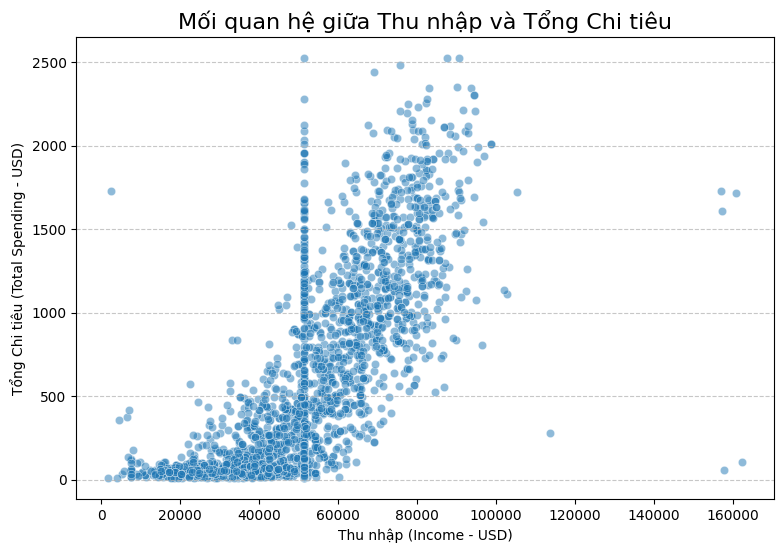

In [ ]:
# --- Trực quan hóa mối quan hệ giữa Thu nhập và Tổng Chi tiêu ---
# Chúng ta sử dụng 'scatterplot' đơn giản để trực quan hóa các điểm dữ liệu.

plt.figure(figsize=(9, 6))
sns.scatterplot(
    data=df,
    x='Income',
    y='Total_Spending',
    alpha=0.5  # Làm mờ các điểm để dễ dàng quan sát mật độ
)

plt.title('Mối quan hệ giữa Thu nhập và Tổng Chi tiêu', fontsize=16)
plt.xlabel('Thu nhập (Income - USD)')
plt.ylabel('Tổng Chi tiêu (Total Spending - USD)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

=> NHẬN XÉT: Biểu đồ này xác nhận một cách trực quan mối quan hệ tương quan thuận mạnh (+0.75) mà chúng ta đã thấy trong biểu đồ nhiệt C.1.

  * Xu hướng Rõ ràng: Các điểm dữ liệu tạo thành một đám mây đi từ góc dưới bên trái lên góc trên bên phải. Điều này khẳng định rõ ràng: khách hàng có thu nhập cao hơn thì xu hướng chi tiêu cũng cao hơn.

  * Sự tập trung của Số đông: Đa số khách hàng tập trung ở khu vực có thu nhập dưới 100,000 USD.

  * Điểm Ngoại vi: Có thể thấy một vài điểm dữ liệu ngoại vi đáng chú ý, ví dụ như khách hàng có thu nhập rất cao (trên 150,000 USD) nhưng chi tiêu lại rất thấp (gần bằng 0). Đây có thể là những khách hàng tiềm năng chưa được khai thác.

Kết luận: Thu nhập là yếu tố dự đoán quan trọng và có ảnh hưởng trực tiếp nhất đến sức mua của khách hàng.



---



#### *C.2.1.b. Ảnh hưởng của Trình độ Học vấn (`Education`) đến Chi tiêu (`Total Spending`)*

Mục tiêu: Sau khi thấy Thu nhập ảnh hưởng đến Chi tiêu, chúng ta tiếp tục khám phá xem `Education` (Trình độ Học vấn) có tạo ra sự khác biệt nào về sức mua hay không.

Phương pháp: Chúng ta sử dụng Biểu đồ Hộp (Box Plot) để so sánh sự phân phối của Total_Spending giữa các nhóm học vấn khác nhau. Biểu đồ này sẽ cho chúng ta thấy:

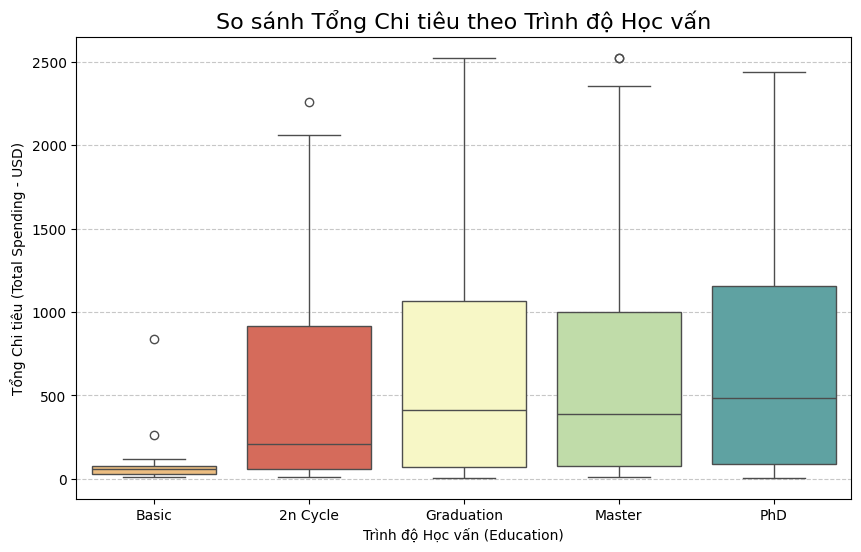

In [ ]:
# --- Sắp xếp các nhóm Học vấn theo một thứ tự logic ---
education_order = ['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD']

# --- Trực quan hóa bằng Biểu đồ Hộp (Box Plot) ---
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    x='Education',
    y='Total_Spending',
    palette='Spectral',
    hue='Education',
    order=education_order
)

plt.title('So sánh Tổng Chi tiêu theo Trình độ Học vấn', fontsize=16)
plt.xlabel('Trình độ Học vấn (Education)')
plt.ylabel('Tổng Chi tiêu (Total Spending - USD)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

=> NHẬN XÉT:
Biểu đồ hộp này đã xác nhận một xu hướng rất rõ ràng và logic: trình độ học vấn càng cao, mức chi tiêu càng có xu hướng tăng lên.

  * Xu hướng Tăng dần: Chúng ta có thể thấy một sự "leo thang" rõ rệt về mức chi tiêu. Nhóm Basic (Cơ bản) có mức chi tiêu trung vị (đường kẻ ngang) thấp nhất, gần như bằng 0. Mức chi tiêu tăng đáng kể ở nhóm 2n Cycle và tiếp tục tăng ở nhóm Graduation.

  * Nhóm Chi tiêu Cao nhất: Nhóm PhD (Tiến sĩ) nổi bật là nhóm có mức chi tiêu trung vị cao nhất một cách rõ rệt. Hai nhóm Graduation (Tốt nghiệp) và Master (Thạc sĩ) có hành vi chi tiêu khá tương đồng nhau và cùng ở mức cao.

  * Giải thích Logic: Xu hướng này hoàn toàn hợp lý. Trình độ học vấn cao thường tương quan thuận với Thu nhập (Income), và như chúng ta đã thấy ở mục C.1 và C.2.1.a, Thu nhập chính là động lực mạnh nhất thúc đẩy Chi tiêu.

Kết luận: Phân tích này bổ sung thêm một khía cạnh quan trọng cho chân dung khách hàng giá trị. Họ không chỉ có thu nhập cao mà còn có xu hướng sở hữu trình độ học vấn cao (từ Graduation trở lên). Điều này cho thấy các sản phẩm như Rượu vang rất phù hợp với một tệp khách hàng có tri thức và gu thưởng thức tinh tế.



---



#### *C.2.1.c. Phân tích Cơ cấu Chi tiêu (Sở thích Sản phẩm) theo Trình độ Học vấn (`Education`)*

Mục tiêu: Hiểu rõ "sở thích" của từng nhóm học vấn bằng cách xem xét tỷ lệ chi tiêu của họ cho từng danh mục sản phẩm.

Phương pháp: sử dụng Biểu đồ cột phần trăm xếp chồng (100% Stacked Bar Chart) để so sánh "cơ cấu" hoặc "tỷ lệ" chi tiêu.

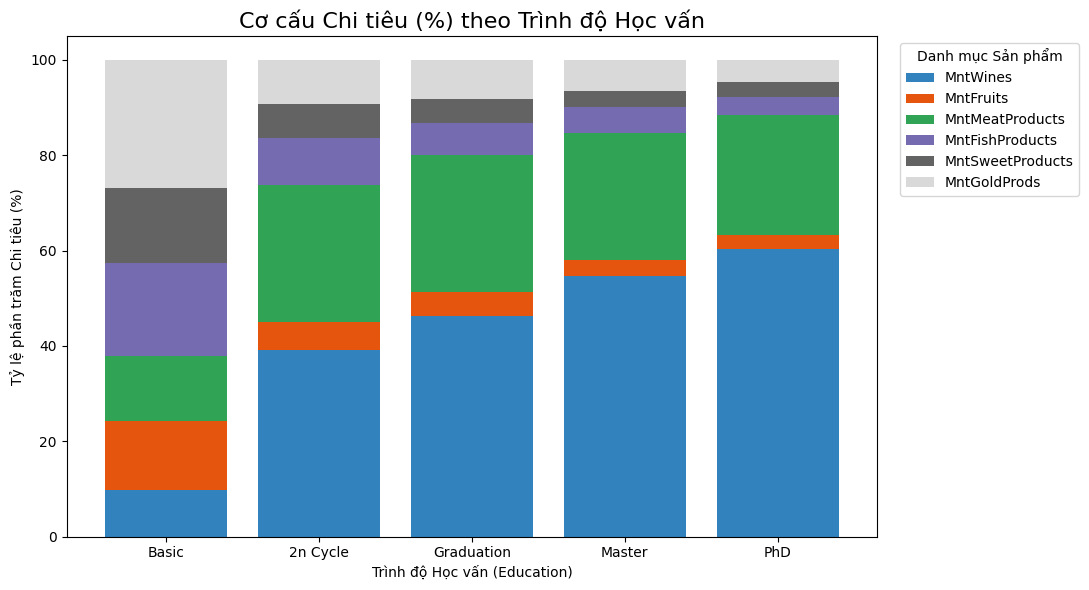

In [ ]:
# --- Bước 1: TỔNG HỢP DỮ LIỆU ---
# Nhóm các danh mục sản phẩm lại theo Education, và tính tổng cho mỗi nhóm
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                 'MntSweetProducts', 'MntGoldProds']
df_product_edu = df.groupby('Education', observed=True)[spending_cols].sum()

# Sắp xếp lại thứ tự cho logic
education_order = ['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD']
df_product_edu = df_product_edu.reindex(education_order)

# --- Bước 2: CHUYỂN DỮ LIỆU TỔNG HỢP SANG DẠNG PHẦN TRĂM (%) ---
# Tính tổng số chi tiêu cho mỗi nhóm sản phẩm (tổng mỗi hàng)
df_product_edu_total = df_product_edu.sum(axis=1)

# Chia mỗi hàng cho tổng của hàng đó để có tỷ lệ phần trăm cơ cấu
df_product_edu_pct = (df_product_edu.div(df_product_edu_total, axis=0))*100

# --- Bước 3: TRỰC QUAN HOÁ bằng Biểu đồ cột phần trăm xếp chồng ---
ax = df_product_edu_pct.plot(
    kind='bar',
    stacked=True,
    figsize=(11, 6),
    colormap='tab20c',
    width=0.8
)

plt.title('Cơ cấu Chi tiêu (%) theo Trình độ Học vấn', fontsize=16)
plt.xlabel('Trình độ Học vấn (Education)')
plt.ylabel('Tỷ lệ phần trăm Chi tiêu (%)')
plt.xticks(rotation=0)

# Đặt chú giải (legend) ra bên ngoài biểu đồ
plt.legend(title='Danh mục Sản phẩm', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

=> NHẬN XÉT: Biểu đồ này cho thấy sở thích sản phẩm khi trình độ học vấn tăng lên. Nó không chỉ cho thấy khách hàng chi bao nhiêu, mà còn cho thấy họ chi vào đâu.

  * Xu hướng "sành rượu":
    * Đây là xu hướng rõ ràng nhất. Tỷ lệ chi tiêu cho MntWines (Rượu vang - màu xanh dương) tăng dần đều theo trình độ học vấn.

    * Nó chỉ chiếm một phần nhỏ (~10%) trong cơ cấu chi tiêu của nhóm Basic, nhưng đã tăng vọt lên và chiếm đa số (khoảng 55-60%) trong cơ cấu chi tiêu của nhóm Master và PhD.

  * Insight "Ngược đời" của Nhóm Basic:
      * Nhóm Basic (có tổng chi tiêu rất thấp) lại dành một tỷ lệ phần trăm lớn nhất trong ngân sách của họ cho MntGoldProds (sản phẩm Cao cấp - xám nhạt) và MntSweetProducts (Đồ ngọt - xám đậm).
      
      * Tỷ lệ chi tiêu của họ cho các mặt hàng như MntFruits (Trái cây - cam), MntFishProducts (Cá - tím) cũng cao hơn đáng kể so với tất cả các nhóm còn lại.

  * Sự ổn định của Meat:

    * MntMeatProducts (Thịt - xanh lá) là một danh mục quan trọng, chiếm một tỷ lệ lớn và ổn định (khoảng 25-30%) trong cơ cấu chi tiêu của tất cả các nhóm từ 2n Cycle trở lên.

=> Kết luận:

Nhóm Học vấn Cao (Master, PhD): Không chỉ chi tiêu nhiều tiền hơn, mà họ còn ưu tiên chi tiêu một tỷ lệ khổng lồ trong ngân sách đó cho Rượu vang (MntWines).

Nhóm Basic: Mặc dù có tổng chi tiêu rất thấp. Cơ cấu chi tiêu của họ rất khác biệt, với tỷ lệ lớn dành cho các mặt hàng "tự thưởng" giá trị nhỏ như Đồ ngọt và một ít sản phẩm Cao cấp, thay vì các danh mục chi tiêu thường xuyên như Rượu hay Thịt.




---



### => TỔNG KẾT C.2.1: Sức mua & Sở thích (Ảnh hưởng từ Thu nhập và Học vấn)

**1. Về Sức mua (Họ chi bao nhiêu?):**

  * Thu nhập (`Income`) là động lực chính: Đây là yếu tố có ảnh hưởng mạnh mẽ và trực tiếp nhất. Biểu đồ phân tán (C.2.1.a) khẳng định rõ ràng: thu nhập càng cao, tổng chi tiêu càng lớn.

  * Học vấn (`Education`) là chỉ báo quan trọng: Biểu đồ hộp (C.2.1.b) xác nhận xu hướng này. Các nhóm có trình độ học vấn cao (Graduation, Master, PhD) có sức mua (trung vị chi tiêu) cao vượt trội so với các nhóm có trình độ học vấn thấp hơn.

**2. Về Sở thích (Họ chi vào đâu?):**
  * Phân tích cơ cấu chi tiêu (C.2.1.c) cho thấy sự khác biệt rõ rệt về "gu" của khách hàng:
    * Các nhóm có học vấn cao (Master, PhD) không chỉ chi nhiều tiền hơn, mà họ còn ưu tiên chi một tỷ lệ khổng lồ (trên 55%) trong ngân sách đó cho Rượu vang (MntWines).

    * Ngược lại, nhóm Basic (với tổng chi tiêu rất thấp) lại có cơ cấu chi tiêu hoàn toàn khác biệt, với tỷ lệ phần trăm ngân sách của họ dành cho các mặt hàng như Đồ ngọt (MntSweetProducts) và sản phẩm Cao cấp (MntGoldProds) lại cao hơn các nhóm khác.

=> Kết luận chung: Chúng ta có thể phác họa một chân dung sơ bộ: Khách hàng giá trị nhất là người *có thu nhập cao VÀ trình độ học vấn cao*.



---



### **C.2.2. Ảnh hưởng của Cấu trúc Gia đình: TÌnh trạng hôn nhân (`Martital_Status`) vs. Con cái (`Total_Children`)**
Mục tiêu: Giải quyết câu hỏi "Tình trạng hôn nhân và việc có con cái thay đổi thói quen chi tiêu ra sao?”


#### *C.2.2.a. Ảnh hưởng của tình trạng hôn nhân (`Marital_Status`) đến Tổng Chi tiêu (`Total_Spending`)*

Ở phần B, chúng ta đã biết lớn khách hàng đã có gia đình hoặc đang trong một mối quan hệ ("Partnered"), với số lượng gần gấp đôi so với nhóm khách hàng độc thân ("Single"). Ở phần C.2.2.a. này, chúng ta sẽ dùng biểu đồ hộp để so sánh Tổng chi tiêu giữa các nhóm trên với nhau.

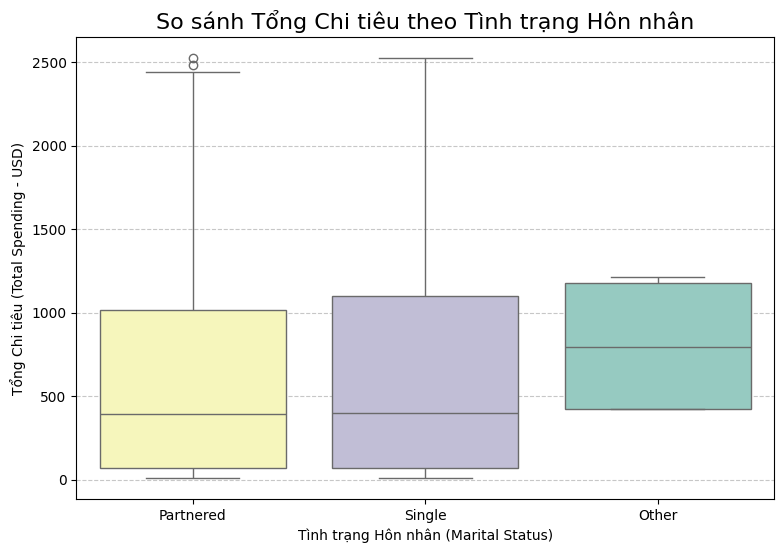

In [ ]:
# --- Trực quan hóa bằng Biểu đồ Hộp (Box Plot) ---
# Lấy thứ tự Sắp xếp các nhóm Marital_Status theo value_counts()
marital_order = df['Marital_Status'].value_counts().index

# Vẽ biểu đồ
plt.figure(figsize=(9, 6))
sns.boxplot(
    data=df,
    x='Marital_Status',
    y='Total_Spending',
    hue='Marital_Status',
    palette='Set3',
    order=marital_order
)

plt.title('So sánh Tổng Chi tiêu theo Tình trạng Hôn nhân', fontsize=16)
plt.xlabel('Tình trạng Hôn nhân (Marital Status)')
plt.ylabel('Tổng Chi tiêu (Total Spending - USD)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

=> NHẬN XÉT: Biểu đồ này cho thấy một insight quan trọng: Tình trạng Hôn nhân dường như không phải là một yếu tố ảnh hưởng lớn đến tổng chi tiêu của khách hàng.

  * Sự tương đồng: Chi tiêu không phụ thuộc nhiều vào tình trạng hôn nhân ở mức độ "điển hình": Hai nhóm khách hàng chính là "Partnered" và "Single" (chiếm 99.8% tổng số) có mức chi tiêu trung vị (mức chi tiêu phổ biến, đại diện) gần như y hệt nhau (khoảng 400 USD).

  * Nhóm "Other" không đáng kể: Mặc dù nhóm "Other" có mức chi tiêu trung bình cao vượt trội, số lượng của họ (0.2%) là quá nhỏ để có thể đưa ra bất kỳ kết luận kinh doanh quan trọng nào.

Kết luận: Không giống như `Income` (Thu nhập), `Marital_Status` (Tình trạng Hôn nhân) không phải là một yếu tố hữu ích để phân khúc khách hàng dựa trên sức mua hay tổng chi tiêu.



---



#### *C.2.2.b. Ảnh hưởng của việc có Con cái (Total_Children) đến Total_Spending (Tổng Chi tiêu)*

Biểu đồ nhiệt ở C.1 đã chỉ ra một mối tương quan nghịch đáng chú ý
(-0.50) giữa `Total_Children` và `Total_Spending`. Bây giờ, chúng ta sẽ dùng Biểu đồ Cột để so sánh trực tiếp mức chi tiêu trung bình của các nhóm khách hàng dựa trên tổng số con họ có (0, 1, 2, hoặc 3).

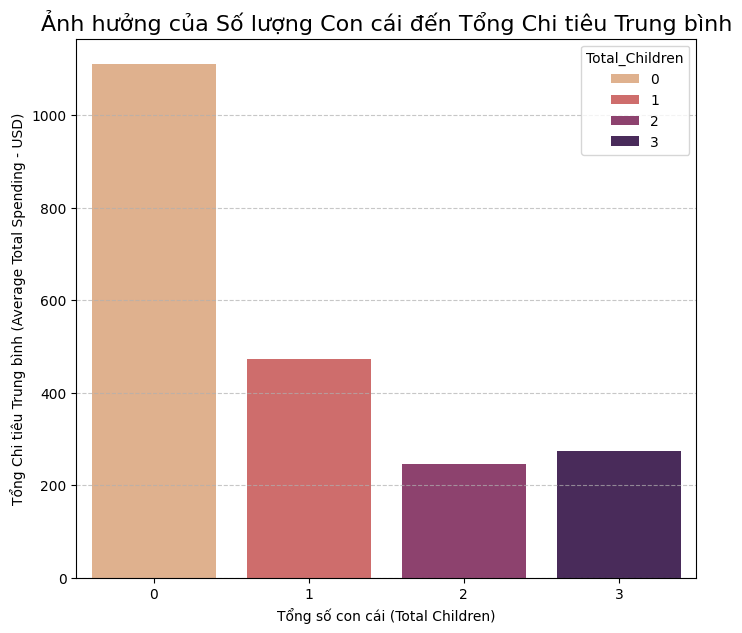

In [ ]:
# --- Trực quan hóa ảnh hưởng của Tổng số con đến Tổng Chi tiêu ---

# Tổng hợp dữ liệu: nhóm khách hàng theo 'Total_Children', sau đó để tính toán 'Total_Spending' trung bình (mean) cho mỗi nhóm.
avg_spending_by_children = df.groupby('Total_Children', observed=True).agg(
    Avg_Total_Spending=('Total_Spending', 'mean')
).reset_index()

# Vẽ biểu cột để trực quan hoá so sánh giá trị TRUNG BÌNH của Total_Spending cho mỗi nhóm Total_Children.
plt.figure(figsize=(8, 7))
sns.barplot(
    data=avg_spending_by_children,
    x='Total_Children',
    y='Avg_Total_Spending',
    hue = 'Total_Children',
    palette='flare',
)

plt.title('Ảnh hưởng của Số lượng Con cái đến Tổng Chi tiêu Trung bình', fontsize=16)
plt.xlabel('Tổng số con cái (Total Children)')
plt.ylabel('Tổng Chi tiêu Trung bình (Average Total Spending - USD)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

=> NHẬN XÉT:

  * Xác nhận Xu hướng Rõ rệt: Biểu đồ cột cho thấy một xu hướng giảm dần rất rõ ràng. Khách hàng không có con (0) có mức chi tiêu trung bình cao nhất, vượt trội hơn hẳn.

  * Tác động của Con cái: Mức chi tiêu trung bình giảm đáng kể ngay khi khách hàng có 1 con, và tiếp tục giảm khi họ có 2 hoặc 3 con.

Như vậy, phân tích này xác nhận mạnh mẽ insight từ biểu đồ nhiệt: việc có con cái là một yếu tố đáng kể làm giảm sức chi tiêu của khách hàng. Điều này hoàn toàn hợp lý trong thực tế, vì các bậc cha mẹ có thể phải thay đổi ưu tiên tài chính khi có con cái.



---



### *C.2.2.c. Phân tích Cơ cấu Chi tiêu (Sở thích Sản phẩm) theo Total_Children*

Mục tiêu: Hiểu rõ "sở thích" của nhóm có con bằng cách xem xét tỷ lệ chi tiêu của họ cho từng danh mục sản phẩm.

Phương pháp: Chúng ta sẽ sử dụng Biểu đồ cột phần trăm xếp chồng (100% Stacked Bar Chart). Biểu đồ này sẽ cho thấy "miếng bánh" chi tiêu của nhóm không có con trông như thế nào so với nhóm có con.

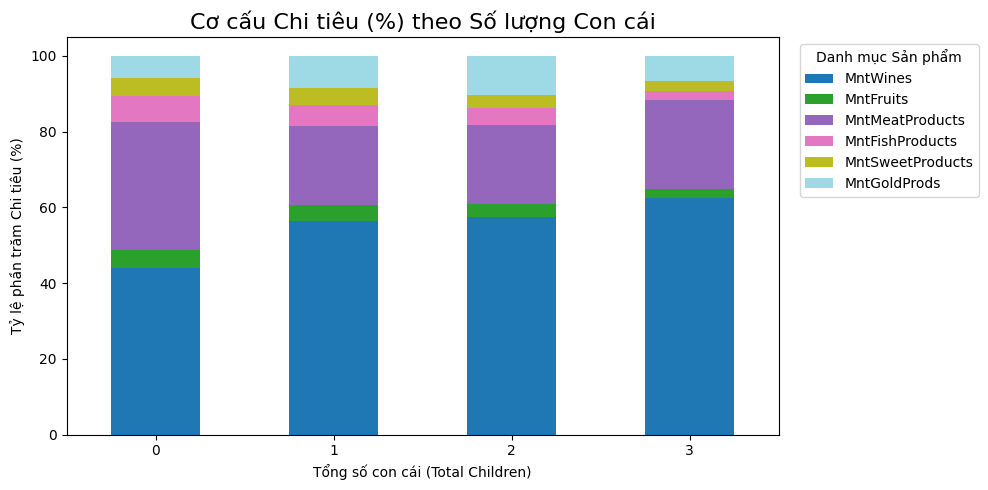

In [ ]:
# --- Bước 1: TỔNG HỢP DỮ LIỆU ---
# Nhóm các danh mục sản phẩm lại theo 'Total_Children`, và tỉnh tổng chi tiêu của từng danh mục cho mỗi nhóm
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df_product_children = df.groupby('Total_Children', observed=True)[spending_cols].sum()

# --- Bước 2: CHUYỂN DỮ LIỆU TỔNG HỢP SANG DẠNG PHẦN TRĂM (%) ---
# Tính tổng số chi tiêu cho mỗi nhóm sản phẩm (tổng mỗi hàng)
df_product_children_total = df_product_children.sum(axis=1)

# Chia mỗi hàng cho tổng của hàng đó để có tỷ lệ phần trăm cơ cấu
df_product_children_pct = (df_product_children.div(df_product_children_total, axis=0))*100

# --- Bước 3: Trực quan hóa ---
ax = df_product_children_pct.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 5),
    colormap='tab20'
)

plt.title('Cơ cấu Chi tiêu (%) theo Số lượng Con cái', fontsize=16)
plt.xlabel('Tổng số con cái (Total Children)')
plt.ylabel('Tỷ lệ phần trăm Chi tiêu (%)')
plt.xticks(rotation=0)

# Đặt chú giải (legend) ra bên ngoài biểu đồ
plt.legend(title='Danh mục Sản phẩm', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

=> NHẬN XÉT:

Biểu đồ cho thấy một sự thay đổi ngân sách ngay khi **khách hàng có đứa con đầu tiên**:

  * Cắt giảm mạnh chi tiêu cho Thịt: Thay đổi lớn nhất và rõ ràng nhất là ở danh mục MntMeatProducts (Thịt - màu hồng). Tỷ lệ chi tiêu cho thịt giảm mạnh, từ chỗ chiếm ~32% ngân sách của nhóm không con, xuống chỉ còn ~20-22% ở tất cả các nhóm có con.

  * Tăng ưu tiên cho Rượu vang: Một cách đáng ngạc nhiên, MntWines (Rượu vang - xanh dương) lại tăng lên về tỷ trọng. Nó chiếm ~45% ngân sách của nhóm không con, nhưng tăng lên và chiếm đa số (từ ~57% đến ~62%) trong ngân sách của các nhóm có con.

  * Các danh mục khác ổn định: Các danh mục còn lại (Fruits, Fish, Sweets, Gold) chiếm một tỷ lệ phần trăm rất ổn định trong cơ cấu chi tiêu, bất kể số lượng con cái.

Kết luận: Insight này rất quan trọng. Mặc dù chúng ta biết khách hàng có con chi tiêu tổng thể ít hơn (từ mục C.2.2.a), biểu đồ này cho thấy họ không cắt giảm đều. Họ ưu tiên cắt giảm mạnh chi tiêu cho Thịt, trong khi Rượu vang vẫn là một danh mục được ưu tiên (thậm chí còn chiếm tỷ trọng lớn hơn) trong giỏ hàng (nay đã thu hẹp) của họ.



---



### => TỔNG KẾT C.2.2: Ảnh hưởng của Gia đình & Con cái
Phân tích C.2.2 đã cho chúng ta một insight cực kỳ rõ ràng:
  * `Marital_Status` (Tình trạng Hôn nhân) không phải là Yếu tố Quan trọng: Ngược lại, tình trạng hôn nhân không tạo ra sự khác biệt lớn nào về sức mua hay tổng chi tiêu.

  * `Total_Children` (Con cái) là Yếu tố Cốt lõi: Việc có con cái là một yếu tố ảnh hưởng rất mạnh mẽ đến hành vi khách hàng.

      * Về Sức mua: Nó làm giảm mạnh tổng chi tiêu trung bình.

      * Về Thói quen: Nó thay đổi cơ cấu chi tiêu. Khi có con, khách hàng cắt giảm mạnh tỷ lệ chi tiêu cho Thịt, trong khi Rượu vang vẫn là một danh mục được ưu tiên về tỷ trọng.

Kết luận: Khi phân khúc khách hàng, việc họ có con hay không là một yếu tố quan trọng hơn nhiều so với việc họ đã kết hôn hay còn độc thân.



---



### **C.2.3. Hiệu quả các Kênh bán hàng theo Phân khúc (Channel Performance by Segment)** ###

Mục tiêu: Ở Phần B, chúng ta đã biết Store (Cửa hàng) là kênh bán hàng chủ lực. Giờ đây, chúng ta muốn tìm hiểu sâu hơn: Các nhóm khách hàng khác nhau (theo Tuổi và Thu nhập) có sở thích mua sắm qua các kênh khác nhau không?


Ví dụ: Liệu khách hàng trẻ có mua qua Web nhiều hơn không? Khách hàng thu nhập cao có thích mua qua Catalog không?


#### **Phân tích theo Nhóm Tuổi (Age_Group)**

Phương pháp: Chúng ta sẽ sử dụng Biểu đồ cột phần trăm xếp chồng (100% Stacked Bar Chart). Biểu đồ này sẽ cho thấy tỷ lệ đóng góp của mỗi kênh (Store, Web, Catalog, Deals) trong tổng số giao dịch của mỗi nhóm khách hàng.

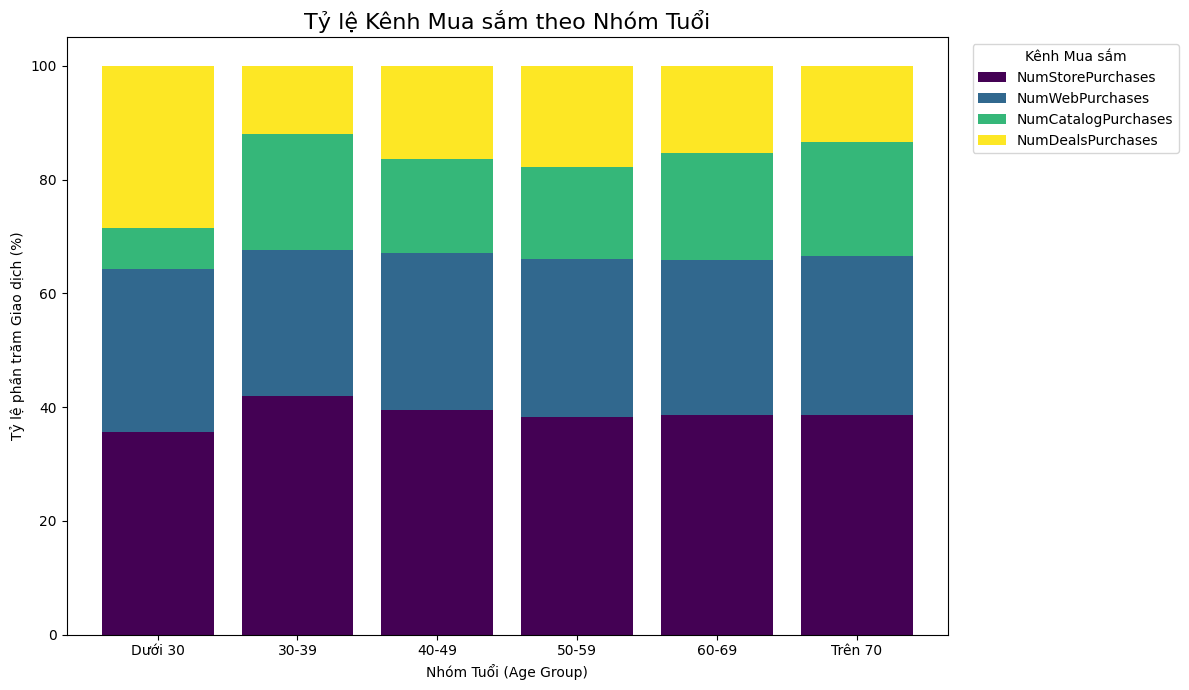

In [ ]:
# --- Bước 1: Tổng hợp dữ liệu ---
# Tính tổng số giao dịch cho mỗi kênh, sau đó nhóm theo 'Age_Group'
channels = ['NumStorePurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumDealsPurchases']
df_channel_age = df.groupby('Age_Group', observed=True)[channels].sum()

# --- Bước 2: Chuyển đổi sang dạng phần trăm ---
# Tính tổng số giao dịch cho mỗi nhóm tuổi (tổng của mỗi hàng)
tong_moi_hang = df_channel_age.sum(axis=1)
# Chia mỗi hàng cho tổng của hàng đó để có tỷ lệ phần trăm
df_channel_age_pct = (df_channel_age.div(tong_moi_hang, axis=0)) * 100

# --- Bước 3: Trực quan hóa bằng Biểu đồ cột phần trăm xếp chồng ---
ax = df_channel_age_pct.plot(
    kind='bar',
    stacked=True,
    figsize= (12, 7),
    colormap='viridis',
    width=0.8
)

plt.title('Tỷ lệ Kênh Mua sắm theo Nhóm Tuổi', fontsize=16)
plt.xlabel('Nhóm Tuổi (Age Group)')
plt.ylabel('Tỷ lệ phần trăm Giao dịch (%)')
plt.xticks(rotation=0)

# Đặt chú giải (legend) ra bên ngoài biểu đồ cho gọn gàng
plt.legend(title='Kênh Mua sắm', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

=> NHẬN XÉT: Biểu đồ cho thấy hai phát hiện quan trọng:

  * 1. Sự Ổn định của Nhóm Cốt lõi: Đối với tệp khách hàng chính (từ 30 tuổi trở lên), cơ cấu kênh mua sắm là rất ổn định và nhất quán. Tất cả các nhóm này đều cho thấy sự cân bằng giữa 4 kênh, trong đó Store (Cửa hàng) và Web luôn là hai kênh chủ đạo.

  * 2. Sự Khác biệt của Nhóm Trẻ (dưới 30 tuổi): Nhóm Dưới 30 là một ngoại lệ, với hành vi khác biệt:
    * Họ có thể thường săn Ưu đãi khi kênh Deals (Ưu đãi) (màu vàng) chiếm tỷ trọng lớn nhất.
    * Họ gần như bỏ qua hoàn toàn kênh truyền thống là Catalog (màu xanh lá).

Kết luận: Công ty có thể áp dụng một chiến lược marketing đa kênh nhất quán cho đại đa số khách hàng (từ 30 tuổi trở lên). Tuy nhiên, để tiếp cận hiệu quả nhóm khách hàng trẻ Dưới 30, chiến lược marketing bắt buộc phải tập trung vào các chương trình ưu đãi (Deals) và ưu tiên các kênh kỹ thuật số, thay vì các kênh truyền thống như Catalog.



---



#### **Phân tích theo Nhóm Thu nhập (Income_Group)**

Mục tiêu: Sau khi phân tích theo tuổi, chúng ta tiếp tục phân tích theo thu nhập để trả lời câu hỏi: "Sở thích kênh mua sắm có thay đổi dựa trên sức mua và độ nhạy cảm về giá không?"

Phương pháp: Tương tự, chúng ta sử dụng Biểu đồ cột phần trăm xếp chồng (100% Stacked Bar Chart) để xem tỷ lệ đóng góp của mỗi kênh trong tổng số giao dịch của mỗi nhóm thu nhập.

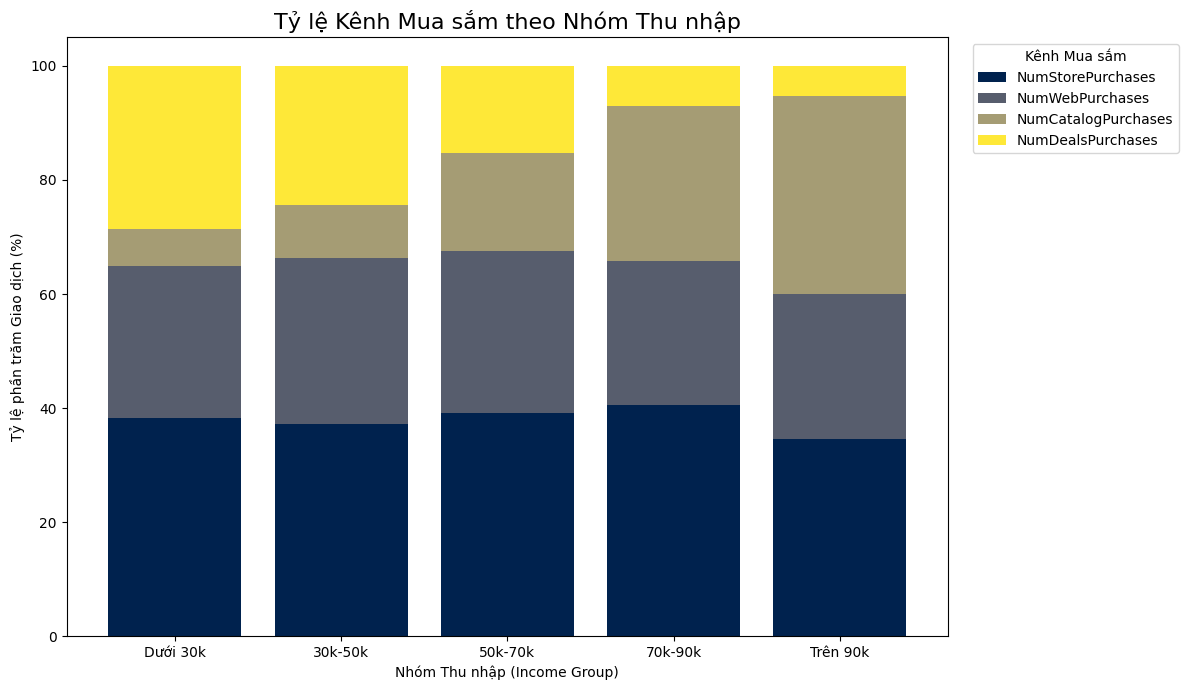

In [ ]:
# --- Bước 1: Chuẩn bị dữ liệu ---
# Chúng ta tính tổng số giao dịch cho mỗi kênh, sau đó nhóm theo 'Income_Group'
channels = ['NumStorePurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumDealsPurchases']
df_channel_income = df.groupby('Income_Group', observed=True)[channels].sum()

# --- Bước 2: Chuyển đổi sang dạng phần trăm ---
# Tính tổng số giao dịch cho mỗi nhóm Thu nhập (tổng mỗi hàng)
df_channel_income_total = df_channel_income.sum(axis=1)
# Chia mỗi hàng cho tổng của hàng đó để có tỷ lệ phần trăm
df_channel_income_pct = (df_channel_income.div(df_channel_income_total, axis=0)) * 100


# --- Bước 3: Trực quan hóa bằng Biểu đồ cột phần trăm xếp chồng ---
ax = df_channel_income_pct.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 7),
    colormap='cividis', # Sử dụng bảng màu 'cividis'
    width=0.8
)

plt.title('Tỷ lệ Kênh Mua sắm theo Nhóm Thu nhập', fontsize=16)
plt.xlabel('Nhóm Thu nhập (Income Group)')
plt.ylabel('Tỷ lệ phần trăm Giao dịch (%)')
plt.xticks(rotation=0) # Giữ nhãn trục X nằm ngang

# Đặt chú giải (legend) ra bên ngoài biểu đồ cho gọn gàng
plt.legend(title='Kênh Mua sắm', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

=> NHẬN XÉT: Biểu đồ này cho thấy một sự phân hóa rất rõ rệt về sở thích kênh mua sắm, phụ thuộc trực tiếp vào thu nhập và độ nhạy cảm về giá của khách hàng.

  * Kênh Deals (Ưu đãi - Vàng): Đây là kênh của nhóm thu nhập thấp. Nó chiếm một tỷ trọng khổng lồ ở nhóm Dưới 30k nhưng giảm dần đều khi thu nhập tăng lên. Điều này cho thấy nhóm thu nhập thấp rất nhạy cảm về giá và bị thu hút mạnh bởi các chương trình ưu đãi.

  * Kênh Catalog (Xám-ô liu): Đây là kênh của nhóm thu nhập cao. Tỷ lệ của kênh này gần như bằng 0 ở nhóm thu nhập thấp, nhưng tăng trưởng đều đặn theo thu nhập và trở thành một kênh mua sắm chính (chiếm ~30%) của nhóm Trên 90k.

  * Kênh Store & Web (Xanh đậm & Xanh xám): Đây là hai kênh "xương sống", có tỷ lệ sử dụng rất ổn định ở tất cả các nhóm thu nhập. Chúng là nền tảng bán hàng cốt lõi, tiếp cận được mọi phân khúc.



---



### =>  TỔNG KẾT C.2.3: Kết quả phân tích cho thấy một chiến lược đa kênh rất rõ ràng, nơi các kênh cốt lõi và các kênh chuyên biệt phục vụ những mục đích khác nhau.

  * **Kênh Cốt lõi (Store & Web)**: Hai kênh Cửa hàng và Web là "xương sống" của doanh nghiệp, hoạt động hiệu quả và nhất quán trên gần như tất cả các nhóm tuổi và thu nhập.

  * **Kênh Chuyên biệt (Deals & Catalog)**: Ngược lại, hai kênh này lại được phân khúc cực kỳ rõ rệt:

    * *Kênh Deals (Ưu đãi)*: Là kênh của sự nhạy cảm về giá. Nó được ưa chuộng áp đảo bởi hai nhóm: khách hàng Dưới 30 tuổi (có thể do thói quen) và khách hàng có Thu nhập thấp (Dưới 30k).

    * *Kênh Catalog*: Là kênh của sức mua. Nó gần như bị bỏ qua bởi nhóm thu nhập thấp nhưng lại được nhóm Thu nhập cao (Trên 90k) sử dụng rất hiệu quả.

Kết luận: Chiến lược đa kênh của công ty rất đúng đắn. Trong khi Store và Web là nền tảng chung, thì Deals và Catalog phải được sử dụng như những công cụ marketing có mục tiêu (targeting) chính xác để tiếp cận các phân khúc khách hàng rất cụ thể.



---



### **C.2.4. Hiệu quả Marketing theo Phân khúc (Marketing Effectiveness by Segment)**

Mục tiêu: Ở Phần B, chúng ta đã thấy Chiến dịch Gần nhất (Response) là một thành công lớn, với tổng tỷ lệ phản hồi đáng kể (ví dụ: ~15%).

Bây giờ, chúng ta muốn biết: "Ai là người đã phản hồi?" Nhóm khách hàng nào (theo Thu nhập và Tuổi tác) có tỷ lệ phản hồi cao nhất?

Phương pháp: Chúng ta sẽ tính tỷ lệ phản hồi (Conversion Rate) cho từng nhóm và trực quan hóa bằng Biểu đồ cột (Bar Plot) để so' sánh.

#### **Phân tích theo Nhóm Thu nhập (Income_Group)**
 Mục tiêu: Xem nhóm thu nhập nào phản hồi tốt nhất với chiến dịch.

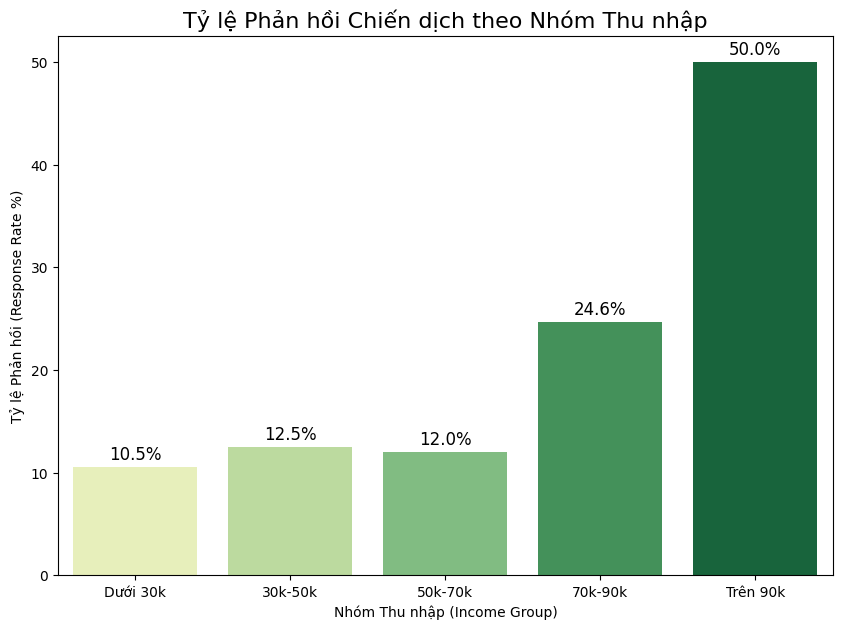

In [ ]:
# Bước 1: Tính tỷ lệ phản hồi (%) cho mỗi Nhóm Thu nhập
# Chúng ta nhóm theo 'Income_Group', tính trung bình của cột 'Response' (giá trị 1 = có, 0 = không)
# Sau đó nhân 100 để có tỷ lệ %.
income_response_rate = df.groupby('Income_Group', observed=True)['Response'].mean() * 100
income_response_rate = income_response_rate.sort_values(ascending=False)

# Bước 2: Trực quan hóa
plt.figure(figsize=(10, 7))
ax = sns.barplot(
    x = income_response_rate.index,
    y = income_response_rate.values,
    hue = income_response_rate.index,
    palette='YlGn' # Bảng màu Vàng-Xanh
)

# Thêm nhãn % lên trên cột
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', # Định dạng số %
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points',
                fontsize=12)

plt.title('Tỷ lệ Phản hồi Chiến dịch theo Nhóm Thu nhập', fontsize=16)
plt.xlabel('Nhóm Thu nhập (Income Group)')
plt.ylabel('Tỷ lệ Phản hồi (Response Rate %)')
plt.show()

=> NHẬN XÉT: Biểu đồ này cho thấy một xu hướng tuyến tính rất mạnh mẽ và rõ ràng:

  * Thu nhập càng cao, tỷ lệ phản hồi càng tăng.

  * Tỷ lệ phản hồi ở mức thấp (10-12%) đối với các nhóm thu nhập dưới 70,000 USD, sau đó tăng vọt lên 24.6% ở nhóm 70,000-90,000 USD và đạt mức cao nhất là 50.0% ở nhóm Trên 90,000 USD.

Kết luận, chiến dịch mới nhất cũng rất thành công trong việc nhắm đến nhóm khách hàng có thu nhập cao và sức mua lớn.

#### **Phân tích theo Nhóm Tuổi (Age_Group)**
Mục tiêu: Xem nhóm tuổi nào phản hồi tốt nhất.

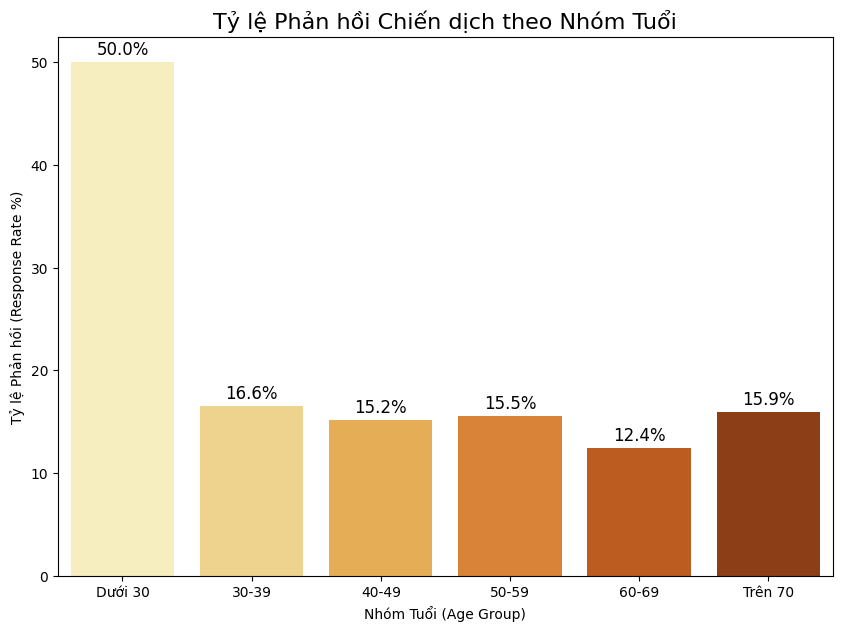

In [ ]:
# Bước 1: Tính tỷ lệ phản hồi (%) cho mỗi Nhóm Tuổi
age_response_rate = df.groupby('Age_Group', observed=True)['Response'].mean() * 100
age_response_rate = age_response_rate.sort_values(ascending=False)

# Bước 2: Trực quan hóa
plt.figure(figsize=(10, 7))
ax_age = sns.barplot(
    x=age_response_rate.index,
    y=age_response_rate.values,
    hue=age_response_rate.index,
    palette='YlOrBr' # Bảng màu Vàng-Cam-Nâu
)

# Thêm nhãn % lên trên cột
for p in ax_age.patches:
    ax_age.annotate(f'{p.get_height():.1f}%', # Định dạng số %
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points',
                fontsize=12)

plt.title('Tỷ lệ Phản hồi Chiến dịch theo Nhóm Tuổi', fontsize=16)
plt.xlabel('Nhóm Tuổi (Age Group)')
plt.ylabel('Tỷ lệ Phản hồi (Response Rate %)')
plt.show()

=> NHẬN XÉT: Biểu đồ này cho thấy một kết quả rất rõ rệt

  * Nhóm Dưới 30 có tỷ lệ phản hồi cao vượt trội (50.0%), cao gấp 3 lần so với mức trung bình của các nhóm khác.

  * Tất cả các nhóm tuổi còn lại (từ 30 trở lên) đều có tỷ lệ phản hồi khá ổn định và thấp hơn nhiều, dao động trong khoảng 12% - 17%.

Như vậy, chiến dịch mới nhất đã cực kỳ thành công trong việc thu hút sự chú ý của nhóm khách hàng trẻ tuổi nhất.



---



#### => TỔNG KẾT C.2.4: Kết hợp cả hai phân tích, chúng ta xác định được hai phân khúc "vàng" đã phản hồi tốt nhất với chiến dịch marketing mới nhất, nhưng có thể vì những lý do rất khác nhau:

  * Nhóm Trên 90,000 USD (Thu nhập cao): Họ phản hồi tốt, có thể vì sản phẩm/ưu đãi trong chiến dịch phù hợp với sức mua và phong cách sống cao cấp của họ.

  * Nhóm Dưới 30 tuổi (Tuổi trẻ): Họ cũng phản hồi cực kỳ tốt (50%). Kết hợp với phân tích ở C.2.3, có khả năng cao là chiến dịch này đã đánh trúng tâm lý "săn ưu đãi" (Deals) của họ.

Kết luận: Điều này cung cấp một insight cực kỳ giá trị để nhắm mục tiêu (targeting) cho các chiến dịch tương lai: một thông điệp cho nhóm "giá trị cao" và một thông điệp cho nhóm "nhạy cảm về giá".



---



### ✅ **TỔNG KẾT PHẦN C.2**. PHÂN TÍCH MỐI QUAN HỆ CHUYÊN SÂU (DEEP DIVE ANALYSIST)

Phần C.2 đã đi sâu vào việc "kết nối các điểm dữ liệu", giúp chúng ta hiểu rõ hơn các yếu tố nhân khẩu học ảnh hưởng đến hành vi của khách hàng như thế nào.

  * **Động lực chính & Yếu tố Cản trở**: Phân tích xác nhận Thu nhập (`Income`) là động lực mạnh mẽ nhất thúc đẩy cả sức mua lẫn tần suất mua sắm. Ngược lại, việc Có con (`Total_Children`) là yếu tố cản trở rõ rệt nhất, làm giảm tổng chi tiêu và thay đổi cơ cấu mua sắm (ưu tiên cắt giảm Thịt). Tình trạng hôn nhân không phải là yếu tố phân biệt lớn.

  * **Học vấn & Sở thích**: Trình độ học vấn cao không chỉ đi liền với sức mua lớn hơn mà còn thể hiện một sở thích rõ rệt đối với các sản phẩm như Rượu vang (Wines).

  * **Chiến lược Kênh Bán hàng**: Mặc dù `Store` và `Web` là kênh cốt lõi cho đa số, sở thích kênh lại phân hóa rõ rệt theo thu nhập và tuổi tác: `Catalog` là kênh cao cấp hiệu quả với nhóm thu nhập cao, trong khi `Deals` lại thu hút mạnh mẽ nhóm thu nhập thấp và dưới 30 tuổi.

  * **Hiệu quả Marketing**: Phân tích chiến dịch gần nhất (`Response`) cho thấy nó đã thành công đặc biệt với hai nhóm rất khác biệt: nhóm thu nhập cao (> 90,000 USD) và nhóm tuổi trẻ (< 30 tuổi), cung cấp insight quan trọng cho việc nhắm mục tiêu trong tương lai.

Tóm lại: Phần C.2 đã giúp chúng ta hiểu rõ các "đòn bẩy" chính ảnh hưởng đến hành vi khách hàng (Thu nhập, Con cái) và cách các yếu tố khác (Học vấn, Tuổi) tạo ra những sở thích và phản ứng khác biệt với kênh bán hàng và marketing. Điều này tạo tiền đề vững chắc cho việc xây dựng các phân khúc chiến lược ở Phần C.3.



---



## **C.3. PHÂN KHÚC KHÁCH HÀNG CHIẾN LƯỢC (RFM ANALYSIS)**

### Mục tiêu

Đây là bước cuối cùng và mang lại giá trị cao nhất của toàn bộ phần Phân tích Khám phá.

Ở các phần trước (C.1, C.2), chúng ta đã phân tích các biến số một cách riêng lẻ (ví dụ: `Income` ảnh hưởng `Total_Spending`, `Age_Group` ảnh hưởng `Response`). Bây giờ, chúng ta sẽ **tổng hợp 3 yếu tố hành vi quan trọng nhất** lại với nhau để phân loại *từng khách hàng* vào các nhóm chiến lược cụ thể.

Mục tiêu là trả lời dứt điểm các câu hỏi kinh doanh cốt lõi:
* **"Khách hàng VIP" (Champions) của chúng ta là ai?**
* **"Khách hàng Trung thành" (Loyal Customers) là ai?**
* **Ai là "Khách hàng có nguy cơ rời bỏ" (At Risk)?**
* **Ai là "Khách hàng mới tiềm năng" (New Customers)?**

Việc này sẽ cung cấp một "bản đồ khách hàng" rõ ràng để đưa ra các chiến lược marketing nhắm mục tiêu cực kỳ hiệu quả.

---

### Phương pháp: Mô hình RFM

Chúng ta sẽ sử dụng mô hình **RFM (Recency, Frequency, Monetary)**, một kỹ thuật phổ biến trong marketing để phân khúc khách hàng dựa trên 3 trụ cột hành vi:

1.  **R - Recency (Độ mới):** Khách hàng mua hàng lần cuối cách đây bao lâu?
    * *Cột dữ liệu:* `Recency`
    * *Ý nghĩa:* `Recency` càng thấp (càng gần đây) càng tốt.

2.  **F - Frequency (Tần suất):** Khách hàng đã mua hàng bao nhiêu lần?
    * *Cột dữ liệu:* `Total_NumberOfPurchases`
    * *Ý nghĩa:* `Frequency` càng cao càng tốt.

3.  **M - Monetary (Giá trị):** Khách hàng đã chi tiêu tổng cộng bao nhiêu tiền?
    * *Cột dữ liệu:* `Total_Spending`
    * *Ý nghĩa:* `Monetary` càng cao càng tốt.

---

### Các bước thực hiện

Quy trình của chúng ta sẽ bao gồm các bước rõ ràng sau:

1.  **Chấm điểm RFM (Scoring):**
    * Chúng ta sẽ sử dụng **Tứ phân vị (Quartiles)** để chia tất cả khách hàng thành 4 nhóm (từ 1 đến 4) cho mỗi yếu tố R, F, và M.
    * **Logic chấm điểm (Rất quan trọng):**
        * **F và M:** Điểm cao là tốt. Khách hàng chi tiêu nhiều nhất (top 25%) sẽ được 4 điểm, chi tiêu ít nhất (bottom 25%) được 1 điểm.
        * **R:** Điểm thấp là tốt. Khách hàng mua hàng gần đây nhất (top 25% có `Recency` thấp nhất) sẽ được **4 điểm**, trong khi khách hàng đã lâu không mua (bottom 25% có `Recency` cao nhất) sẽ được **1 điểm**.

2.  **Tạo Phân khúc (Segmentation):**
    * Sau khi chấm điểm, mỗi khách hàng sẽ có một bộ 3 điểm, ví dụ: R=4, F=4, M=4.
    * Chúng ta sẽ kết hợp các điểm số này (ví dụ: "444") và ánh xạ chúng vào các **phân khúc có ý nghĩa kinh doanh** (ví dụ: "444" -> "Champions", "144" -> "At Risk", v.v.).

3.  **Trực quan hóa & Phân tích Phân khúc:**
    * Cuối cùng, chúng ta sẽ trực quan hóa quy mô của từng phân khúc và phân tích đặc điểm nhân khẩu học của các nhóm quan trọng nhất (ví dụ: "Champions" và "At Risk").



---



### **C.3.1. Chấm điểm RFM (RFM Scoring)**
Mục tiêu: Ở bước đầu tiên này, chúng ta sẽ chấm điểm cho từng khách hàng dựa trên 3 yếu tố R, F, M. Chúng ta sẽ dùng Tứ phân vị (Quartiles) để chia khách hàng thành 4 nhóm (từ 1 đến 4) cho mỗi yếu tố.

Logic chấm điểm:

  * F (Tần suất) & M (Giá trị): Điểm cao là tốt. Ví dụ: Top 25% F/M cao nhất -> 4 điểm.

  * R (Độ mới): Điểm thấp là tốt. Ví dụ: Top 25% R thấp nhất (mua gần đây nhất) -> 4 điểm.

In [ ]:
# --- Bước 1: Chuẩn bị Dữ liệu cho RFM ---
# Lấy các cột cần thiết từ DataFrame chính
df_rfm = df[['ID', 'Recency', 'Total_NumberOfPurchases', 'Total_Spending']].copy()

# Đổi tên cột cho ngắn gọn và theo chuẩn RFM
df_rfm.rename(columns={
    'Total_NumberOfPurchases': 'Frequency',
    'Total_Spending': 'Monetary'
}, inplace=True)

print("Dữ liệu RFM ban đầu (5 dòng đầu):")
df_rfm.head()

Dữ liệu RFM ban đầu (5 dòng đầu):


,ID,Recency,Frequency,Monetary
0,1826,0,15,1190
1,1,0,18,577
2,10476,0,11,251
3,1386,0,4,11
4,5371,0,8,91


In [ ]:

# --- Bước 2: Chấm điểm (Scoring) ---

# Chúng ta sẽ dùng pd.qcut kết hợp với .rank(method='first')
# Đây là phương pháp CHUẨN và AN TOÀN nhất để chia tứ phân vị,
# nó đảm bảo chia đều 25% cho mỗi nhóm ngay cả khi dữ liệu bị lệch
# hoặc có nhiều giá trị trùng nhau (ví dụ: nhiều người cùng có 1 Frequency).

# Chấm điểm R (Recency): Thấp hơn là tốt hơn (nhãn [4, 3, 2, 1])
df_rfm['R_Score'] = pd.qcut(df_rfm['Recency'].rank(method='first'), q=4, labels=[4, 3, 2, 1]).astype(int)

# Chấm điểm F (Frequency): Cao hơn là tốt hơn (nhãn [1, 2, 3, 4])
df_rfm['F_Score'] = pd.qcut(df_rfm['Frequency'].rank(method='first'), q=4, labels=[1, 2, 3, 4]).astype(int)

# Chấm điểm M (Monetary): Cao hơn là tốt hơn (nhãn [1, 2, 3, 4])
df_rfm['M_Score'] = pd.qcut(df_rfm['Monetary'].rank(method='first'), q=4, labels=[1, 2, 3, 4]).astype(int)


# --- Bước 3: Tạo Điểm RFM tổng hợp (RFM Score) ---
# Kết hợp 3 điểm số lại thành một chuỗi (ví dụ: '444' hoặc '123')
# Chúng ta chuyển các điểm số sang kiểu string trước khi cộng
df_rfm['RFM_Score'] = df_rfm['R_Score'].astype(str) + \
                      df_rfm['F_Score'].astype(str) + \
                      df_rfm['M_Score'].astype(str)

# --- Bước 4: Kiểm tra kết quả ---
print("\nKết quả sau khi chấm điểm (5 dòng đầu):")
df_rfm.head()



Kết quả sau khi chấm điểm (5 dòng đầu):


,ID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,1826,0,15,1190,4,2,4,424
1,1,0,18,577,4,3,3,433
2,10476,0,11,251,4,2,2,422
3,1386,0,4,11,4,1,1,411
4,5371,0,8,91,4,1,2,412


In [ ]:
# In ra 10 dòng đầu tiên của DataFrame với các giá trị RFM gốc và điểm số tương ứng.
df_rfm[['Recency', 'R_Score', 'Frequency', 'F_Score', 'Monetary', 'M_Score']].head(10)

,Recency,R_Score,Frequency,F_Score,Monetary,M_Score
0,0,4,15,2,1190,4
1,0,4,18,3,577,3
2,0,4,11,2,251,2
3,0,4,4,1,11,1
4,0,4,8,1,91,2
5,0,4,17,3,1192,4
6,0,4,28,4,1215,4
7,0,4,7,1,96,2
8,0,4,20,3,544,3
9,0,4,20,3,544,3


In [ ]:
# Kiểm tra sự phân bổ của điểm R_Score bằng cách xem xét giá trị min/max/count của Recency trong mỗi nhóm điểm.
df_rfm.groupby('R_Score')['Recency'].agg(['min', 'max', 'count'])

,min,max,count
R_Score,,,
1,74,99,558
2,49,74,558
3,24,49,558
4,0,24,559


In [ ]:
# Kiểm tra sự phân bổ của điểm F_Score bằng cách xem xét giá trị min/max/count của Frequency trong mỗi nhóm điểm.
df_rfm.groupby('F_Score')['Frequency'].agg(['min', 'max', 'count'])

,min,max,count
F_Score,,,
1,1,8,559
2,8,15,558
3,15,21,558
4,21,44,558


In [ ]:
# Kiểm tra sự phân bổ của điểm M_Score bằng cách xem xét giá trị min/max/count của Monetary trong mỗi nhóm điểm.
df_rfm.groupby('M_Score')['Monetary'].agg(['min', 'max', 'count'])

,min,max,count
M_Score,,,
1,8,69,559
2,69,397,558
3,397,1047,558
4,1048,2525,558


=> Kết quả chia tứ phân vị RFM này nhìn chung là ổn, vì số lượng khách hàng trong mỗi nhóm gần như bằng nhau (khoảng 557-559), phản ánh một phân bổ hợp lý.

In [ ]:
print("Kiểm tra các tổ hợp điểm RFM Score (10 tổ hợp phổ biến nhất):")
df_rfm['RFM_Score'].value_counts().head(10)

Kiểm tra các tổ hợp điểm RFM Score (10 tổ hợp phổ biến nhất):


,count
RFM_Score,
311,126
411,121
111,115
122,100
211,100
322,98
422,97
222,88
144,87


=> NHẬN XÉT: Chúng ta đã hoàn thành bước đầu tiên. Mỗi khách hàng giờ đây đã được gán một điểm R, F, M riêng lẻ và một điểm RFM_Score tổng hợp (ví dụ: '433').

Dựa vào kết quả value_counts(), chúng ta có thể thấy ngay các nhóm khách hàng phổ biến nhất. (Ví dụ, nhóm '311' chính là  những kháchi vừa mua hàng gần đây, nhưng mua ít, chi tiêu ít)

Bước tiếp theo: Bây giờ, chúng ta sẽ dựa trên các điểm số này để gán họ vào các phân khúc chiến lược cụ thể.

### **C.3.2. Tạo Phân khúc Chiến lược (Segmentation)**
Mục tiêu: Ở bước C.3.1, chúng ta đã có các điểm RFM_Score. Giờ đây, chúng ta sẽ gom nhóm (map) các tổ hợp điểm này vào các phân khúc khách hàng chiến lược mà bộ phận Marketing có thể hiểu và hành động ngay lập tức.

Phương pháp: Chúng ta sẽ sử dụng một bản đồ phân khúc (segmentation map) tiêu chuẩn. Thay vì tạo hàng chục nhóm nhỏ, chúng ta sẽ gom lại thành khoảng 8-10 nhóm quan trọng nhất. Ví dụ, điểm '444' rõ ràng là "Champions", trong khi điểm '144' (Recency=1, Frequency=4, Monetary=4) là "At Risk" (họ từng là khách hàng VIP nhưng đã lâu không quay lại).

In [ ]:
# --- Bước 1: Định nghĩa Bản đồ Phân khúc (Segmentation Map) ---
# Viết hàm phân nhóm logic ---

def assign_segment(row):
    R = row['R_Score']  # 4 = mới nhất, 1 = lâu nhất
    F = row['F_Score']  # 4 = mua nhiều, 1 = mua ít
    M = row['M_Score']  # 4 = chi nhiều, 1 = chi ít

    # Sử dụng if/elif/else để kiểm tra

    # 1. Nhóm VIP nhất (R=4, F=4, M=4)
    if R == 4 and F == 4 and M == 4:
        return 'Champions (VIP)'

    # 2. Nhóm Trung thành (R, F đều cao)
    elif (R >= 3 and F >= 3):
        return 'Loyal Customers (Trung thành)'

    # 3. Nhóm Tiềm năng (Chi tiêu nhiều nhưng mua ít hoặc lâu rồi không mua)
    elif (R >= 3 and F <= 2 and M >= 3):
        return 'Potential Loyalists (Tiềm năng)'

    # 4. Khách hàng Mới (Mua gần đây nhất, nhưng mua ít)
    elif R == 4 and F == 1:
        return 'New Customers (Khách hàng Mới)'

    # 5. Khách hàng Triển vọng (Mua khá gần đây, mua ít)
    elif R == 3 and F == 1:
        return 'Promising (Triển vọng)'

    # 6. Nhóm Nguy cơ (Khách hàng VIP/Trung thành cũ nhưng lâu không quay lại)
    #    (R thấp, nhưng F và M cao)
    elif (R <= 2 and F >= 3 and M >= 3):
        return 'At Risk (Có nguy cơ rời bỏ)'

    # 7. Nhóm Cần Chú ý (Điểm trung bình, không rõ ràng)
    elif (R >= 2 and R <= 3) and (F >= 2 and F <= 3):
        return 'Need Attention (Cần Chú ý)'

    # 8. Nhóm Ngủ đông / Đã mất (R rất thấp, F cũng thấp)
    elif R <= 2 and F == 1:
        return 'Hibernating (Đang ngủ đông)'

    elif R == 1: # Mặc định: Bất cứ ai có R=1 (lâu nhất) mà chưa rơi vào nhóm trên
        return 'Lost (Đã mất)'

    # Các trường hợp còn lại
    else:
        return 'Others'


# --- Bước 2: Áp dụng hàm này để tạo cột 'Segment' ---
# Chạy hàm assign_segment trên TỪNG DÒNG của DataFrame
df_rfm['Segment'] = df_rfm.apply(assign_segment, axis=1)

In [ ]:
# --- Bước 3: Kiểm tra kết quả Phân khúc ---
print("\nKết quả sau khi Phân khúc (5 dòng đầu):")
df_rfm.head()


Kết quả sau khi Phân khúc (5 dòng đầu):


,ID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment
0,1826,0,15,1190,4,2,4,424,Potential Loyalists (Tiềm năng)
1,1,0,18,577,4,3,3,433,Loyal Customers (Trung thành)
2,10476,0,11,251,4,2,2,422,Others
3,1386,0,4,11,4,1,1,411,New Customers (Khách hàng Mới)
4,5371,0,8,91,4,1,2,412,New Customers (Khách hàng Mới)


In [ ]:
# Có bao nhiêu phân khúc khách hàng
print(f"Có tất cả {df_rfm['Segment'].nunique()} phân khúc khách hàng!")

# Đếm số lượng Khách hàng trong Từng Phân khúc
print("\n--- Số lượng Khách hàng trong Từng Phân khúc ---")
segment_counts = df_rfm['Segment'].value_counts().sort_values(ascending=False)
segment_counts

Có tất cả 10 phân khúc khách hàng!

--- Số lượng Khách hàng trong Từng Phân khúc ---


,count
Segment,
At Risk (Có nguy cơ rời bỏ),531
Loyal Customers (Trung thành),491
Need Attention (Cần Chú ý),285
Hibernating (Đang ngủ đông),266
Lost (Đã mất),164
New Customers (Khách hàng Mới),150
Promising (Triển vọng),143
Others,115
Champions (VIP),50


=> NHẬN XÉT:

Bảng kết quả segment_counts này chính là "Bản đồ Khách hàng" chi tiết, cho thấy rõ cấu trúc và những điểm cần lưu ý trong tệp khách hàng:

  * **Nhóm Ưu tiên #1: At Risk (531 người - Lớn nhất)** 🚨

      * Phát hiện: Đây là nhóm đông đảo nhất, bao gồm những khách hàng từng rất giá trị (mua nhiều/chi tiêu cao) nhưng đã lâu không quay lại.

      * Ý nghĩa: Đây là cảnh báo đỏ và là ưu tiên hành động số 1. Một lượng lớn khách hàng "VIP cũ" đang có nguy cơ rời bỏ. Cần có chiến dịch chăm sóc khẩn cấp.

  * **Nhóm Cốt lõi: Loyal Customers (491 người - Lớn thứ 2)** 💪

      * Phát hiện: Đây là "xương sống" vững chắc của công ty, bao gồm những khách hàng trung thành, mua sắm đều đặn và có giá trị cao.

      * Ý nghĩa: Nhóm này đảm bảo doanh thu ổn định. Cần duy trì sự hài lòng và tối đa hóa giá trị từ họ.

  * **Nhóm Cần Chú ý & Ngủ đông (Need Attention + Hibernating ≈ 551 người)** 🤔❄️

      * Phát hiện: Hai nhóm này cộng lại tạo thành một khối lượng khách hàng rất lớn, tương đương nhóm At Risk. Họ là những người mua không thường xuyên hoặc đã lâu không mua lại, nhưng chưa hẳn là "mất".

      * Ý nghĩa: Đây là nhóm cần được kích hoạt lại một cách khéo léo. Họ có thể phản hồi tốt với các ưu đãi phù hợp hoặc nhắc nhở nhẹ nhàng.

  * **Nhóm Tiềm năng Tương lai (New Customers + Promising ≈ 293 người)** 🌱

      * Phát hiện: Đây là nhóm khách hàng mới hoặc mới mua lại gần đây nhưng tần suất còn thấp.

      * Ý nghĩa: Họ là tương lai của công ty. Cần có chiến lược nuôi dưỡng để biến họ thành Loyal Customers.

  * **Nhóm Tinh hoa: Champions (VIP) (50 người - Nhỏ nhất)** 💎

      * Phát hiện: Đây là nhóm nhỏ nhưng cực kỳ giá trị, những người mua gần đây, thường xuyên và chi tiêu nhiều nhất.

      * Ý nghĩa: Họ là hình mẫu lý tưởng. Cần giữ chân họ bằng mọi giá và học hỏi từ hành vi của họ.

  * **Nhóm Đã mất (Lost - 164 người)**:

      * Phát hiện: Nhóm này đã rất lâu không mua hàng và tần suất cũng thấp.

      * Ý nghĩa: Có thể không đáng để đầu tư nhiều vào việc kéo họ lại, trừ khi có lý do đặc biệt.

Kết luận: Bản đồ này cho thấy công ty có một nền tảng khách hàng trung thành (Loyal) tốt, nhưng đang đối mặt với thách thức lớn là nhóm At Risk khổng lồ. Đồng thời, cần có chiến lược rõ ràng để kích hoạt nhóm Need Attention/Hibernating và nuôi dưỡng nhóm New/Promising.




---



### **C.3.3. Trực quan hóa Quy mô Phân khúc**

Mục tiêu: Sau khi đã phân nhóm ở C.3.2, bước đầu tiên là trực quan hóa quy mô của chúng để xem phân khúc nào đang chiếm tỷ lệ lớn nhất trong tệp khách hàng.

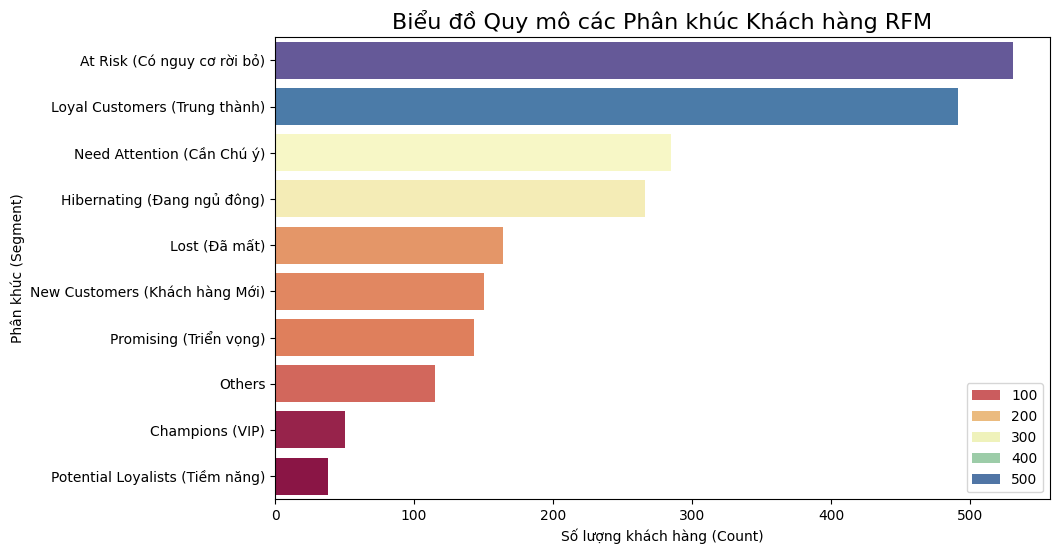

In [ ]:
# --- Trực quan hóa Quy mô các Phân khúc ---
# Chúng ta đã có segment_counts từ bước C.3.2
# segment_counts = df_rfm['Segment'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(
    x=segment_counts.values,
    y=segment_counts.index,
    hue=segment_counts.values,
    palette='Spectral'
)

plt.title('Biểu đồ Quy mô các Phân khúc Khách hàng RFM', fontsize=16)
plt.xlabel('Số lượng khách hàng (Count)')
plt.ylabel('Phân khúc (Segment)')
plt.show()

=> NHẬN XÉT Biểu đồ này xác nhận một cách trực quan những gì bảng số liệu C.3.2 .đã cho thấy:

  * Ưu thế của Nhóm "At Risk (Có nguy cơ rời bỏ)" & "Loyal Customers (Trung thành)": Hai phân khúc At Risk và Loyal Customers rõ ràng là hai nhóm đông đảo nhất, chiếm phần lớn tệp khách hàng. Điều này nhấn mạnh tầm quan trọng chiến lược của việc giữ chân nhóm Loyal và tái kích hoạt nhóm At Risk.

  * Quy mô các Nhóm Khác: Các nhóm cần quan tâm khác như Need Attention, Hibernating, và Lost cũng chiếm một tỷ lệ đáng kể.

  * Nhóm Tinh hoa: Nhóm Champions (VIP) và Potential Loyalists (Tiềm năng) là những nhóm nhỏ nhất, đúng như mong đợi đối với phân khúc khách hàng giá trị cao.

Bước tiếp theo: Biểu đồ này đã cho chúng ta thấy "có bao nhiêu người" trong mỗi nhóm. Bây giờ, chúng ta sẽ đi sâu vào C.3.4 để trả lời câu hỏi "họ là ai?".



---



### **C.3.4. Phân tích Chân dung Toàn diện (Persona Analysis)**

Mục tiêu: Đây là bước tổng hợp cuối cùng. Chúng ta sẽ kết hợp dữ liệu RFM với tất cả các thông tin nhân khẩu học và hành vi để xây dựng một chân dung toàn diện 360 độ, trả lời câu hỏi "Họ là ai?" và "Họ hành động như thế nào?".

#### *C.3.4.a. Chuẩn bị Dữ liệu & Tính toán Chân dung (Prepare Data & Calculate Profiles)*

In [ ]:
# --- Bước 1: Gộp dữ liệu để có Chân dung đầy đủ ---
# Gộp 'df' (chứa mọi thứ) và 'df_rfm' (chứa 'Segment')
df_final_analysis = pd.merge(df, df_rfm[['ID', 'Segment']], on='ID')

# Tạo cột 'TotalCampaignsAccepted' để đo lường tổng số lần phản hồi marketing
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
df_final_analysis['TotalCampaignsAccepted'] = df_final_analysis[campaign_cols].sum(axis=1)

# --- Bước 2: Tạo Bảng Chân dung Toàn diện---
# Sử dụng .agg() để tính toán các chỉ số quan trọng
profile_comprehensive = df_final_analysis.groupby('Segment', observed=True).agg(
    # Nhân khẩu học
    Avg_Income=('Income', 'mean'),
    Avg_Age=('Age', 'mean'),
    Avg_Total_Children=('Total_Children', 'mean'),
    Avg_Tenure=('Customer_Tenure', 'mean'),

    # --- Nhân khẩu học Xã hội ---
    Most_Common_Education=('Education', lambda x: x.mode().iloc[0]),
    Most_Common_Marital=('Marital_Status', lambda x: x.mode().iloc[0]),
    Most_Common_Country=('Country', lambda x: x.mode().iloc[0]),

    # --- Hành vi Kênh ---
    Avg_CatalogPurchases=('NumCatalogPurchases', 'mean'),
    Avg_DealsPurchases=('NumDealsPurchases', 'mean'),
    Avg_StorePurchases=('NumStorePurchases', 'mean'),
    Avg_WebPurchases=('NumWebPurchases', 'mean'),

    # --- Hành vi Tương tác ---
    Avg_WebVisits=('NumWebVisitsMonth', 'mean'),
    Avg_Campaigns_Accepted=('TotalCampaignsAccepted', 'mean'),

    # Quy mô
    Customer_Count=('ID', 'count')
)

# Sắp xếp theo Thu nhập Trung bình
profile_comprehensive = profile_comprehensive.sort_values(by='Avg_Income', ascending=False)

print("\n--- CHÂN DUNG TOÀN DIỆN CỦA CÁC PHÂN KHÚC ---")
profile_comprehensive.T


--- CHÂN DUNG TOÀN DIỆN CỦA CÁC PHÂN KHÚC ---


Segment,Champions (VIP),Potential Loyalists (Tiềm năng),At Risk (Có nguy cơ rời bỏ),Loyal Customers (Trung thành),Need Attention (Cần Chú ý),Lost (Đã mất),Others,Promising (Triển vọng),Hibernating (Đang ngủ đông),New Customers (Khách hàng Mới)
Avg_Income,77444.12,66087.63,65567.76,63886.82,42012.51,41551.26,39954.84,37089.36,34818.44,34320.45
Avg_Age,59.30,55.76,58.62,57.31,55.95,56.15,54.71,53.01,52.70,52.37
Avg_Total_Children,0.36,0.42,0.70,0.76,1.17,1.23,1.20,1.23,1.24,1.14
Avg_Tenure,455.32,346.66,403.66,392.43,344.75,368.01,375.68,338.15,329.22,312.55
Most_Common_Education,Graduation,Graduation,Graduation,Graduation,Graduation,Graduation,Graduation,Graduation,Graduation,Graduation
Most_Common_Marital,Partnered,Partnered,Partnered,Partnered,Partnered,Partnered,Partnered,Partnered,Partnered,Partnered
Most_Common_Country,SP,SP,SP,SP,SP,SP,SP,SP,SP,SP
Avg_CatalogPurchases,7.68,3.58,4.92,4.21,1.15,1.20,0.92,0.20,0.24,0.25
Avg_DealsPurchases,2.40,1.37,2.54,2.81,2.85,2.81,2.74,1.31,1.28,1.26
Avg_StorePurchases,9.72,5.13,8.35,8.21,4.15,3.99,4.01,2.68,2.74,2.70


#### *C.3.4.b. Trực quan hóa Đặc điểm Chính của Phân khúc*

#### Đặc điểm Thu nhập: So sánh Thu nhập Trung bình theo từng Phân khúc

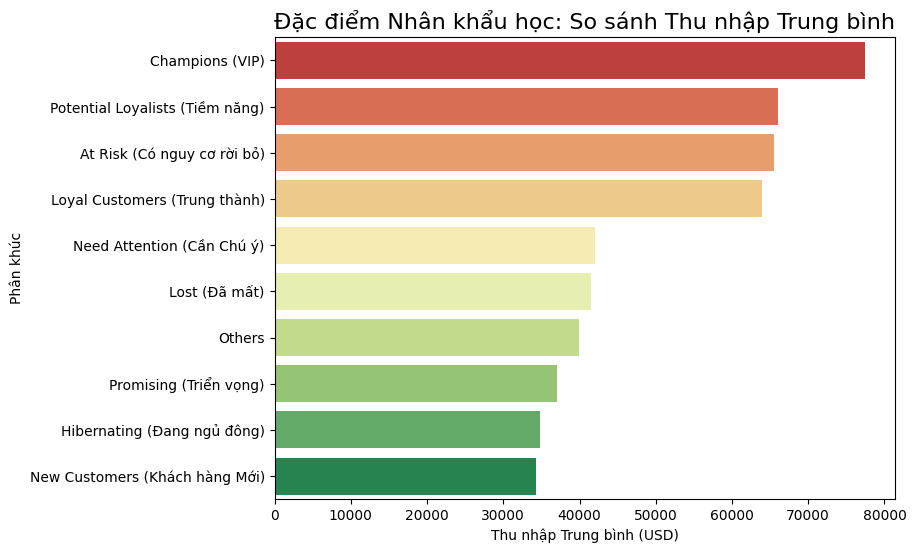

In [ ]:
# Chuẩn bị dữ liệu để vẽ
profile_to_plot = profile_comprehensive.reset_index().sort_values(by='Avg_Income', ascending=False)

# --- BIỂU ĐỒ 1: SO SÁNH THU NHẬP TRUNG BÌNH ---
plt.figure(figsize=(8, 6))
sns.barplot(
    data=profile_to_plot,
    x='Avg_Income',
    y='Segment',
    hue='Segment',
    palette='RdYlGn'
)

plt.title('Đặc điểm Nhân khẩu học: So sánh Thu nhập Trung bình', fontsize=16)
plt.xlabel('Thu nhập Trung bình (USD)')
plt.ylabel('Phân khúc')
plt.show()

=> Biểu đồ này cho thấy Thu nhập (Income) là yếu tố phân biệt mạnh mẽ nhất giữa các phân khúc. Có một sự phân tầng rõ ràng:

  * Các nhóm giá trị cao (Champions, Potential, At Risk, Loyal) chiếm trọn top đầu về thu nhập trung bình.

  * Các nhóm giá trị thấp (Need Attention trở xuống) có thu nhập trung bình thấp hơn đáng kể.

Kết luận: Thu nhập là chỉ báo quan trọng nhất về giá trị khách hàng.



---



#### Đặc điểm Tuổi tác: So sánh Số tuổi Trung bình theo từng Phân khúc

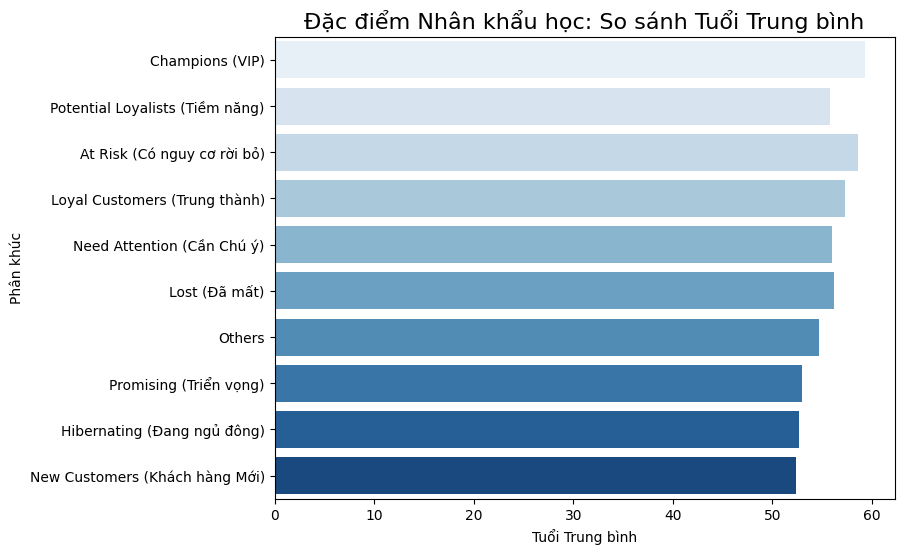

In [ ]:
# --- BIỂU ĐỒ 2: SO SÁNH TUỔI TRUNG BÌNH ---
plt.figure(figsize=(8, 6))
sns.barplot(
    data=profile_to_plot,
    x='Avg_Age',
    y='Segment',
    hue='Segment',
    palette='Blues'
)
plt.title('Đặc điểm Nhân khẩu học: So sánh Tuổi Trung bình', fontsize=16)
plt.xlabel('Tuổi Trung bình')
plt.ylabel('Phân khúc')
plt.show()

=> Biểu đồ này cho thấy một xu hướng ít rõ ràng hơn so với thu nhập:

Các nhóm khách hàng có giá trị cao hơn (Champions, Potential, At Risk, Loyal) có xu hướng lớn tuổi hơn một chút (trung bình ~56-59 tuổi) so với các nhóm giá trị thấp hơn (trung bình ~52-56 tuổi).



---



#### Đặc điểm Con cái: So sánh Số con cái Trung bình theo từng Phân khúc

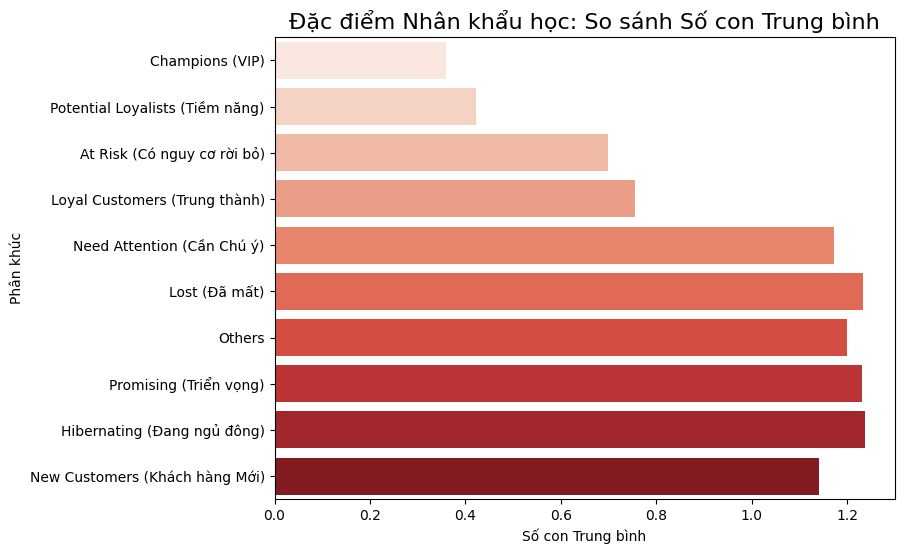

In [ ]:
# --- BIỂU ĐỒ 3: SO SÁNH SỐ CON TRUNG BÌNH ---
plt.figure(figsize=(8, 6))
sns.barplot(
    data=profile_to_plot,
    x='Avg_Total_Children',
    y='Segment',
    hue='Segment',
    palette='Reds'
)
plt.title('Đặc điểm Nhân khẩu học: So sánh Số con Trung bình', fontsize=16)
plt.xlabel('Số con Trung bình')
plt.ylabel('Phân khúc')
plt.show()

=> Biểu đồ này cho thấy một mối quan hệ nghịch đảo cực kỳ rõ ràng, xác nhận insight từ biểu đồ nhiệt C.1:

  * Các nhóm giá trị cao nhất (Champions, Potential) có số con trung bình thấp nhất (dưới 0.5).

  * Số con trung bình tăng dần đều khi giá trị phân khúc giảm xuống, đạt mức cao nhất ở các nhóm giá trị thấp nhất (New Customers, Hibernating, Lost).

Kết luận: Việc có con là một yếu tố cản trở mạnh mẽ đối với giá trị khách hàng trong bộ dữ liệu này.



---



#### Đặc điểm Thâm niên: So sánh Thâm niên Trung bình Khách hàng theo từng Phân khúc

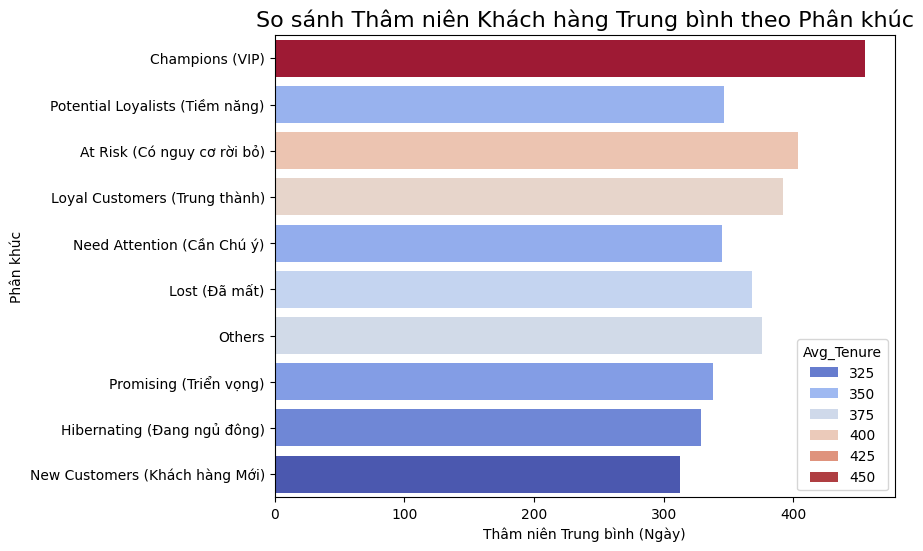

In [ ]:
# --- BIỂU ĐỒ 4: SO SÁNH THÂM NIÊN TRUNG BÌNH ---
plt.figure(figsize=(8, 6)) # Tạo ảnh mới
sns.barplot(
    data=profile_to_plot,
    x='Avg_Tenure',
    y='Segment',
    hue='Avg_Tenure',
    palette='coolwarm'
)
plt.title('So sánh Thâm niên Khách hàng Trung bình theo Phân khúc', fontsize=16)
plt.xlabel('Thâm niên Trung bình (Ngày)')
plt.ylabel('Phân khúc')
plt.show()

=> Biểu đồ này xác nhận một cách trực quan rằng thâm niên gắn bó (Tenure) là một chỉ báo quan trọng về giá trị khách hàng.

  * Nhóm Champions (VIP) nổi bật với thâm niên trung bình cao nhất, cho thấy họ là những khách hàng lâu năm và trung thành nhất.

  * Xu hướng chung: Các nhóm khách hàng có giá trị cao khác như At Risk, Loyal, Potential Loyalists cũng có thâm niên trung bình cao hơn đáng kể so với các nhóm giá trị thấp (Need Attention, Lost, New Customers...).

  * Khách hàng mới: Nhóm New Customers có thâm niên thấp nhất, đúng như định nghĩa.

Như vậy, khách hàng càng gắn bó lâu dài với công ty thì càng có xu hướng trở thành khách hàng giá trị cao (hoặc từng là khách hàng giá trị cao như nhóm At Risk).



---



#### Hành Vi Kênh Cao cấp: Mua qua Catalog

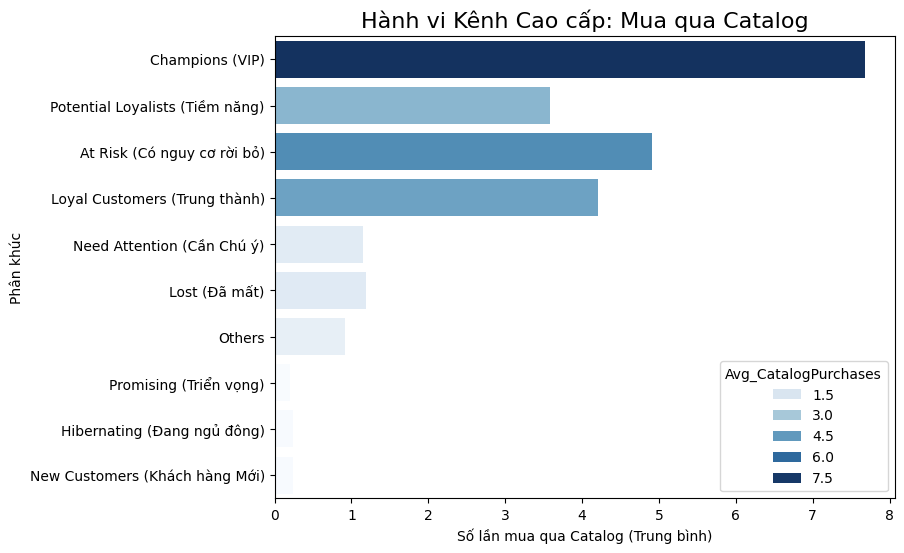

In [ ]:
# BIỂU ĐỒ 5: HÀNH VI KÊNH "CAO CẤP" (CATALOG)
plt.figure(figsize=(8, 6))
sns.barplot(data=profile_to_plot,
            x='Avg_CatalogPurchases',
            y='Segment',
            hue='Avg_CatalogPurchases',
            palette='Blues')
plt.title('Hành vi Kênh Cao cấp: Mua qua Catalog', fontsize=16)
plt.xlabel('Số lần mua qua Catalog (Trung bình)')
plt.ylabel('Phân khúc')
plt.show()

=> Biểu đồ này cho thấy một sự phân chia rõ rệt:

  * Các phân khúc giá trị cao (Champions, At Risk, Potential, Loyal) là những nhóm thống trị hoàn toàn kênh này. Đặc biệt, nhóm Champions (VIP) có số lần mua qua Catalog cao vượt trội so với phần còn lại.

  * Ngược lại, tất cả các nhóm giá trị thấp (Need Attention trở xuống) gần như hoàn toàn không sử dụng kênh này (số lần mua gần bằng 0).

Điều này khẳng định Catalog là một kênh cao cấp (premium), chỉ hiệu quả với tệp khách hàng VIP và trung thành.



---



#### Hành Vi "Săn" Ưu Đãi: Mua qua Deals

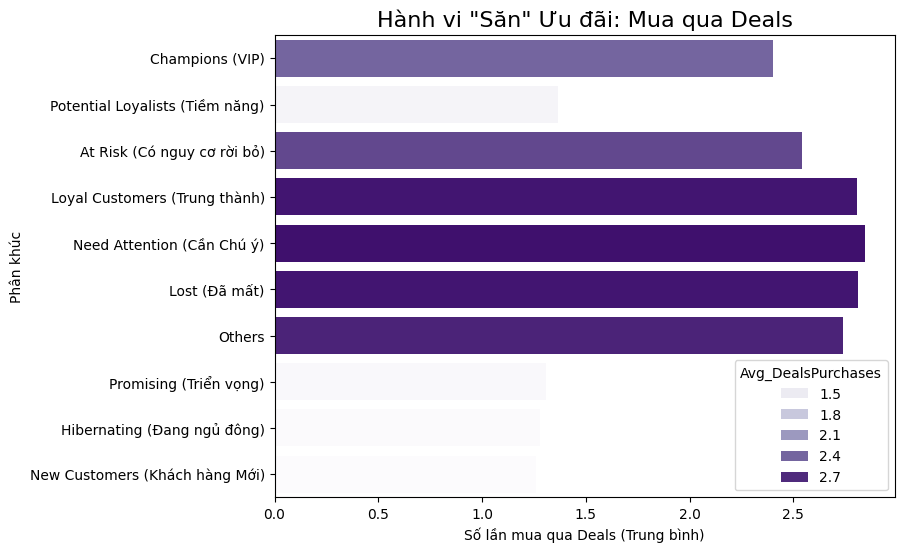

In [ ]:
# --- BIỂU ĐỒ 6: HÀNH VI "SĂN" ƯU ĐÃI (DEALS) ---
plt.figure(figsize=(8, 6))
sns.barplot(
    data=profile_to_plot,
    x='Avg_DealsPurchases',
    y='Segment',
    hue='Avg_DealsPurchases',
    palette='Purples'
)
plt.title('Hành vi "Săn" Ưu đãi: Mua qua Deals', fontsize=16)
plt.xlabel('Số lần mua qua Deals (Trung bình)')
plt.ylabel('Phân khúc')
plt.show()

=> Biểu đồ này cho thấy một xu hướng gần như ngược lại hoàn toàn so với biểu đồ Catalog.

  * Sự ưa chuộng của Nhóm Giá trị thấp: Các phân khúc có giá trị thấp hơn (Lost, Need Attention, Others, Loyal Customers - nhóm này có vẻ hơi bất ngờ ở đây) là những nhóm mua qua Deals nhiều nhất.

  * Nhóm VIP thờ ơ: Ngược lại, các nhóm có tiềm năng cao nhất (Champions, Potential Loyalists) và nhóm mới (New, Promising, Hibernating) lại ít mua qua Deals hơn đáng kể.

 Kết luận: Điều này khẳng định kênh Deals là công cụ hiệu quả để tương tác với các nhóm khách hàng nhạy cảm về giá hoặc cần được chú ý, nhưng lại kém hấp dẫn đối với nhóm khách hàng VIP và nhóm khách hàng mới nhất.



---



#### Hành vi Tương tác Marketing: Số Chiến dịch đã Chấp nhận

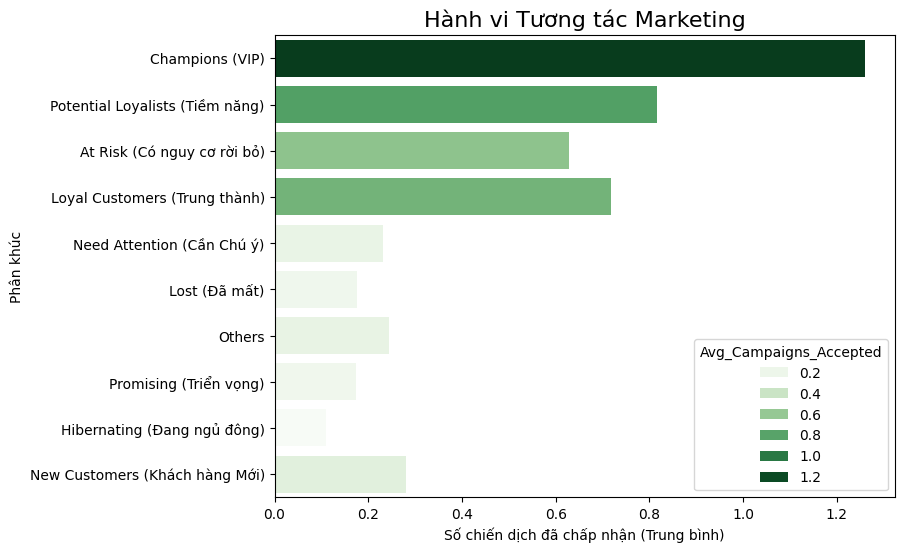

In [ ]:
# BIỂU ĐỒ 7: HÀNH VI TƯƠNG TÁC MARKETING
plt.figure(figsize=(8, 6))
sns.barplot(data=profile_to_plot,
            x='Avg_Campaigns_Accepted',
            y='Segment',
            hue='Avg_Campaigns_Accepted',
            palette='Greens')
plt.title('Hành vi Tương tác Marketing', fontsize=16)
plt.xlabel('Số chiến dịch đã chấp nhận (Trung bình)')
plt.ylabel('Phân khúc')
plt.show()

=> Nhận xét: Xu hướng ở đây gần như giống hệt với biểu đồ Catalog, cho thấy một sự liên kết mạnh mẽ

  * Nhóm Champions (VIP) một lần nữa cho thấy sự vượt trội, với mức độ tương tác với các chiến dịch marketing cao gấp đôi các nhóm còn lại.

  * Các nhóm giá trị cao khác (Potential, Loyal, At Risk) cũng có mức tương tác tốt.

  * Các nhóm giá trị thấp (Need Attention trở xuống) có mức độ tương tác rất thấp hoặc gần bằng 0.

Kết luận: Nhóm khách hàng giá trị nhất (Champions) cũng là nhóm cởi mở nhất và phản hồi tốt nhất với các hoạt động marketing.



---



#### Hành vi "Window Shopper": Lướt Web/tháng

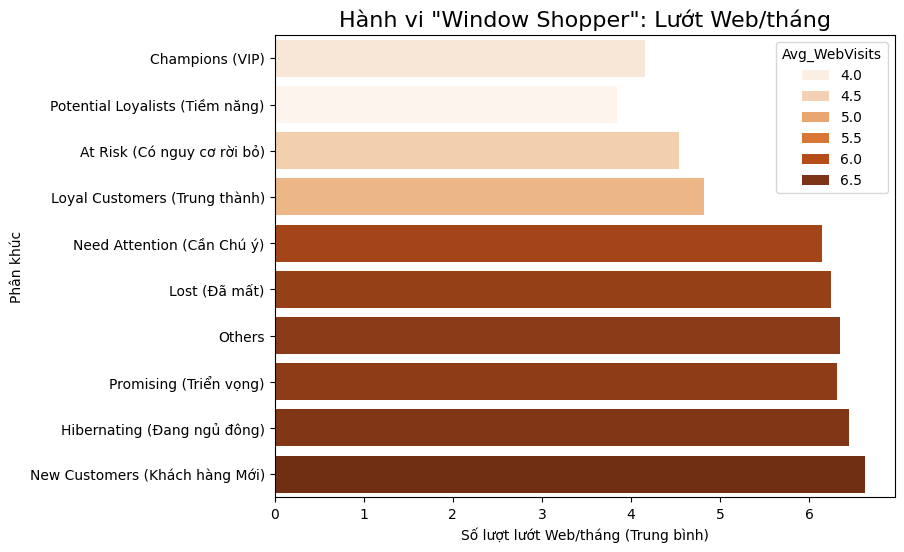

In [ ]:
# BIỂU ĐỒ 8: HÀNH VI "WINDOW SHOPPER" (LƯỚT WEB)
plt.figure(figsize=(8, 6))
sns.barplot(data=profile_to_plot,
            x='Avg_WebVisits',
            y='Segment',
            hue='Avg_WebVisits',
            palette='Oranges')
plt.title('Hành vi "Window Shopper": Lướt Web/tháng', fontsize=16)
plt.xlabel('Số lượt lướt Web/tháng (Trung bình)')
plt.ylabel('Phân khúc')
plt.show()

=>  Đây là biểu đồ "lật ngược" lại tất cả, xác nhận insight "ngược đời" mà chúng ta đã thấy ở biểu đồ nhiệt C.1:

  * Các nhóm giá trị thấp nhất (Lost, New Customers, Hibernating...) lại là những người lướt web nhiều nhất (trung bình 6-6.5 lần/tháng).

  * Ngược lại, nhóm Champions (VIP) giá trị nhất lại là nhóm lướt web ít nhất (chỉ 4.0 lần/tháng).

Kết luận: Lượt truy cập web cao không đồng nghĩa với giá trị cao. Nhóm VIP mua sắm rất có chủ đích (ít lướt web), trong khi nhóm giá trị thấp có hành vi "chỉ xem" (window shopping) rất cao.



---



### *C.3.4.c. Phân tích Chân dung các Phân khúc Khách hàng & Đề xuất Chiến lược*

Bảng `profile_comprehensive` (Chân dung toàn diện) và 8 biểu đồ trực quan (`Income`, `Age`, `Total_children`, `Tenure`, `Catalog`, `Deals`, `Marketing`, `Web Visits`) đã cùng nhau vẽ nên một bức tranh hoàn chỉnh và sâu sắc về các phân khúc khách hàng.

Chúng ta có thể thấy, Các đặc điểm xã hội (`Education`, `Marital_Status`, `Country`) là đồng nhất (Graduation, Partnered, SP), khẳng định các yếu tố quyết định **giá trị khách hàng** chính là Thu nhập (`Income`), Con cái (`Total_Children`), và `Hành vi`.

Dưới đây là chân dung của các nhóm phân khúc khách hàng chiến lược quan trọng nhất chúng ta đã tìm ra:

  * **1. Champions (VIP) (50 người) - Nhóm Tinh hoa** 💎

    * Họ là ai?: Thu nhập cao nhất (77k), lớn tuổi nhất (59.3), và có ít con nhất (0.36).

    * Họ hành động thế nào?: Họ thống trị áp đảo kênh `Catalog`(7.68 lần), tương tác marketing tốt nhất (1.26 lần), lướt web ít (4.16 lần - chỉ nhiều hơn nhóm Potential), và mua qua Deals ở mức trung bình (2.4 lần). Họ là khách hàng "có chủ đích", ưu tiên giá trị hơn là ưu đãi.

    * Chiến lược: *Giữ chân & Tri ân*. Gửi ưu đãi độc quyền, dịch vụ VIP, và tiếp tục sử dụng kênh `Catalog` để tiếp cận họ.

  * **2. At Risk (Có nguy cơ rời bỏ) (531 người - LỚN NHẤT & KHẨN CẤP NHẤT)** 🚨

    * Họ là ai?: Nhóm đông đảo nhất. Họ là những "VIP/Loyal cũ" với thu nhập rất cao (65.5k), lớn tuổi (58.6) và ít con (0.7).

    * Họ hành động thế nào?: Lịch sử mua hàng rất tốt, thể hiện qua việc sử dụng Catalog rất nhiều (4.91 lần - chỉ sau VIP). Họ cũng tương tác Marketing khá tốt (0.63 lần) và mua qua Deals ở mức trung bình (2.54 lần). Điểm khác biệt duy nhất là Recency (đã lâu không mua).

    * Chiến lược: *Tái kích hoạt Chăm sóc Khẩn cấp*. Họ có giá trị cao nhưng đang ngủ quên. Sử dụng các chiến dịch "Chúng tôi nhớ bạn" với ưu đãi cá nhân hóa qua kênh `Catalog` hoặc Email để kéo họ quay lại. Cân nhắc sử dụng các ưu đãi (`Deals`) đặc biệt như một cách để kéo họ quay lại nhanh chóng.

  * **3. Loyal Customers (Trung thành) (491 người) - Nhóm "Xương sống"** 🤝

    * Họ là ai?: "Xương sống" của công ty. Thu nhập cao (63.8k), lớn tuổi (57.3) và ít con (0.75).

    * Họ hành động thế nào?: Họ mua qua Catalog nhiều (4.20 lần) và tương tác Marketing tốt (0.71 lần). Đáng chú ý, họ lại là một trong những nhóm mua qua Deals nhiều nhất (2.80 lần), chỉ sau Need Attention và Lost.

    * Chiến lược: *Tối đa hóa giá trị & Duy trì lòng trung thành*. Họ vừa trung thành vừa nhạy cảm với ưu đãi. Kết hợp giới thiệu sản phẩm mới/cao cấp với các chương trình `Deals` dành riêng cho khách hàng thân thiết để giữ chân họ.

  * **4. Nhóm Potential Loyalists (Tiềm năng) (38 người - Nhỏ nhưng Giá trị!)** 💰➡️💖

    * Họ là ai? Thu nhập rất cao (66k - chỉ sau VIP), ít con (0.42). Điểm RFM của họ cho thấy hoặc mua không thường xuyên (F<=2) hoặc mua hơi xa (R=3) dù chi tiêu nhiều (M>=3).

    * Họ hành động thế nào?: Họ dùng Catalog khá nhiều (3.57 lần), tương tác marketing rất tốt (0.81 lần - chỉ sau VIP), lướt web ít nhất (3.84 lần - ít hơn cả VIP!), và mua qua Deals ít nhất (1.36 lần). Họ rất giống VIP nhưng chưa ổn định.

    * Chiến lược: *Tăng Tần suất & Xây dựng Thói quen*. Họ có tiềm năng trở thành VIP. Sử dụng các chiến dịch nhắm mục tiêu qua Catalog/Email với ưu đãi mua lặp lại hoặc gợi ý sản phẩm giá trị cao. Tránh `Deals`.

  * **5. Nhóm Cần Quan tâm ("Need Attention", "Lost", "Others") (~564 người)** 🤔📉

     * Họ là ai?:Thu nhập trung bình-thấp (40k - 42k), nhiều con (1.17 - 1.23).

     * Họ hành động thế nào?: Họ mua qua Catalog rất ít (0.9 - 1.1 lần), tương tác marketing kém (0.17 - 0.24 lần), nhưng lướt web nhiều (6.1 - 6.3 lần) và là nhóm mua qua Deals nhiều nhất (2.7 - 2.8 lần).

     * Chiến lược: Kích hoạt bằng `Deals`. Đây là nhóm nhạy cảm về giá và thích ưu đãi. Sử dụng các chiến dịch `Deals` qua kênh online để khuyến khích họ mua hàng. Với nhóm Lost, nỗ lực nên ở mức chi phí thấp.

 * **6. Nhóm Tương lai ("New Customers", "Promising", "Hibernating") (~559 người)** 🌱🖱️

    * Họ là ai?: Thu nhập thấp nhất (34k - 37k), nhiều con nhất (1.14 - 1.24). Điểm chung là tần suất mua rất thấp (F=1).

    * Họ hành động thế nào?: Họ hoàn toàn không mua qua Catalog (0.2 lần), tương tác marketing gần như bằng 0 (0.1 - 0.2 lần), lướt web nhiều nhất (6.3 - 6.6 lần), và mua qua Deals rất ít (1.2 - 1.3 lần).

    * Chiến lược: *Nuôi dưỡng Chi phí thấp & Thử nghiệm*. Họ lướt web nhiều nhưng không bị thu hút bởi Deals hiện tại. Tập trung vào trải nghiệm sau mua hàng tốt (cho New/Promising), gửi email chào mừng, và thử nghiệm các loại ưu đãi/nội dung khác qua kênh online để tìm ra cách chuyển đổi họ.


=> TÓM TẮT CHIẾN LƯỢC THEO CÁC NHÓM PHÂN KHÚC KHÁCH HÀNG RFM:

  * Nhóm `Champions (VIP)` (50 người): Giữ chân & Tri ân bằng ưu đãi độc quyền và kênh Catalog.

  * Nhóm `At Risk` (531 người): Tái kích hoạt Chăm sóc Khẩn cấp qua Catalog/Email với ưu đãi cá nhân hóa, cân nhắc Deals đặc biệt.

  * Nhóm `Loyal Customers` (491 người): Tối đa hóa giá trị (Upsell) kết hợp Deals riêng để duy trì lòng trung thành.

  * Nhóm `Potential Loyalists` (38 người): Tăng Tần suất qua Catalog/Email với ưu đãi mua lặp lại, tránh Deals.

  * Nhóm` Cần Quan tâm (Need Attention, Lost, Others)` (~564 người): Kích hoạt lại bằng Deals qua kênh online.

  * Nhóm `Tương lai (New, Promising, Hibernating)` (~559 người): Nuôi dưỡng chi phí thấp bằng trải nghiệm sau mua & thử nghiệm ưu đãi/nội dung online mới (ngoài Deals hiện tại).




---



### ✅ TỔNG KẾT C.3: PHÂN KHÚC KHÁCH HÀNG CHIẾN LƯỢC (RFM ANALYSIS)

Phần C.3 là bước tổng hợp quan trọng nhất, nơi chúng ta đã sử dụng mô hình RFM (Recency, Frequency, Monetary) để chuyển từ việc hiểu các mối quan hệ riêng lẻ sang việc xác định các nhóm khách hàng chiến lược.

**Quy trình thực hiện**

  * Chấm điểm: Chúng ta đã chấm điểm R, F, M cho từng khách hàng bằng phương pháp Tứ phân vị.

  * Phân khúc: Sử dụng logic if/else rõ ràng, chúng ta đã gán mỗi khách hàng vào một phân khúc chiến lược (ví dụ: Champions, At Risk...).

  * Trực quan hóa Quy mô: Biểu đồ cột đã cho thấy rõ At Risk và Loyal Customers là hai nhóm đông đảo nhất.

  * Phân tích Chân dung Toàn diện: Bằng cách kết hợp dữ liệu RFM với thông tin nhân khẩu học và hành vi, chúng ta đã xây dựng được chân dung chi tiết cho từng nhóm và trực quan hóa các hành vi khác biệt chính (Mua qua Catalog vs. Deals, Tương tác Marketing, Lướt Web).

**Kết quả & Đề xuất Chính**

 Phân tích RFM đã xác định rõ các nhóm khách hàng và đưa ra chiến lược hành động cụ thể cho từng nhóm, bao gồm:

  * Champions: Giữ chân & Tri ân (Ưu đãi độc quyền, Catalog).

  * At Risk: Tái kích hoạt khẩn cấp (Win-back bằng ưu đãi cá nhân hóa, Catalog/Email, Deals).

  * Loyal Customers: Tối đa hóa giá trị (Upsell, Deals riêng).

  * Potential Loyalists: Tăng tần suất (Ưu đãi mua lặp lại qua Catalog/Email).

  * Nhóm Cần Quan tâm: Kích hoạt bằng Deals online.

  * Nhóm Tương lai: Nuôi dưỡng chi phí thấp (Trải nghiệm sau mua, thử nghiệm ưu đãi/nội dung online mới).

**Giá trị**: Phần C.3 đã cung cấp một "bản đồ khách hàng" rõ ràng, giúp doanh nghiệp tập trung nguồn lực hiệu quả, cá nhân hóa chiến lược marketing và tối ưu hóa trải nghiệm khách hàng cho từng phân khúc cụ thể.



---



## 🎯 **TỔNG KẾT PHẦN C: Phân tích Khám phá Chuyên sâu**
Phần C đã chuyển trọng tâm từ việc mô tả "cái gì" sang việc lý giải "tại sao" và xác định "ai" trong tệp khách hàng. Chúng ta đã kết nối các điểm dữ liệu để khám phá các động lực thực sự đằng sau hành vi khách hàng và xây dựng nên các phân khúc chiến lược.

Những Khám phá Chính:
    
  * Xác định được "Động lực & Cản trở":
    
      Phân tích tương quan (C.1) và các mối quan hệ (C.2) đã khẳng định một cách mạnh mẽ: Thu nhập (`Income`) chính là "động lực" chính thúc đẩy cả sức mua lẫn tần suất mua sắm, trong khi Con cái (`Total_Children`) đóng vai trò như "sự cản trở", làm giảm chi tiêu và thay đổi ưu tiên sản phẩm (ít Thịt hơn). Các yếu tố như `Tuổi`, `Thâm niên` tuy không có mối liên hệ tuyến tính rõ ràng với chi tiêu, nhưng lại là chìa khóa quan trọng để phân khúc.

  * Giải mã Chiến lược Đa kênh:
    
      Chúng ta đã thấy rõ vai trò chuyên biệt của từng kênh (C.2.3): `Catalog` là kênh cao cấp thu hút nhóm VIP/thu nhập cao, `Deals` là công cụ hiệu quả cho nhóm nhạy cảm về giá (thu nhập thấp/<30 tuổi), trong khi Store và Web là nền tảng cốt lõi phục vụ đa số. Insight quan trọng là khách hàng trung thành nhất lại là những người mua sắm đa kênh.

  * Nhận ra "Hiểu lầm về Lượt truy cập Web":
    
      Một trong những phát hiện bất ngờ nhất (C.1) là lượt truy cập web cao (`NumWebVisitsMonth`) lại tương quan nghịch với cả thu nhập và chi tiêu. Điều này cảnh báo rằng không nên nhầm lẫn giữa hoạt động lướt web với giá trị thực sự của khách hàng – nhóm "window shopper" tồn tại và rất đông.

  * Xác định Phân khúc Chiến lược qua RFM (C.3):
    
      Bằng cách tổng hợp `Recency`, `Frequency`, và `Monetary`, chúng ta đã xây dựng thành công một "Bản đồ Khách hàng" chi tiết với các chân dung 360 độ và chiến lược hành động rõ ràng cho từng nhóm: từ việc tri ân `Champions (VIP)` 💎, tái kích hoạt khẩn cấp nhóm `At Risk` đông đảo 🚨, tối đa hóa giá trị từ `Loyal Customers` 💪, đến việc nuôi dưỡng chi phí thấp cho các `nhóm tương lai` 🌱.

Kết luận: Phần C đã thành công trong việc đi sâu vào dữ liệu, khám phá các mối liên hệ ẩn, xác nhận các giả thuyết kinh doanh và quan trọng nhất là cung cấp một khung phân khúc khách hàng (RFM) cực kỳ rõ ràng và có tính hành động cao, sẵn sàng cho việc triển khai các chiến lược marketing và chăm sóc khách hàng được cá nhân hóa.



---



#############################################################################

## **D. HỒI QUY DỰ ĐOÁN CƠ BẢN: DỰ ĐOÁN TỔNG CHI TIÊU**

**Mục tiêu:**
Chúng ta sẽ xây dựng mô hình **Hồi quy Tuyến tính OLS (Ordinary Least Squares) " để hiểu rõ hơn **mức độ ảnh hưởng** và **ý nghĩa thống kê** của các yếu tố (`Income`, `Total_Children`, `Customer_Tenure`) đối với **`Total_Spending` (Tổng Chi tiêu)**.

### BƯỚC 1: Lựa chọn & Chuẩn bị Dữ liệu Ban đầu

**Mục tiêu:** Chọn ra các đặc điểm (features) có khả năng ảnh hưởng mạnh nhất đến `Total_Spending`, dựa trên phân tích tương quan ở Phần C.1.

**Lựa chọn:** Chúng ta sẽ tập trung vào các yếu tố có tương quan mạnh và logic nhất:
* **`Income` (Thu nhập):** Tương quan thuận mạnh nhất (+0.75).
* **`Total_Children` (Số con):** Tương quan nghịch mạnh nhất (-0.50).
* **`Customer_Tenure` (Thâm niên):** Tương quan thuận yếu (+0.14). Chúng ta đưa biến này vào để đánh giá xem liệu nó có đóng góp ý nghĩa thống kê vào việc giải thích `Total_Spending` hay không, *sau khi* đã tính đến ảnh hưởng của Thu nhập và Con cái.

*(Chúng ta tránh `Total_NumberOfPurchases` vì nó tương quan quá mạnh với `Total_Spending` (+0.75) (giống `Income`), nến nếu đưa cả biến này vào có thể gây đa cộng tuyến)*.

In [ ]:
# Xác định các cột sẽ sử dụng
cols_for_ols = ['Income', 'Total_Children', 'Customer_Tenure', 'Total_Spending']

# Tạo DataFrame mới
df_ols_full = df[cols_for_ols]

print(f"Kích thước dữ liệu ban đầu cho OLS: {df_ols_full.shape}")

Kích thước dữ liệu ban đầu cho OLS: (2233, 4)


Xử lý giá trị ngoại vi (Outliers)

In [ ]:
# Xác định ngưỡng outliers cho Income
Q1_inc = df_ols_full['Income'].quantile(0.25)
Q3_inc = df_ols_full['Income'].quantile(0.75)
IQR_inc = Q3_inc - Q1_inc
lower_bound_inc = Q1_inc - 1.5 * IQR_inc
upper_bound_inc = Q3_inc + 1.5 * IQR_inc

# Xác định ngưỡng outliers cho Total_Spending
Q1_spend = df_ols_full['Total_Spending'].quantile(0.25)
Q3_spend = df_ols_full['Total_Spending'].quantile(0.75)
IQR_spend = Q3_spend - Q1_spend
lower_bound_spend = Q1_spend - 1.5 * IQR_spend
upper_bound_spend = Q3_spend + 1.5 * IQR_spend

# Lọc bỏ các dòng chứa outliers
df_ols_no_outliers = df_ols_full[
    (df_ols_full['Income'] >= lower_bound_inc) & (df_ols_full['Income'] <= upper_bound_inc) &
    (df_ols_full['Total_Spending'] >= lower_bound_spend) & (df_ols_full['Total_Spending'] <= upper_bound_spend)
]

print(f"Kích thước dữ liệu sau khi loại bỏ outliers: {df_ols_no_outliers.shape}")
removed_count = len(df_ols_full) - len(df_ols_no_outliers)
print(f"Số dòng outliers đã loại bỏ: {removed_count}")

Kích thước dữ liệu sau khi loại bỏ outliers: (2224, 4)
Số dòng outliers đã loại bỏ: 9


### Bước 2: Chuẩn bị Dữ liệu Cuối cùng
Mục tiêu: Chuẩn hóa các biến độc lập và thêm cột hằng số

In [ ]:
# --- Tách biến Độc lập (X) và Phụ thuộc (y) ---
X_ols_clean = df_ols_no_outliers[['Income', 'Total_Children', 'Customer_Tenure']]
y_ols_clean = df_ols_no_outliers['Total_Spending']

In [ ]:
# --- Chuẩn hóa Biến Độc lập ---
# Mục đích: Đưa các biến độc lập (Income, Total_Children, Customer_Tenure)
# về cùng một thang đo (trung bình 0, độ lệch chuẩn 1).
scaler_ols_final = StandardScaler()
X_scaled_ols_final = scaler_ols_final.fit_transform(X_ols_clean)

# Chuyển lại thành DataFrame
X_scaled_df_ols_final = pd.DataFrame(X_scaled_ols_final, columns=X_ols_clean.columns, index=X_ols_clean.index)

In [ ]:
# Xem lại df biến độc lập đã được chuẩn hoá
X_scaled_df_ols_final

,Income,Total_Children,Customer_Tenure
0,1.72,-1.27,-1.72
1,-0.01,-1.27,-1.71
2,0.81,0.06,-1.55
3,-0.98,1.39,1.42
4,-1.55,0.06,-1.39
...,...,...,...
2235,0.77,0.06,1.42
2236,-1.05,0.06,0.73
2237,-0.27,0.06,0.97
2238,0.74,-1.27,0.99


In [ ]:
# --- Thêm cột Hằng số ---
X_final_ols = sm.add_constant(X_scaled_df_ols_final)

print("\n5 dòng đầu của X chuẩn bị cho mô hình OLS:")
display(X_final_ols.head())


5 dòng đầu của X chuẩn bị cho mô hình OLS:


,const,Income,Total_Children,Customer_Tenure
0,1.00,1.72,-1.27,-1.72
1,1.00,-0.01,-1.27,-1.71
2,1.00,0.81,0.06,-1.55
3,1.00,-0.98,1.39,1.42
4,1.00,-1.55,0.06,-1.39


### Bước 3: Huấn luyện Mô hình OLS

In [ ]:
# --- Huấn luyện mô hình OLS trên toàn bộ dữ liệu sạch ---
# Khởi tạo mô hình
ols_model_final = sm.OLS(y_ols_clean, X_final_ols)
# Huấn luyện mô hình và tính toán kết quả hồi quy
ols_results_final = ols_model_final.fit()

print("\n✅ Mô hình OLS đã được huấn luyện thành công trên dữ liệu đã làm sạch!")


✅ Mô hình OLS đã được huấn luyện thành công trên dữ liệu đã làm sạch!


In [ ]:
# --- Xem Bảng Tóm tắt Kết quả ---
print("\n--- Bảng Tóm tắt Kết quả Mô hình OLS (Toàn bộ dữ liệu sạch) ---")
print(ols_results_final.summary())


--- Bảng Tóm tắt Kết quả Mô hình OLS (Toàn bộ dữ liệu sạch) ---
                            OLS Regression Results                            
Dep. Variable:         Total_Spending   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     1641.
Date:                Thu, 06 Nov 2025   Prob (F-statistic):               0.00
Time:                        14:26:11   Log-Likelihood:                -16073.
No. Observations:                2224   AIC:                         3.215e+04
Df Residuals:                    2220   BIC:                         3.218e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

### BƯỚC 4: Phân tích Kết quả Hồi quy OLS

Bảng tóm tắt kết quả OLS (`ols_results_final.summary()`) cho chúng ta biết những điều quan trọng sau về mối quan hệ giữa các yếu tố và Tổng Chi tiêu (`Total_Spending`):

#### 1. Mức độ Giải thích của Mô hình ✅

* **R-squared ≈ 0.69:** Điều này có nghĩa là 3 yếu tố chúng ta chọn (`Income`, `Total_Children`, `Customer_Tenure`) cùng nhau giải thích được khoảng **69%** sự khác biệt trong Tổng Chi tiêu giữa các khách hàng. Đây là một mức độ giải thích **khá tốt**, cho thấy các yếu tố này thực sự quan trọng.

* **Mô hình Tổng thể có ý nghĩa:** Giá trị `Prob (F-statistic)` rất nhỏ (gần bằng 0) khẳng định rằng mô hình này tốt hơn nhiều so với việc đoán ngẫu nhiên.


#### **2. Yếu tố nào Ảnh hưởng đến Chi tiêu? (Hệ số & P-value)** 📊

Chúng ta xem xét cột **`coef`** (hệ số) để biết chiều hướng ảnh hưởng và cột **`P>|t|`** (p-value) để biết yếu tố đó có **quan trọng về mặt thống kê** hay không (nếu p < 0.05 là quan trọng).

* **`Income` (Thu nhập):**
    * Hệ số: **Dương (+410.63)**. Nghĩa là thu nhập **tăng** thì chi tiêu **tăng**.
    * P-value: **Rất nhỏ (0.000)**. Khẳng định Thu nhập là yếu tố **cực kỳ quan trọng**. 💪

* **`Total_Children` (Số con):**
    * Hệ số: **Âm (-162.98)**. Nghĩa là có thêm con thì chi tiêu **giảm**.
    * P-value: **Rất nhỏ (0.000)**. Khẳng định Số con cũng là yếu tố **rất quan trọng** (ảnh hưởng tiêu cực). 📉
    
* **`Customer_Tenure` (Thâm niên):**
    * Hệ số: **Dương (+87.95)**. Nghĩa là số năm thâm niên lâu hơn thì chi tiêu có **tăng nhẹ**.
    * **P-value:** Rất nhỏ (0.000), cho thấy ảnh hưởng này (dù nhỏ) là **có ý nghĩa thống kê**, không phải do ngẫu nhiên. => Bất ngờ! Mặc dù tương quan ban đầu yếu, trong mô hình đa biến này, Customer_Tenure lại cho thấy một ảnh hưởng có ý nghĩa thống kê lên Total_Spending. Điều này có nghĩa là ngay cả khi đã tính đến Thu nhập và Con cái, việc khách hàng gắn bó lâu hơn vẫn đóng góp một phần nhỏ nhưng đáng kể vào việc tăng chi tiêu.

#### **3. Công thức Hồi quy Ước lượng:**

  Dựa trên các hệ số (coef):

    Total_Spending ≈ 603.40 + (410.63 * Scaled_Income) - (162.98 * Scaled_Total_Children) + (87.95 * Scaled_Customer_Tenure)

#### 4. Kết luận về Mối quan hệ 💡

Mô hình OLS này giúp chúng ta **lượng hóa** và **xác nhận** những gì đã thấy trong EDA:
* **Thu nhập** là động lực chính thúc đẩy chi tiêu.
* **Con cái** là yếu tố chính cản trở chi tiêu.
* **Thâm niên** cũng có một đóng góp nhỏ nhưng tích cực vào việc tăng chi tiêu.

=> Tóm lại, để ước tính chi tiêu của khách hàng, chúng ta cần xem xét chủ yếu Thu nhập và Số con của họ, nhưng thời gian họ gắn bó với công ty cũng đóng một vai trò nhỏ.

### BƯỚC 5: Hàm Dự đoán Đơn giản:

Để sử dụng mô hình này dự đoán cho một khách hàng mới, chúng ta cần chuẩn hóa dữ liệu đầu vào bằng cùng scaler đã dùng (scaler_ols_final).

In [ ]:
# --- TẠO HÀM DỰ ĐOÁN ---
# Với scaler_ols_final và ols_results_final đã tồn tại từ các bước trước

def predict_spending_ols(income, children, tenure):
    """
    Dự đoán Total_Spending sử dụng mô hình OLS đã huấn luyện.

    Args:
        income (float): Thu nhập.
        children (int): Tổng số con.
        tenure (int): Thâm niên (ngày).

    Returns:
        float: Giá trị Total_Spending dự đoán.
    """
    # Tạo DataFrame đầu vào
    input_data = pd.DataFrame({
        'Income': [income],
        'Total_Children': [children],
        'Customer_Tenure': [tenure]
    })

    # Chuẩn hóa đầu vào bằng scaler đã fit
    try:
        input_scaled = scaler_ols_final.transform(input_data)
    except Exception as e:
        print(f"Lỗi khi chuẩn hóa: {e}")
        return None

    # Chuyển thành DataFrame và thêm cột hằng số
    input_scaled_df = pd.DataFrame(input_scaled, columns=['Income', 'Total_Children', 'Customer_Tenure'])
    input_final = sm.add_constant(input_scaled_df, has_constant='add') # Thêm hằng số
    # has_constant='add': Luôn thêm cột hằng số vào dữ liệu ngay cả khi dữ liệu đã có cột hằng số =>à không báo lỗi.

    # Dự đoán bằng mô hình OLS đã fit
    prediction = ols_results_final.predict(input_final)

    return prediction[0] # Trả về giá trị dự đoán

# --- Sử dụng hàm ---
predicted_value = predict_spending_ols(income=70000, children=0, tenure=500)
if predicted_value is not None:
    print(f"\n--- Dự đoán ---")
    print(f"Với Income=70,000 USD, Children=0, Tenure=500 ngày:")
    print(f"=> Total_Spending dự đoán là: {predicted_value:.2f} USD")

predicted_value_2 = predict_spending_ols(income=40000, children=2, tenure=100)
if predicted_value_2 is not None:
    print(f"\nVới Income=40,000 USD, Children=2, Tenure=100 ngày:")
    print(f"=> Total_Spending dự đoán là: {predicted_value_2:.2f} USD")


--- Dự đoán ---
Với Income=70,000 USD, Children=0, Tenure=500 ngày:
=> Total_Spending dự đoán là: 1256.11 USD

Với Income=40,000 USD, Children=2, Tenure=100 ngày:
=> Total_Spending dự đoán là: 19.13 USD




---



### 🎯 **TỔNG KẾT PHẦN D**: Phân tích Hồi quy Tuyến tính (OLS)
Phần D đã bổ sung một góc nhìn định lượng vào các mối quan hệ mà chúng ta khám phá trong EDA, bằng cách áp dụng mô hình Hồi quy Tuyến tính OLS để hiểu rõ hơn các yếu tố ảnh hưởng đến `Total_Spending`.
  
  * Kết quả Chính: Mô hình cho thấy Thu nhập (`Income`) có ảnh hưởng tích cực mạnh mẽ nhất và Số con (`Total_Children`) có ảnh hưởng tiêu cực mạnh mẽ đến Tổng Chi tiêu. Cả hai yếu tố này đều có ý nghĩa thống kê rất cao (p-value < 0.05).
  
  * Insight Bổ sung: Ngoàin ra, Thâm niên (`Customer_Tenure`) cũng cho thấy một ảnh hưởng tích cực nhỏ nhưng có ý nghĩa thống kê, cho thấy khách hàng gắn bó lâu hơn có xu hướng chi tiêu nhiều hơn một chút, ngay cả khi đã tính đến thu nhập và con cái.
  
  * Mức độ Giải thích: Mô hình giải thích được khoảng `58%` sự biến động trong Tổng Chi tiêu, đây là một mức độ khá tốt.
  
  * Ứng dụng: Chúng ta đã rút ra được công thức hồi quy (dựa trên các biến đã chuẩn hóa) và xây dựng một hàm dự đoán đơn giản để ước tính `Total_Spending` dựa trên các đặc điểm đầu vào.

Tóm lại: Phần D đã áp dụng thành công kiến thức về Hồi quy Tuyến tính để lượng hóa và kiểm định các mối quan hệ quan trọng, cung cấp một cái nhìn sâu sắc hơn về các động lực chính đằng sau hành vi chi tiêu của khách hàng.


##############################################################################


## E. TỔNG KẾT & KẾT LUẬN CHÍNH

Quá trình Phân tích Dữ liệu Khám phá (EDA) và xây dựng mô hình cơ bản đã cung cấp những hiểu biết sâu sắc về tệp khách hàng và hoạt động kinh doanh. Dưới đây là tóm tắt các insight chính về khách hàng theo logic 5W1H:

---

## WHO? - Họ là ai? (Chân dung Khách hàng) 🧑‍🤝‍🧑

* **Khách hàng Cốt lõi & Giá trị cao:** Nhóm khách hàng quan trọng nhất (bao gồm `Champions-VIP`, `Loyal`, `Potential`, `At Risk`) có đặc điểm chung rất rõ ràng: **Thu nhập cao** (trung bình >60k USD), **lớn tuổi** (trung bình >55), **ít hoặc không có con**, và có **trình độ học vấn cao** (`Graduation` trở lên). Họ cũng là những người có **thâm niên gắn bó lâu nhất**.

* **Khách hàng Phổ biến & Nguy cơ:** Nhóm đông đảo nhất lại là nhóm **`At Risk`** - những khách hàng có đặc điểm giá trị cao nhưng đã lâu không mua hàng, đòi hỏi chiến lược tái kích hoạt khẩn cấp.

* **Nhóm Tương lai & Giá trị thấp:** Các nhóm khách hàng mới hoặc ít giá trị hơn có đặc điểm ngược lại: **Thu nhập thấp**, **trẻ tuổi hơn**, và **có nhiều con**.

* **Yếu tố Không Phân biệt:** Tình trạng hôn nhân (`Marital_Status`) và Quốc gia (`Country` - do `SP` chiếm đa số áp đảo) không phải là yếu tố phân biệt mạnh mẽ giữa các phân khúc giá trị trong bộ dữ liệu này.

---

## WHAT? - Họ làm gì? (Hành vi & Sản phẩm) 🛒

* **Sản phẩm Yêu thích:** **Rượu vang (`Wines`)** và **Thịt (`MeatProducts`)** là hai danh mục mang lại doanh thu cao nhất. Đặc biệt, nhóm khách hàng có học vấn cao ưu tiên chi tiêu một tỷ lệ rất lớn cho **Rượu vang**. Nhóm có con cái lại **cắt giảm mạnh** chi tiêu cho **Thịt**.

* **Hành vi Mua sắm:** Tệp khách hàng có hai nhóm tần suất mua chính (phân phối 2 đỉnh). Phần lớn mua sắm không thường xuyên, nhưng có một nhóm cốt lõi mua rất đều đặn. Khách hàng giá trị cao (mua thường xuyên) là những người **mua sắm đa kênh**.

* **Hành vi Tương tác Marketing:** Nhóm khách hàng giá trị cao (`Champions`, `Potential`, `Loyal`) **tương tác tốt nhất** với các chiến dịch marketing. Chiến dịch gần nhất (`Response`) thành công đột phá, đặc biệt thu hút nhóm **Thu nhập cao** và nhóm **Dưới 30 tuổi**.

* **Hành vi "Window Shopper":** Khách hàng có giá trị thấp (thu nhập thấp, nhiều con) lại là những người **lướt web nhiều nhất** (`NumWebVisitsMonth` cao) nhưng lại **ít mua hàng qua web** và **ít phản hồi marketing nhất**.

---

## WHEN? - Họ ở với chúng ta bao lâu & Khi nào mua lại? ⏱️

* **Thâm niên (`Tenure`):** Khách hàng có **thâm niên gắn bó lâu hơn** có xu hướng thuộc các phân khúc **giá trị cao hơn**.

* **Lần mua cuối (`Recency`):** Đây là yếu tố then chốt giúp phân biệt tình trạng "sức khỏe" hiện tại của khách hàng giá trị cao. `Recency` thấp (mua gần đây) là đặc điểm của nhóm `Champions (VIP)` đang hoạt động tích cực, trong khi `Recency` cao (lâu chưa mua lại) lại là dấu hiệu cảnh báo của nhóm `At Risk` - những khách hàng VIP cũ đang "ngủ quên" và có nguy cơ rời bỏ. Nhìn chung, sự phân bổ khá đồng đều của `Recency` trên toàn bộ khách hàng cho thấy công ty có một dòng chảy mua sắm liên tục, không bị tập trung quá nhiều vào một thời điểm.

---

## WHERE? - Họ đến từ đâu & Mua qua kênh nào? 🌍

* **Địa lý (`Country`):** Hoạt động kinh doanh **tập trung áp đảo** tại **SP (Tây Ban Nha)**.
* **Kênh Mua sắm (`Channels`):**
    * **`Store` (Cửa hàng)** là kênh **phổ biến nhất** về số lượng giao dịch và cũng liên kết mạnh với chi tiêu cao.
    * **`Catalog`** là kênh **cao cấp**, liên kết mạnh nhất với nhóm **thu nhập cao** và **chi tiêu nhiều**.
    * **`Deals` (Ưu đãi)** là kênh hiệu quả nhất để tiếp cận nhóm **thu nhập thấp** và **dưới 30 tuổi**.
    * **`Web`** là kênh quan trọng, được sử dụng bởi nhiều nhóm khách hàng và đóng góp đáng kể vào doanh thu.

---

## HOW MUCH? - Họ đáng giá bao nhiêu? 💰

* **Chi tiêu (`Total_Spending`):** Mức chi tiêu của khách hàng bị chi phối **mạnh mẽ nhất** bởi hai yếu tố đối lập: **Thu nhập (`Income`)** là động lực chính thúc đẩy chi tiêu tăng lên (tương quan +0.75), trong khi **Số con (Total_Children)** là yếu tố cản trở chính làm chi tiêu giảm xuống (tương quan -0.50). Bên cạnh đó, **Học vấn** và **Thâm niên** cũng có ảnh hưởng tích cực nhỏ nhưng có ý nghĩa thống kê. Nhìn chung, phân phối chi tiêu bị **lệch phải rõ rệt**, nghĩa là đa số khách hàng chi tiêu ở mức thấp đến trung bình, nhưng có một nhóm nhỏ khách hàng VIP chi tiêu rất cao tạo thành "đuôi dài" bên phải.

* **Giá trị Phân khúc:** Phân tích RFM đã lượng hóa giá trị của từng nhóm, xác định `Champions-VIP` là nhóm tinh hoa, `Loyal` là xương sống, và `At Risk` là nhóm tiềm năng cao cần được giữ lại.

---

## WHY? - Tại sao họ hành xử như vậy? 🤔

* **Chi tiêu nhiều:** Chủ yếu do **Thu nhập cao**, **Ít con**, và **Lòng trung thành** (thể hiện qua Thâm niên và Tần suất mua). Họ cũng là nhóm **phản hồi tốt với marketing** và ưu tiên các kênh/sản phẩm **cao cấp** (`Catalog`, `Wines`).

* **Chi tiêu ít:** Chủ yếu do **Thu nhập thấp** và **Có nhiều con**, dẫn đến thay đổi ưu tiên tài chính và cắt giảm chi tiêu (đặc biệt là `Meat`). Họ **lướt web nhiều** nhưng không chuyển đổi (có thể do "window shopping" hoặc nhạy cảm về giá) và **bị thu hút bởi `Deals`**.

* **Phản hồi Marketing:** Nhóm **Thu nhập cao** phản hồi tốt có thể do sản phẩm/ưu đãi phù hợp sức mua. Nhóm **Dưới 30** phản hồi tốt có thể do chiến dịch đánh trúng tâm lý **"săn ưu đãi"** của họ.

* **Nguy cơ rời bỏ (`At Risk`):** Nhóm này đặc biệt đáng lo ngại vì họ hội tụ đủ đặc điểm của khách hàng giá trị cao (thu nhập tốt, ít con, lịch sử mua hàng tốt) nhưng lại có `Recency` cao (đã lâu không mua hàng). Họ chính là những "VIP & Loyal cũ" đang đứng trước nguy cơ rời bỏ công ty. Lý do cụ thể khiến họ dừng mua hàng (do thay đổi nhu cầu, hay do đối thủ cạnh tranh, trải nghiệm không tốt?) là một câu hỏi quan trọng cần được điều tra sâu hơn để có thể đưa ra chiến lược giữ chân hiệu quả.

---

**✅ Kết luận Tổng thể:** Phân tích EDA này đã cung cấp một cái nhìn toàn diện và sâu sắc, xác định rõ các phân khúc khách hàng chiến lược và các yếu tố chính ảnh hưởng đến hành vi của họ, tạo nền tảng vững chắc cho các quyết định kinh doanh và marketing dựa trên dữ liệu.